## Scrubber Discharge Project
Exploring the output files generated by the Salish Sea Atlantis Model
for Scrubber Discharge Project - preliminary runs (updated March 2023)

- scenario 1: 1-year discharge for Jan 2019 - Dec 2019
- scenario 2: 5-year discharge for Jan 2019 - Dec 2024
- scenario 3: 10-year discharge for Jan 2019 - Dec 2029

In [1]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import ssam_groups as groups
import ssam_plot as splot

### Define scenario and control files

In [2]:
control_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber/Scrubber_discharge_100y_control/outputSalishSea.nc"
scenario2019_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber/Scrubber_discharge_100y_2019/outputSalishSea.nc"
scenario2024_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber/Scrubber_discharge_100y_2024/outputSalishSea.nc"
scenario2029_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber/Scrubber_discharge_100y_2029/outputSalishSea.nc"

control      = xr.open_dataset(str(control_file), decode_cf=True)
scenario2019 = xr.open_dataset(str(scenario2019_file), decode_cf=True)
scenario2024 = xr.open_dataset(str(scenario2024_file), decode_cf=True)
scenario2029 = xr.open_dataset(str(scenario2029_file), decode_cf=True)

ds_time = np.ma.filled(scenario2019.variables['t'], np.nan)

In [3]:
annual_control = control.resample(t='5Y').mean()

In [4]:
annual_scenario2019 = scenario2019.resample(t='5Y').mean()
annual_scenario2024 = scenario2024.resample(t='5Y').mean()
annual_scenario2029 = scenario2029.resample(t='5Y').mean()

time = np.ma.filled(annual_control.variables['t'], np.nan)

In [5]:
annual_scenarios = [annual_scenario2019, annual_scenario2024, annual_scenario2029]

In [6]:
#t_corrected = t - np.timedelta64(578, 'D')

start = 40 #40
end =  ds_time.size-1 #120

event_start = np.datetime64('2019-08-01')

In [4]:
scenarios = [scenario2019, scenario2024, scenario2029]

In [5]:
print(time[63], time[83], time[103])

2022-09-07T14:00:00.000000000 2027-09-01T14:00:00.000000000 2032-08-25T14:00:00.000000000


In [6]:
days = [63, 83, 103]
data = {'2019': [], '2024': [],'2029': []}

In [1]:
def tissue_concentration(group, scenarios):

    fig = plt.figure(figsize=(18, 18), facecolor='white')
    gs = plt.GridSpec(3, 3, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1], height_ratios=[1, 1, 1])

    names = []

    for species in group:
        
        bio_index = (list(group).index(species))

        if bio_index < 3:
            position = 0, bio_index
        elif bio_index > 5: 
            position = 2, bio_index-6
        else :
            position = 1, bio_index-3

        ax = fig.add_subplot(gs[position])

        for path in scens:

            nm = str(path).split(sep = '/')
            names.append(nm[7])

            if "-01-" in nm[7]:
                line_colour = '#1f77b4'
            elif "-04-" in nm[7]:
                line_colour = '#2ca02c'
            elif "-07-" in nm[7]:
                line_colour = '#fd8d3d'
            else:
                line_colour = '#8b564c'

            scenario = xr.open_dataset(str(path), decode_cf=True)  
            pelagic_oiled = np.ma.filled(scenario.variables[group[species] + '_Phenanthrene'][start:end,:,0:6], np.nan) # tonnes
            pelagic_oiled = pelagic_oiled.sum(axis=2) 
            pelagic_oiled = pelagic_oiled.sum(axis=1) 
            ax.plot(time[start:end], pelagic_oiled, linewidth = 2) #semilogy
        
        plt.ylabel('mg PAH', fontsize=12)
        ax.legend(names)
        ax.set_title(species);

In [2]:
def tissue_vertebrate_concentration(group, scens):

    fig = plt.figure(figsize=(18, 18), facecolor='white')
    gs = plt.GridSpec(3, 3, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1], height_ratios=[1, 1, 1])

    names = []

    for species in group:
        
        bio_index = (list(group).index(species))

        if bio_index < 3:
            position = 0, bio_index
        elif bio_index > 5: 
            position = 2, bio_index-6
        else :
            position = 1, bio_index-3

        ax = fig.add_subplot(gs[position])

        for path in scens:

            nm = str(path).split(sep = '/')
            names.append(nm[7])

            if "-01-" in nm[7]:
                line_colour = '#1f77b4'
            elif "-04-" in nm[7]:
                line_colour = '#2ca02c'
            elif "-07-" in nm[7]:
                line_colour = '#fd8d3d'
            else:
                line_colour = '#8b564c'

            scenario = xr.open_dataset(str(path), decode_cf=True)  
            pelagic_oiled = np.ma.filled(scenario.variables[group[species] + '1_Phenanthrene'][start:end,:,0:6], np.nan) # tonnes
            pelagic_oiled = pelagic_oiled.sum(axis=2) 
            pelagic_oiled = pelagic_oiled.sum(axis=1) 
            ax.plot(time[start:end], pelagic_oiled, linewidth = 2) #semilogy
        
        plt.ylabel('mg PAH', fontsize=12)
        ax.legend(names)
        ax.set_title(species);

## Previous plots

Phenanthrene concentrations in each scenario

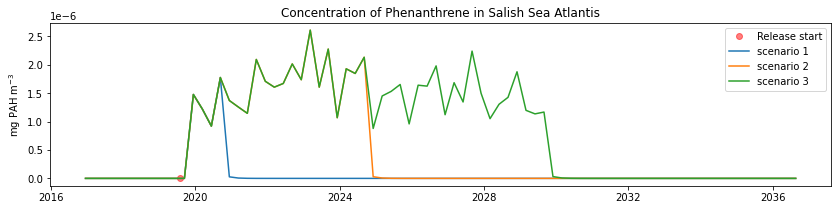

In [8]:
splot.compare_pah('Phenanthrene', scenarios, time, start, end, event_start)

Lower trophic levels

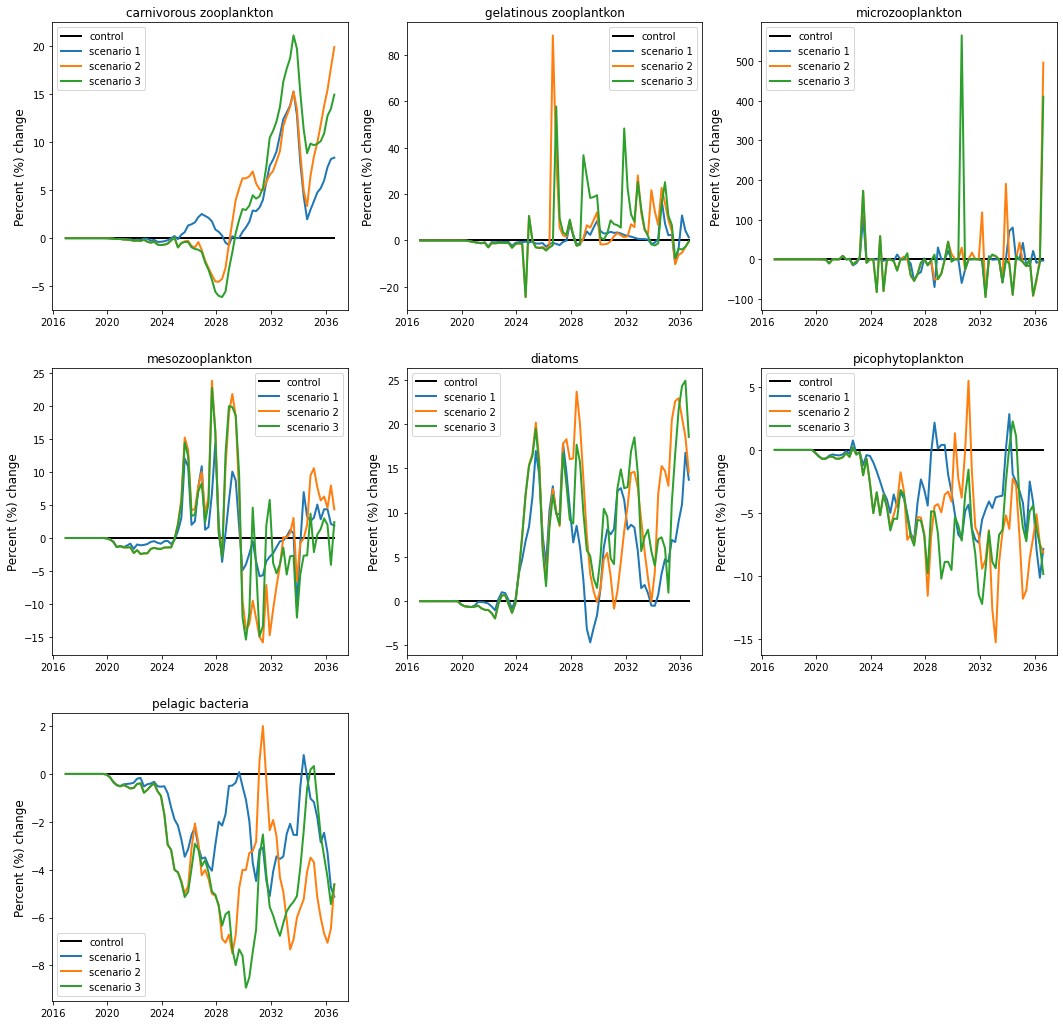

In [5]:
splot.pelagic_compare_scenarios(groups.plankton, scenarios, control, time, start, end, y_min=None, y_max=None)

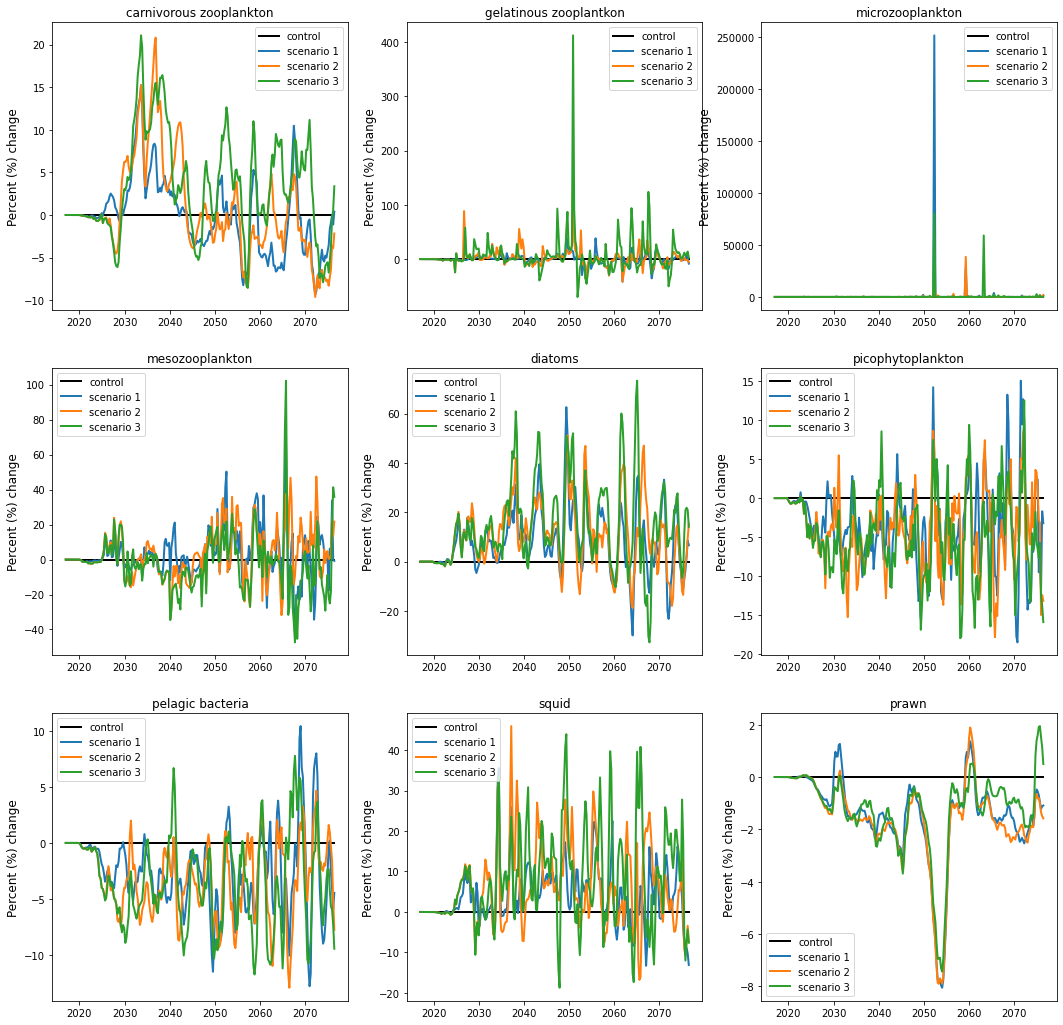

In [110]:
splot.pelagic_compare_scenarios(groups.planktonic, scenarios, control, time, start, 280, y_min=None, y_max=None)

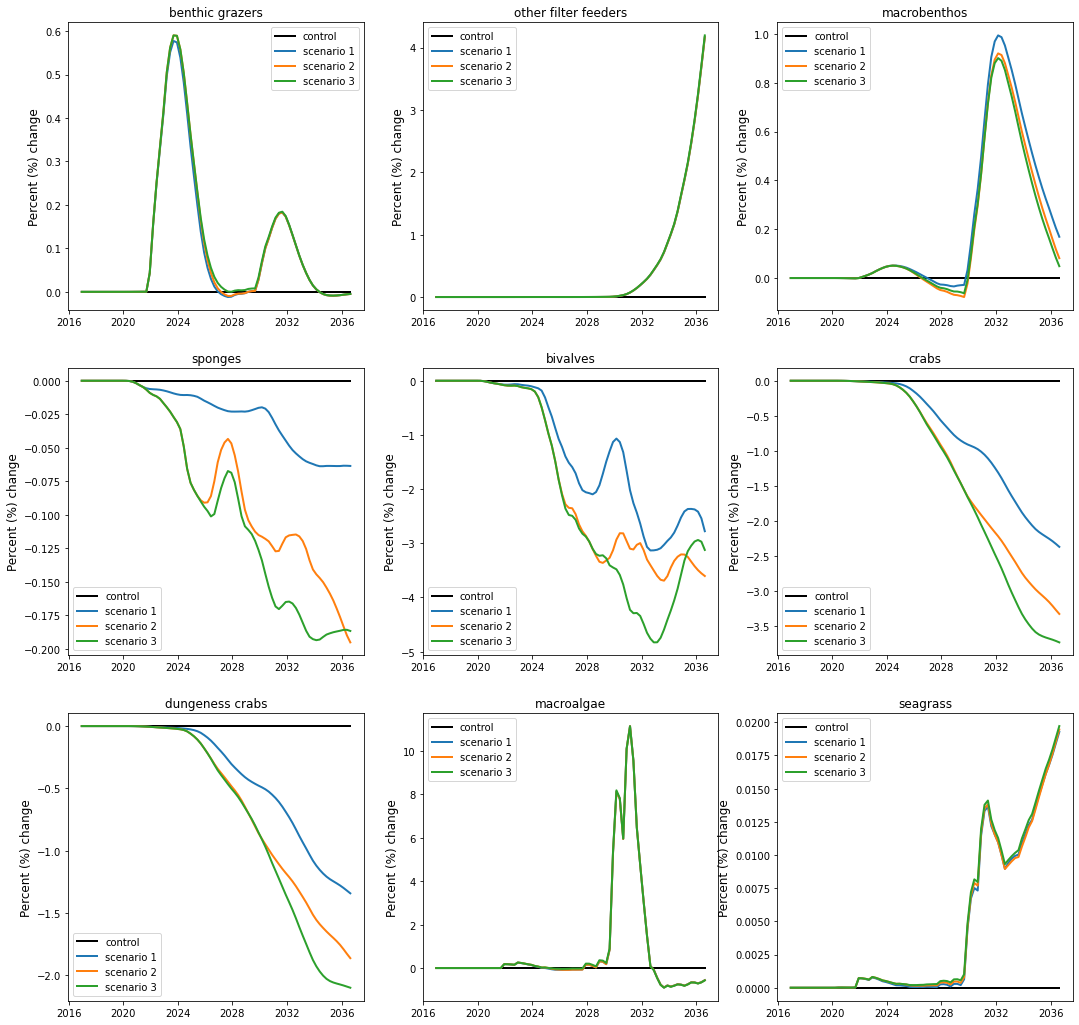

In [10]:
splot.benthic_compare_scenarios(groups.benthos, scenarios, control,time, start, end, y_min=None, y_max=None)

In [160]:
def plot_pelagic_biomass(group, scenarios, control, time, start, end, event_start, y_min=None, y_max=None):

    fig = plt.figure(figsize=(18, 14), facecolor='white') #constrained_layout=True
    gs = plt.GridSpec(3, 3, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1], height_ratios=[1, 1, 1], figure=fig) 

    for species in group:
        bio_index = (list(group).index(species))
        if bio_index < 3:
            position = 0, bio_index
        elif bio_index > 5: 
            position = 2, bio_index-6
        else :
            position = 1, bio_index-3
    
        ax = fig.add_subplot(gs[position])
        ax.tick_params(labelsize=12)
        ax.set_ylabel('mg N m$^{-3}$') 
        
        pelagic_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,:,0:6], np.nan)
        p_control = pelagic_control.sum(axis=1)
        p_control = p_control.sum(axis=1)
        
        for scenario in scenarios:
            pelagic_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][start:end,:,0:6], np.nan) # tonnes
            p_oiled = pelagic_oiled.sum(axis=1)
            p_oiled = p_oiled.sum(axis=1)
            p_max = p_oiled.max()
            p_min = p_oiled.min()
            ax.plot(time[start:end], p_oiled, label='scenario', linewidth = 2)
        
        ax.set_title(str(group[species]), fontsize = 12)
        ax.plot(time[start:end], p_control, '-.k', label='control',linewidth = 2) 
        ax.plot([event_start,event_start],[p_min, p_max], 'r', label='event start', alpha=0.5)   
        ax.set_ylim([y_min, y_max])
    fig.legend(['1yr discharge','5y discharge', '10yr discharge','control: no discharge','event start'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12);  # to place the legend outside


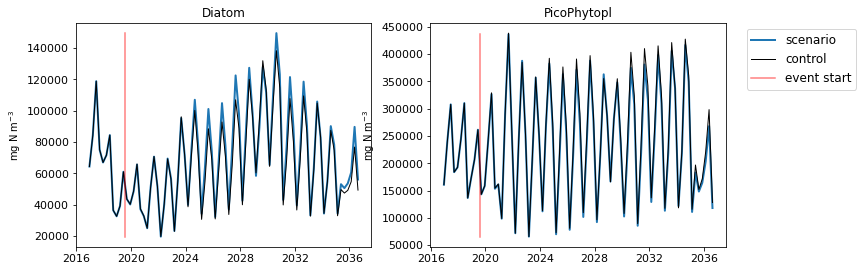

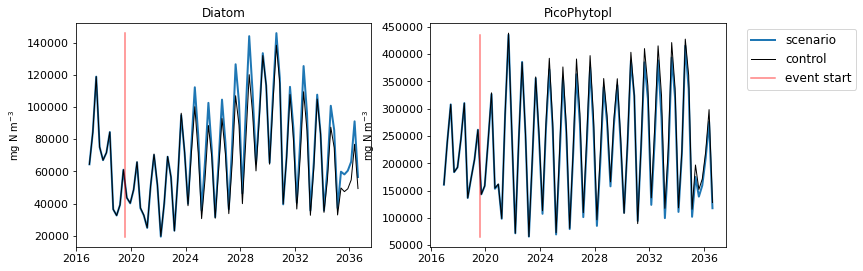

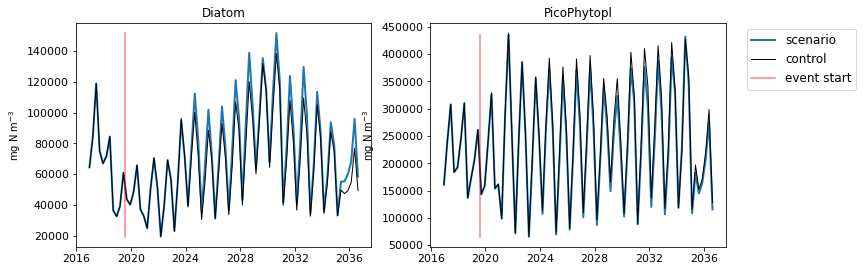

In [80]:
for scenario in scenarios:
    splot.plot_pelagic_biomass(groups.phytoplankton, scenario, control, time, start, end, event_start)

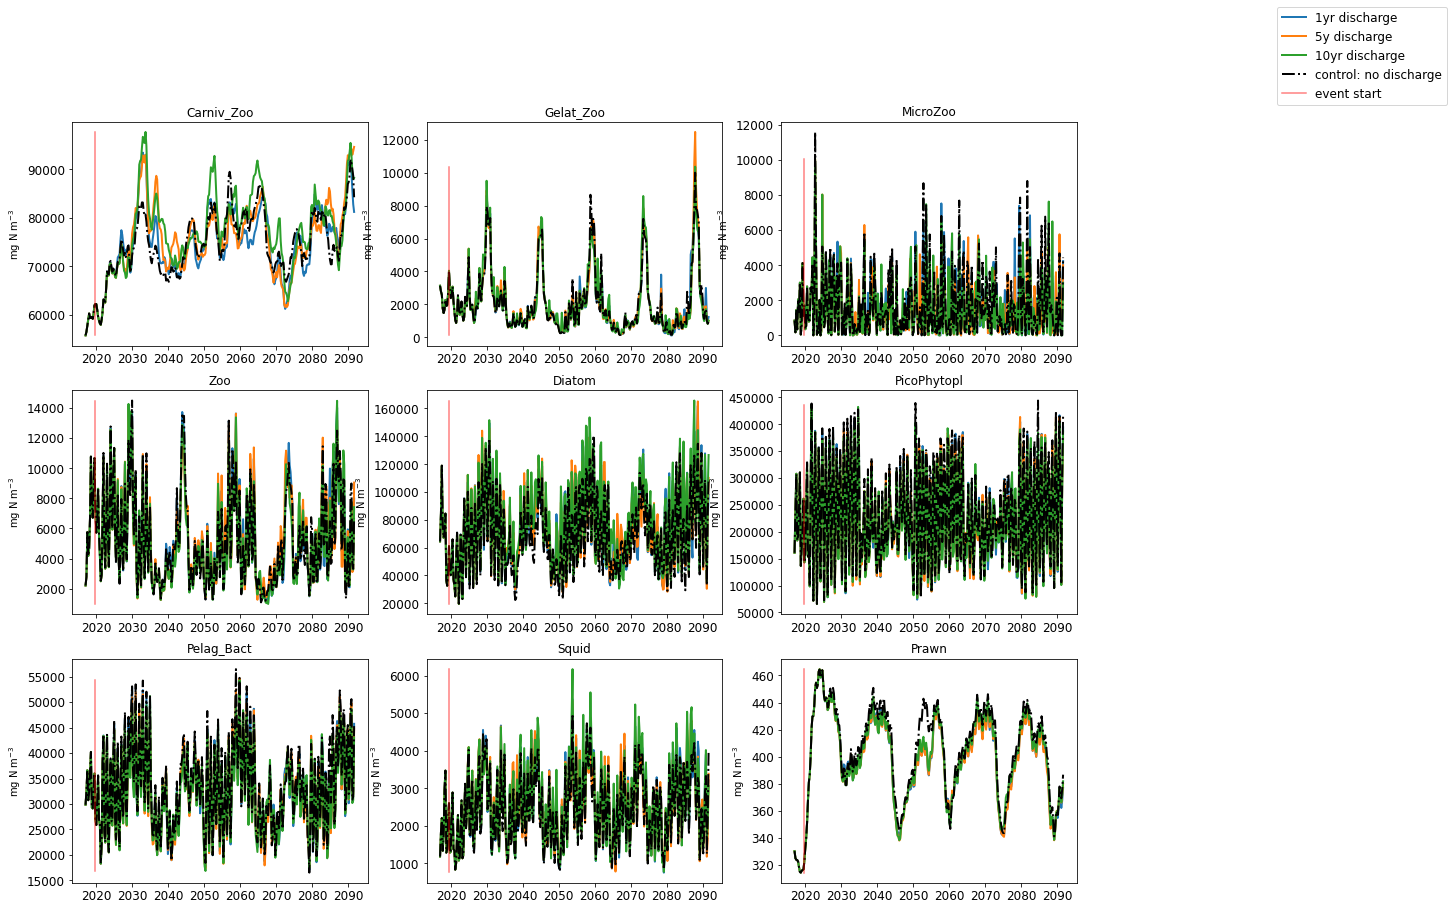

In [86]:

plot_pelagic_biomass(groups.planktonic, scenarios, control, time, 0, time.index-1, event_start)

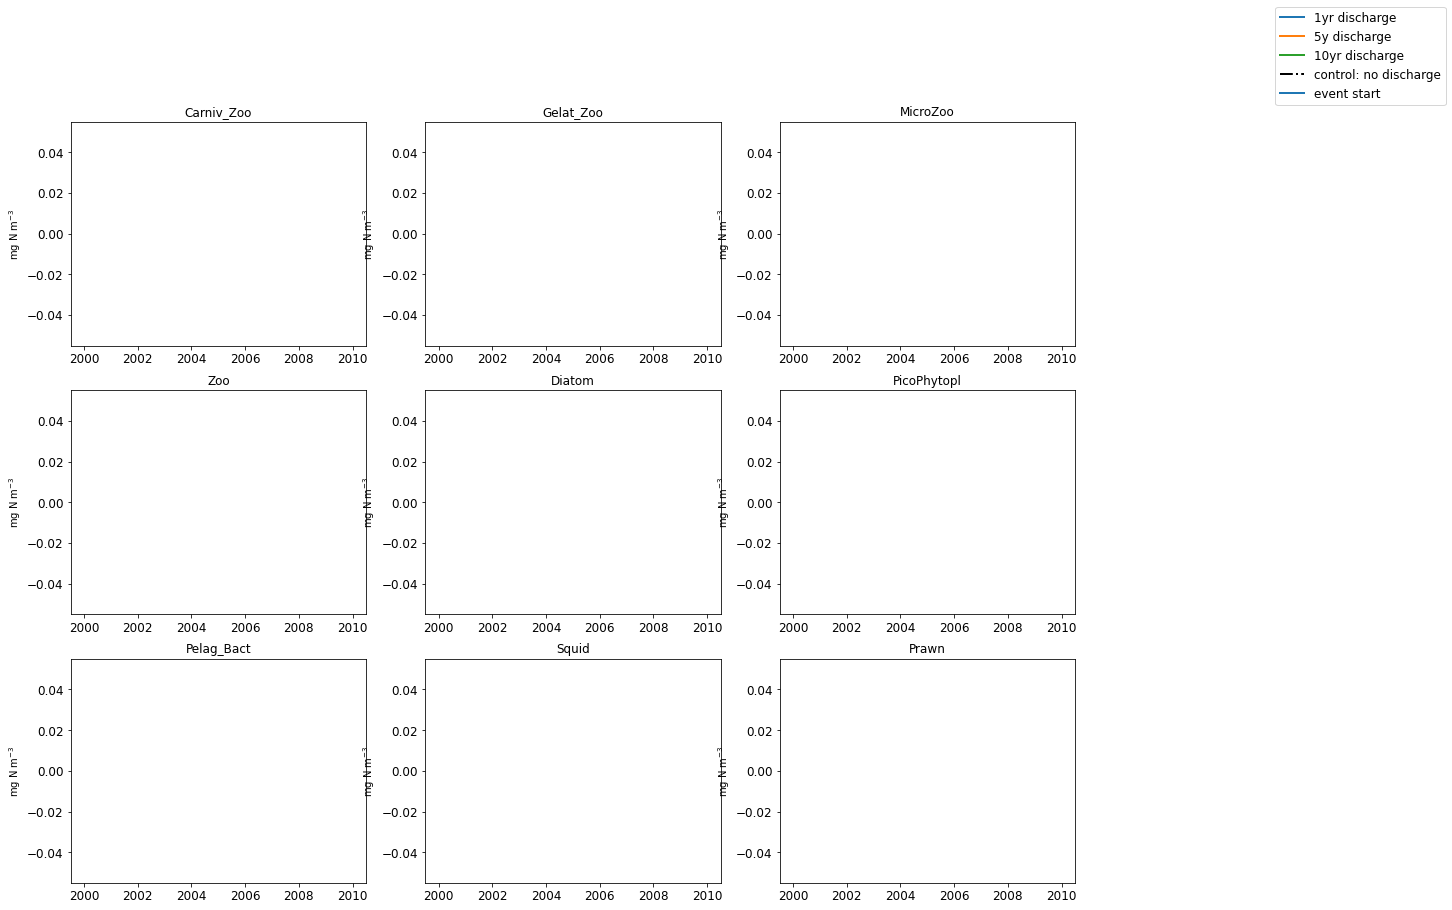

In [164]:
plot_pelagic_biomass(groups.planktonic, annual_scenarios, annual_control, time, start, end, event_start)

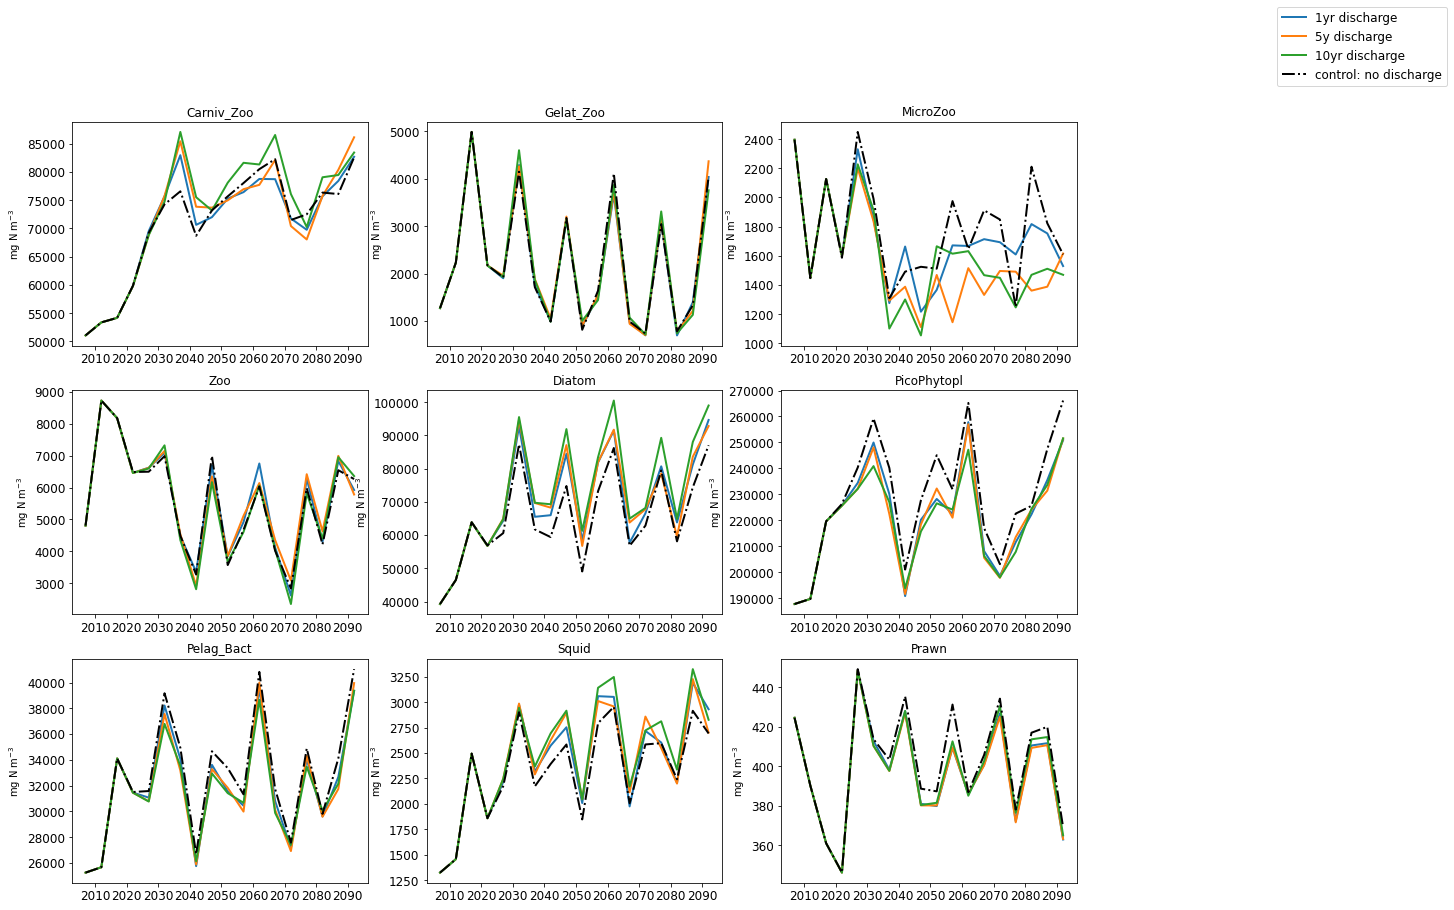

In [166]:
group = groups.planktonic
fig = plt.figure(figsize=(18, 14), facecolor='white') #constrained_layout=True
gs = plt.GridSpec(3, 3, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1], height_ratios=[1, 1, 1], figure=fig) 

for species in group:
    bio_index = (list(group).index(species))
    if bio_index < 3:
        position = 0, bio_index
    elif bio_index > 5: 
        position = 2, bio_index-6
    else :
        position = 1, bio_index-3

    ax = fig.add_subplot(gs[position])
    ax.tick_params(labelsize=12)
    ax.set_ylabel('mg N m$^{-3}$') 
    
    pelagic_control = np.ma.filled(annual_control.variables[group[species] + '_N'][:,:,0:6], np.nan)
    p_control = pelagic_control.sum(axis=1)
    p_control = p_control.sum(axis=1)
    
    for scenario in annual_scenarios:
        pelagic_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][:,:,0:6], np.nan) # tonnes
        p_oiled = pelagic_oiled.sum(axis=1)
        p_oiled = p_oiled.sum(axis=1)
        ax.plot(time, p_oiled, label='scenario', linewidth = 2)
    
    ax.set_title(str(group[species]), fontsize = 12)
    ax.plot(time, p_control, '-.k', label='control',linewidth = 2)  
fig.legend(['1yr discharge','5y discharge', '10yr discharge','control: no discharge'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12);  # to place the legend outside


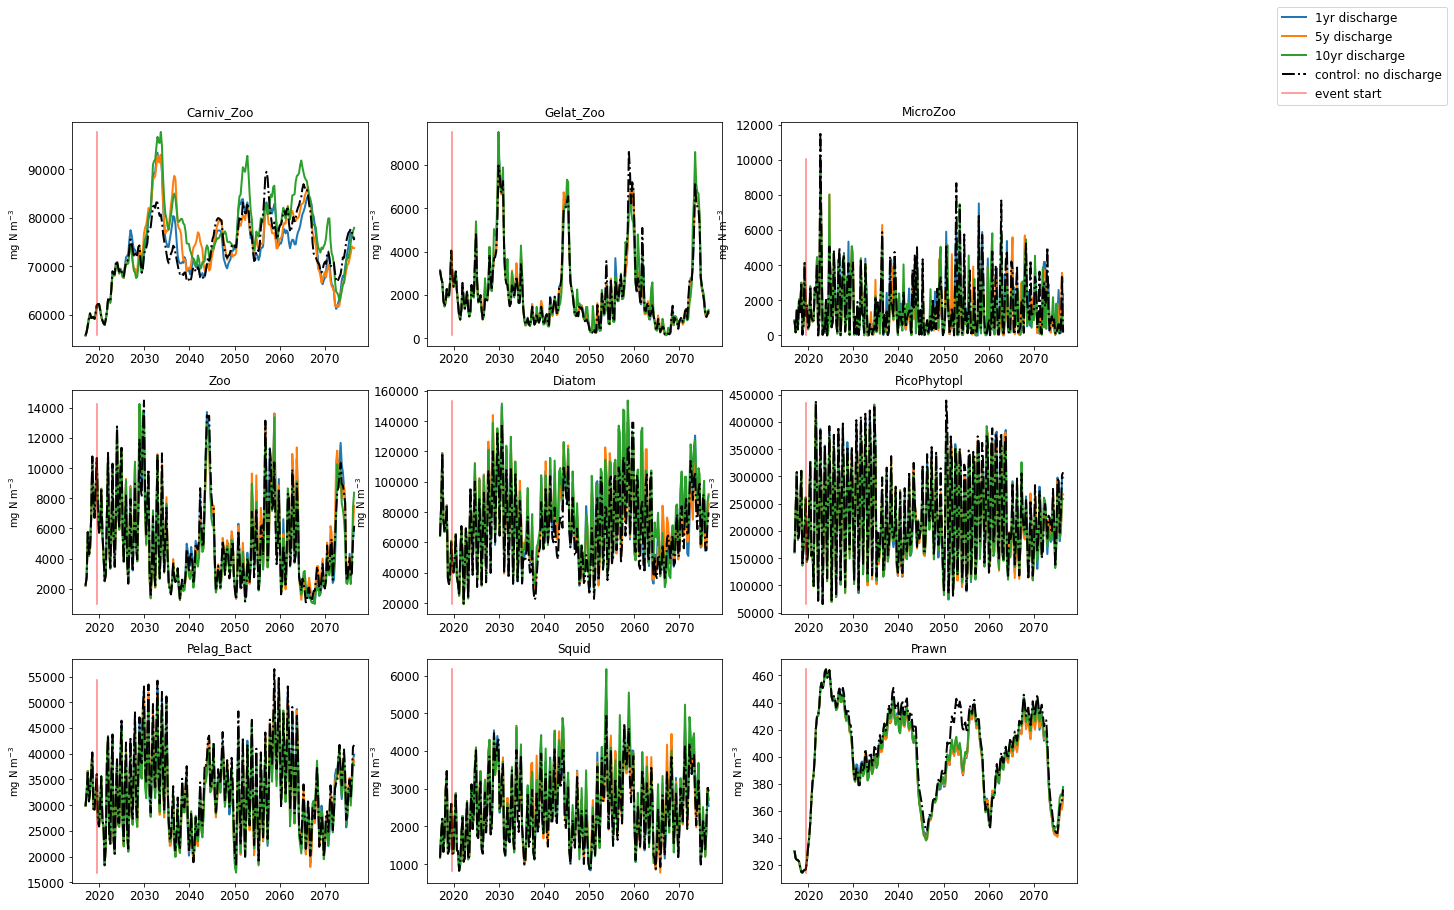

In [111]:

plot_pelagic_biomass(groups.planktonic, scenarios, control, time, start, 280, event_start)

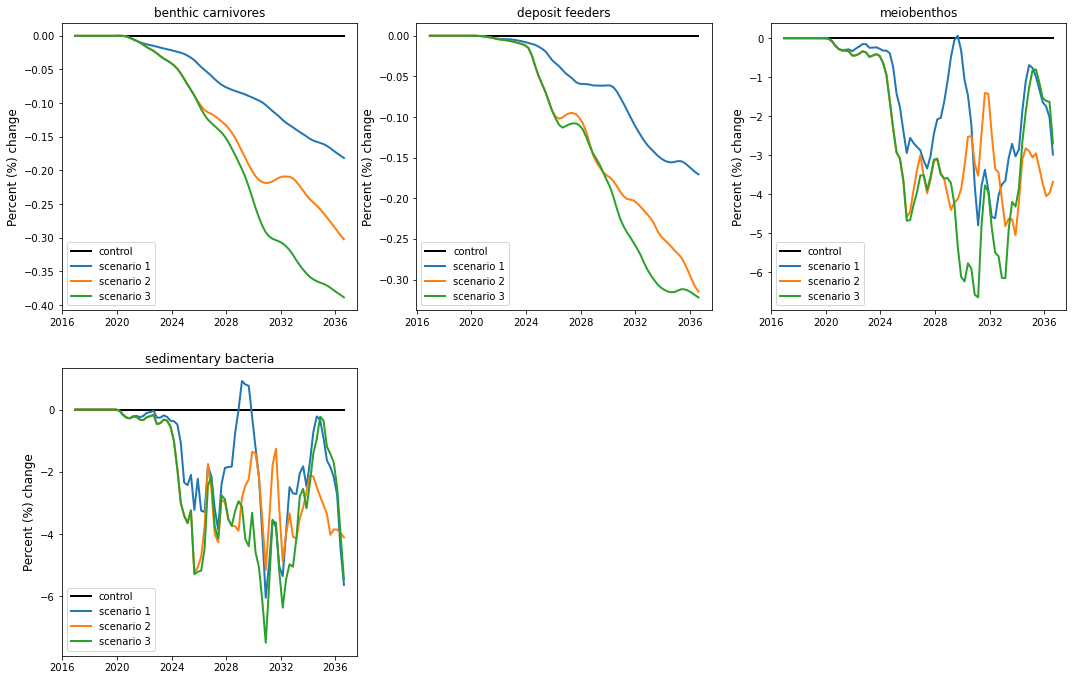

In [13]:
splot.sediment_compare_scenarios(groups.sediment_feeders, scenarios, control, time, start, end)


Years 2019-2029

In [14]:
end2029 =  91 #t.size-1 # numpy.datetime64('2029-08-29T14:00:00.000000000')

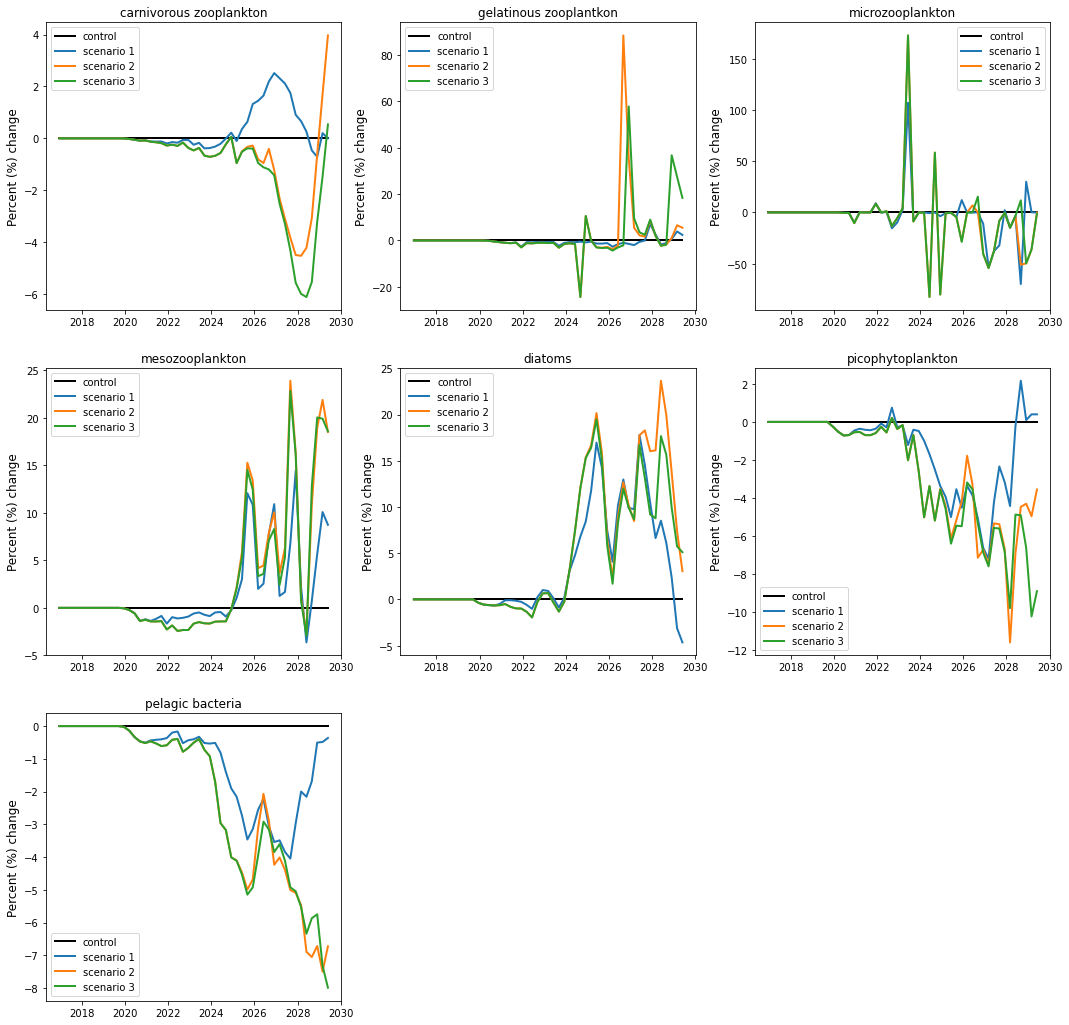

In [15]:
splot.pelagic_compare_scenarios(groups.plankton, scenarios, control, time, start, end2029, y_min=None, y_max=None)

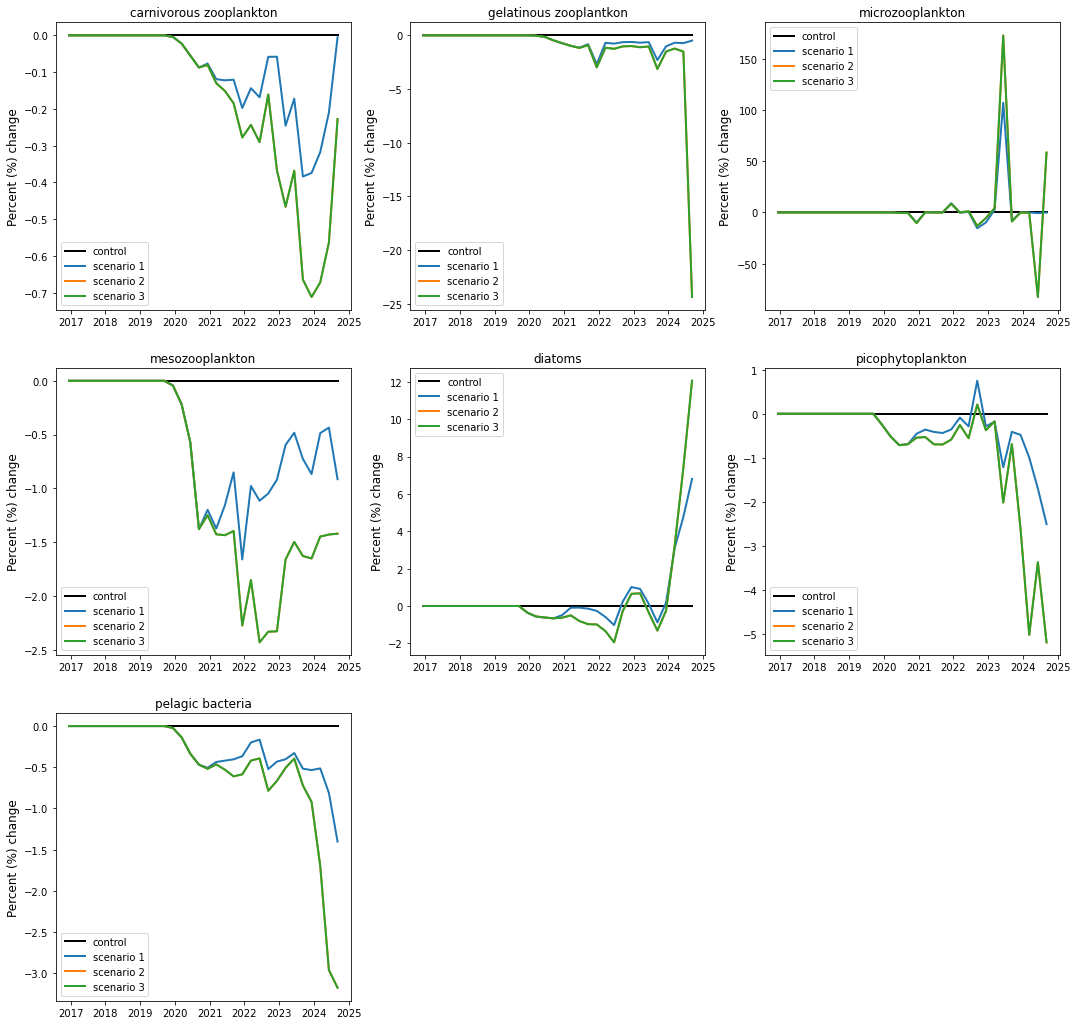

In [16]:
end2024 =  72 #t.size-1
splot.pelagic_compare_scenarios(groups.plankton, scenarios, control, time, start, end2024)

In [17]:
print(time[55], time[75], time[95], time[220] )

2020-09-09T14:00:00.000000000 2025-09-03T14:00:00.000000000 2030-08-28T14:00:00.000000000 2061-10-19T14:00:00.000000000


all times within each year

In [24]:
initial_year = [51,52,53,54,55]
fifth_year = [71,72,73,74,75]
tenth_year = [91,92,93,94,95]
fiftieth_year = [252,253,254,255,256]

In [169]:
days = [initial_year, fifth_year, tenth_year, fiftieth_year]
data = {'initial time of discharge': [], '5 years later': [],'10 years later': [], '50 years later': []}

In [66]:
def boxplot_pelagic(group, scenarios, control, days, data_labels, x_lim=None, bio_colours=['#063764','#0b5394','#3d85c6','#6fa8dc','#9fc5e8']): #bacteria, plankton
    
    for scenario in scenarios:
        df = pd.DataFrame(data_labels)
        spp = []
        
        for species in group:
            results = list()
            for day in days:
                p_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][day,:,0:6], np.nan) # tonnes, take only water column layers
                p_control = np.ma.filled(control.variables[group[species] + '_N'][day,:,0:6], np.nan)
                p_oiled = p_oiled.sum(axis=0)
                p_oiled = p_oiled.sum(axis=0)
                p_oiled = p_oiled.sum(axis=0)
                p_control = p_control.sum(axis=0)
                p_control = p_control.sum(axis=0)
                p_control = p_control.sum(axis=0)
                ratio = (p_oiled/p_control-1)*100
                results.append(ratio)
            spp.append(group[species])
            df.loc[len(df.index)] = results
        df['bio_group'] = spp
        df1 = df.set_index('bio_group')

        df1.plot(kind="barh", subplots=True, layout=(1,len(days)), figsize=(15,4), sharey=True, sharex=True, color=bio_colours, legend=False, #ax=ax,
            xlabel='Pelagic Groups', ylabel=None, title='Percent (%) Change Relative to Control for Select Pelagic Groups', xlim=x_lim); 


Annual comparisons

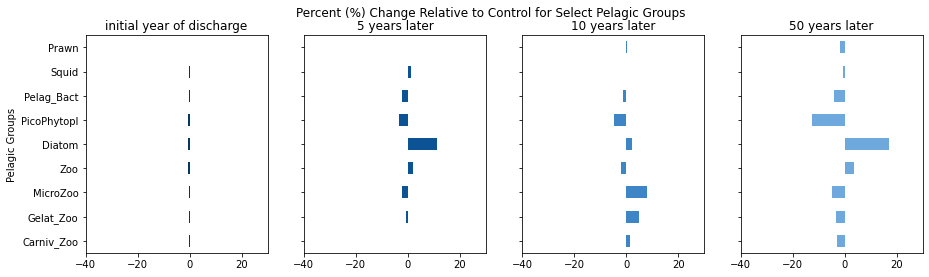

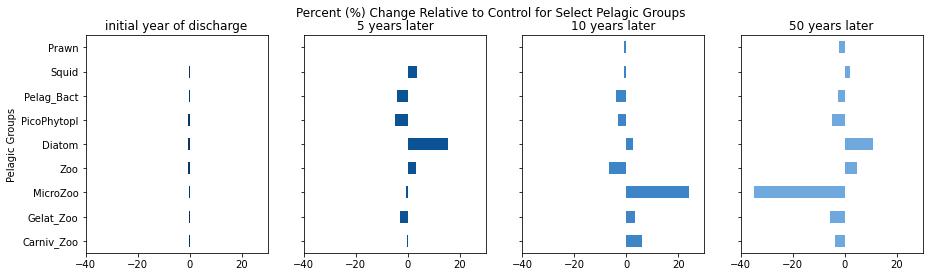

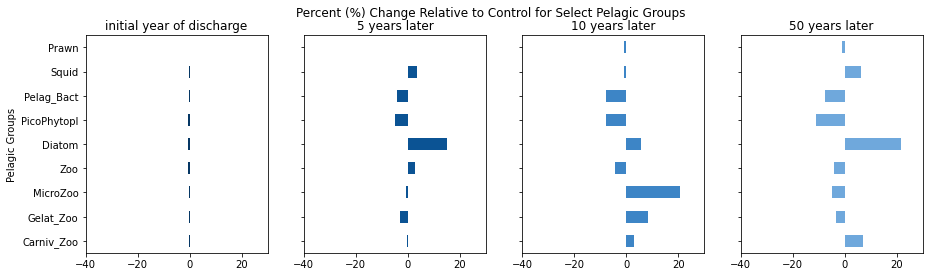

In [72]:
boxplot_pelagic(groups.planktonic, scenarios, control, days, data, x_lim=[-40,30])

Cumulative from the start

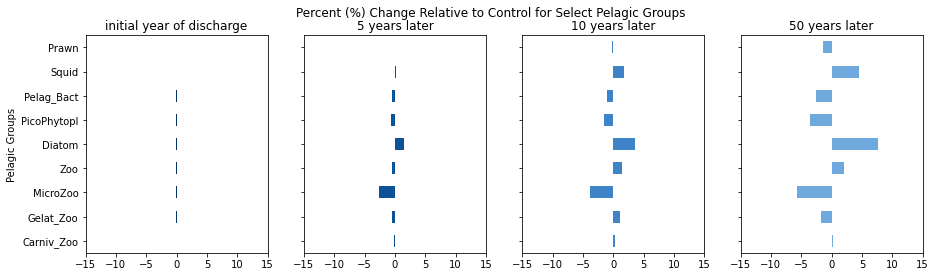

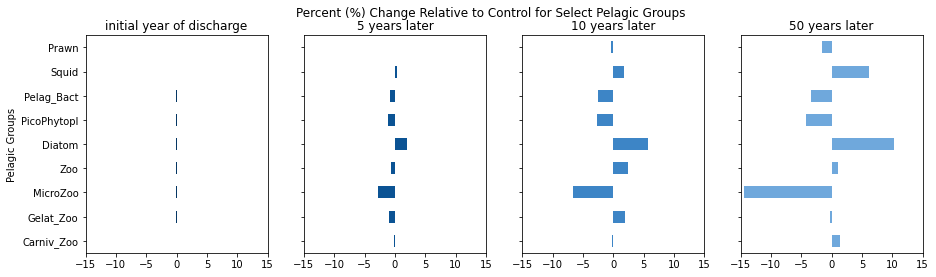

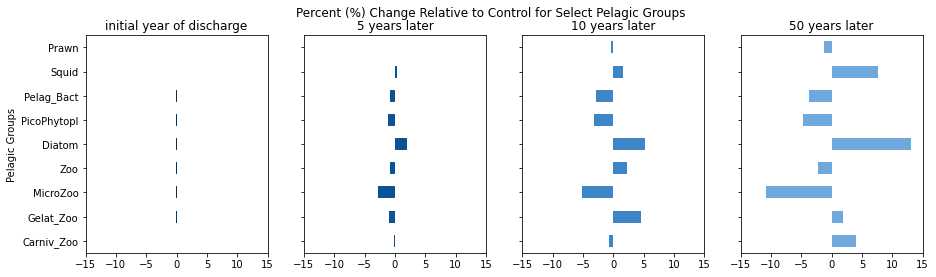

In [112]:
for scenario in scenarios:
    splot.boxplot_pelagic(groups.planktonic,scenario,control,start,final_days,data, x_lim=[-15,15]) # cumulative from the start

## five-year averaged data

In [6]:
initial_year = [51,52,53,54,55]
fifth_year = [71,72,73,74,75]
tenth_year = [91,92,93,94,95]
fiftieth_year = [252,253,254,255,256]

days = [initial_year, fifth_year, tenth_year, fiftieth_year]
data = {'initial time of discharge': [], '5 years later': [],'10 years later': [], '50 years later': []}

In [174]:
def avg_pelagic_boxplot_5(group):
    bio_colours=['#063764','#0b5394','#3d85c6','#6fa8dc','#9fc5e8']
    cum_years = [3,4,5,13]
    for scenario in annual_scenarios:
        df = pd.DataFrame(data)
        spp = []
        
        for species in group:
            results = list()
            for year in cum_years:
                p_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][year,:,0:6], np.nan) # tonnes, take only water column layers
                p_control = np.ma.filled(annual_control.variables[group[species] + '_N'][year,:,0:6], np.nan)
                p_oiled = p_oiled.sum(axis=0)
                p_oiled = p_oiled.sum(axis=0)
                p_control = p_control.sum(axis=0)
                p_control = p_control.sum(axis=0)
                ratio = (p_oiled/p_control-1)*100
                results.append(ratio)
            spp.append(group[species])
            df.loc[len(df.index)] = results
        df['bio_group'] = spp
        df1 = df.set_index('bio_group')

        df1.plot(kind="barh", subplots=True, layout=(1,len(days)), figsize=(15,4), sharey=True, sharex=True, color=bio_colours, legend=False, #ax=ax,
            xlabel='Pelagic Groups', ylabel=None, xlim=[-25,15]); 

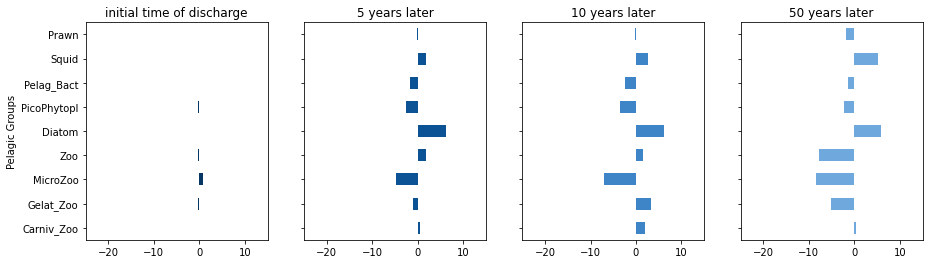

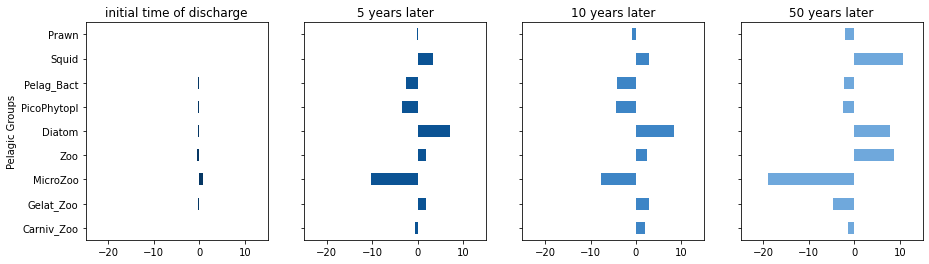

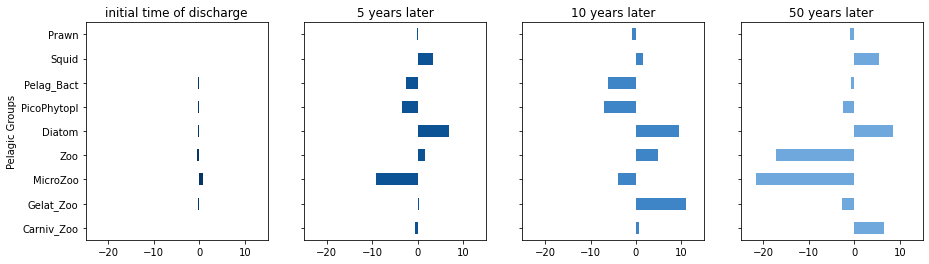

In [175]:
avg_pelagic_boxplot_5(groups.planktonic)

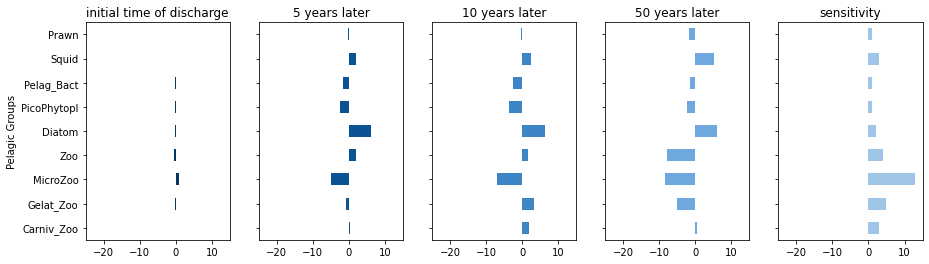

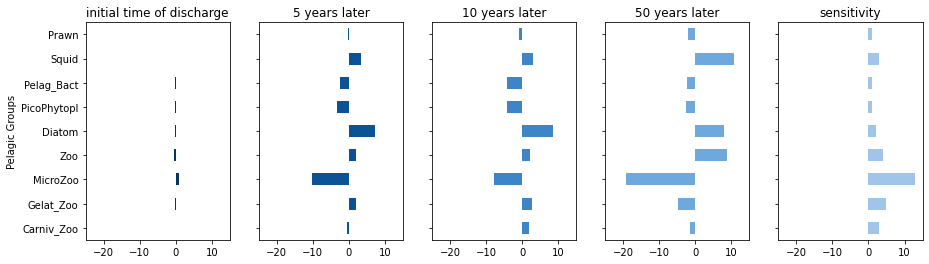

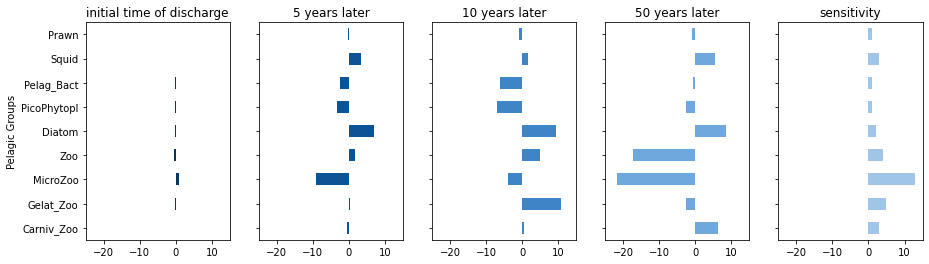

In [19]:
# To add model sensitivity range to plots
group = groups.planktonic
sensitivity = {
    'carnivorous zooplankton':3, 'gelatinous zooplantkon':5, 'microzooplankton':13,
    'mesozooplankton':4, 'diatoms':2, 'picophytoplankton':1, 'pelagic bacteria':1,
    'squid':3, 'prawn': 1, }
bio_colours=['#063764','#0b5394','#3d85c6','#6fa8dc','#9fc5e8']
cum_years = [3,4,5,13]
for scenario in annual_scenarios:
    df = pd.DataFrame(data)
    spp = []
    sensitivity_results = []
    
    for species in group:
        results = list()
        for year in cum_years:
            p_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][year,:,0:6], np.nan) # tonnes, take only water column layers
            p_control = np.ma.filled(annual_control.variables[group[species] + '_N'][year,:,0:6], np.nan)
            p_oiled = p_oiled.sum(axis=0)
            p_oiled = p_oiled.sum(axis=0)
            p_control = p_control.sum(axis=0)
            p_control = p_control.sum(axis=0)
            ratio = (p_oiled/p_control-1)*100
            results.append(ratio)
        spp.append(group[species])
        sensitivity_results.append(sensitivity[species])
        df.loc[len(df.index)] = results
    df['bio_group'] = spp
    df['sensitivity'] = sensitivity_results
    df1 = df.set_index('bio_group')

    df1.plot(kind="barh", subplots=True, layout=(1,len(days)+1), figsize=(15,4), sharey=True, sharex=True, color=bio_colours, legend=False, #ax=ax,
        xlabel='Pelagic Groups', ylabel=None, xlim=[-25,15]); 

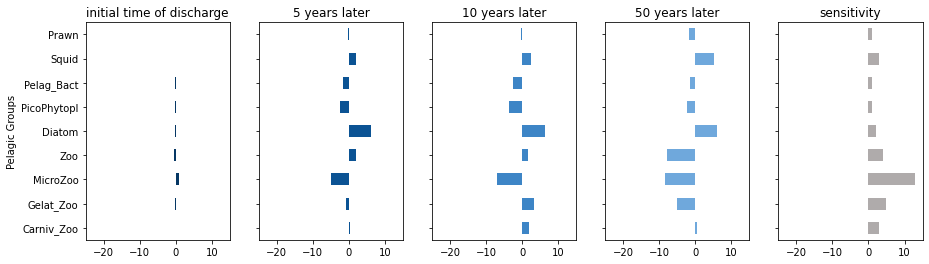

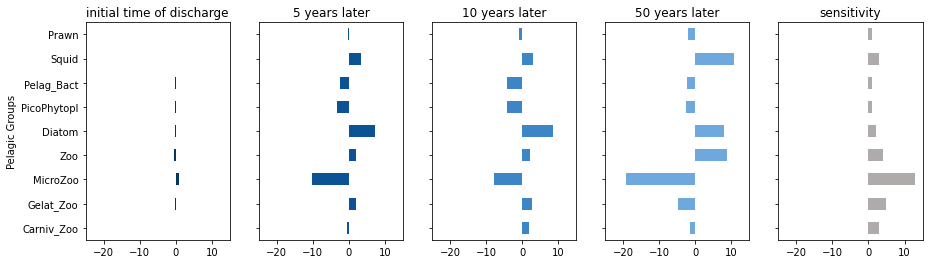

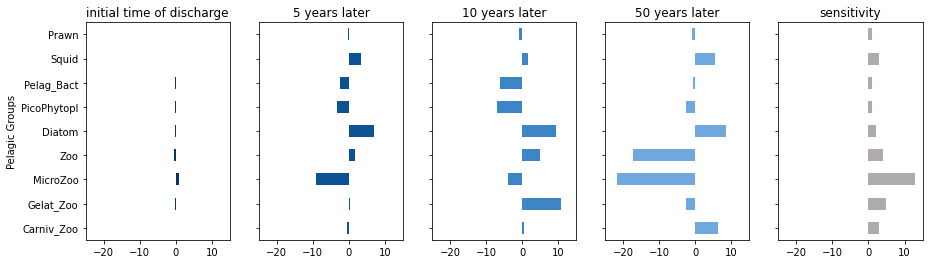

In [20]:
# To add model sensitivity range to plots
group = groups.planktonic
sensitivity = {
    'carnivorous zooplankton':3, 'gelatinous zooplantkon':5, 'microzooplankton':13,
    'mesozooplankton':4, 'diatoms':2, 'picophytoplankton':1, 'pelagic bacteria':1,
    'squid':3, 'prawn': 1, }
bio_colours=['#063764','#0b5394','#3d85c6','#6fa8dc','#AFABAB']
cum_years = [3,4,5,13]
for scenario in annual_scenarios:
    df = pd.DataFrame(data)
    spp = []
    sensitivity_results = []
    
    for species in group:
        results = list()
        for year in cum_years:
            p_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][year,:,0:6], np.nan) # tonnes, take only water column layers
            p_control = np.ma.filled(annual_control.variables[group[species] + '_N'][year,:,0:6], np.nan)
            p_oiled = p_oiled.sum(axis=0)
            p_oiled = p_oiled.sum(axis=0)
            p_control = p_control.sum(axis=0)
            p_control = p_control.sum(axis=0)
            ratio = (p_oiled/p_control-1)*100
            results.append(ratio)
        spp.append(group[species])
        sensitivity_results.append(sensitivity[species])
        df.loc[len(df.index)] = results
    df['bio_group'] = spp
    df['sensitivity'] = sensitivity_results
    df1 = df.set_index('bio_group')

    df1.plot(kind="barh", subplots=True, layout=(1,len(days)+1), figsize=(15,4), sharey=True, sharex=True, color=bio_colours, legend=False, #ax=ax,
        xlabel='Pelagic Groups', ylabel=None, xlim=[-25,15]); 

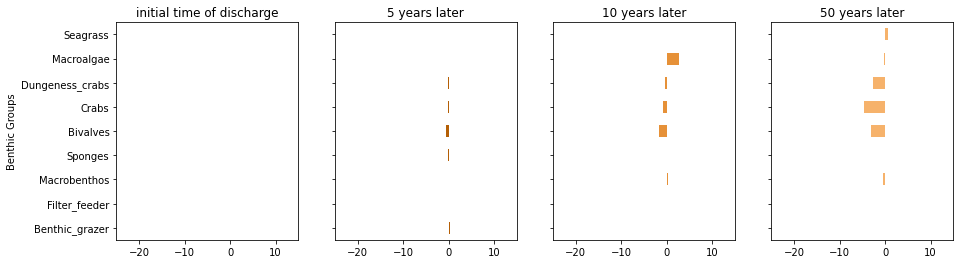

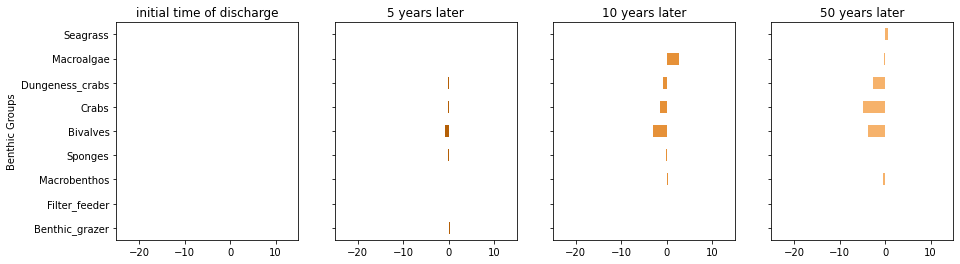

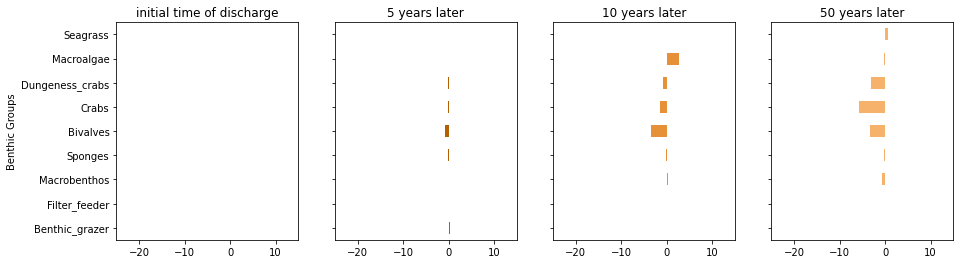

In [177]:
group = groups.benthos 
bio_colours=['#783f04','#b45f06','#e69138','#f6b26b','#f9cb9c']
cum_years = [3,4,5,13]
for scenario in annual_scenarios:
    df = pd.DataFrame(data)
    spp = []
    
    for species in group:
        results = list()
        for year in cum_years:
            p_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][year,:], np.nan) # tonnes, take only water column layers
            p_control = np.ma.filled(annual_control.variables[group[species] + '_N'][year,:], np.nan)
            p_oiled = p_oiled.sum(axis=0)
            p_control = p_control.sum(axis=0)
            ratio = (p_oiled/p_control-1)*100
            results.append(ratio)
        spp.append(group[species])
        df.loc[len(df.index)] = results
    df['bio_group'] = spp
    df1 = df.set_index('bio_group')

    df1.plot(kind="barh", subplots=True, layout=(1,len(days)), figsize=(15,4), sharey=True, sharex=True, color=bio_colours, legend=False, #ax=ax,
        xlabel='Benthic Groups', ylabel=None, xlim=[-25,15]); 

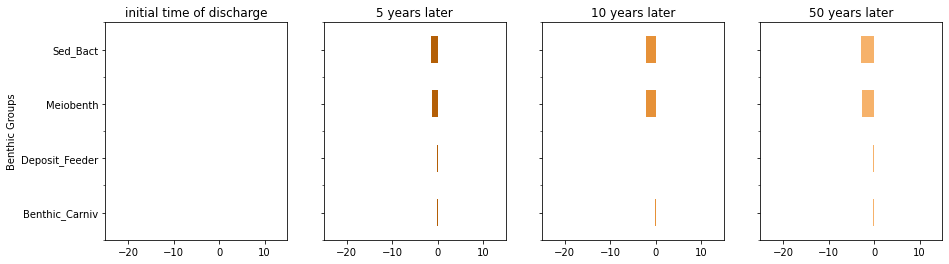

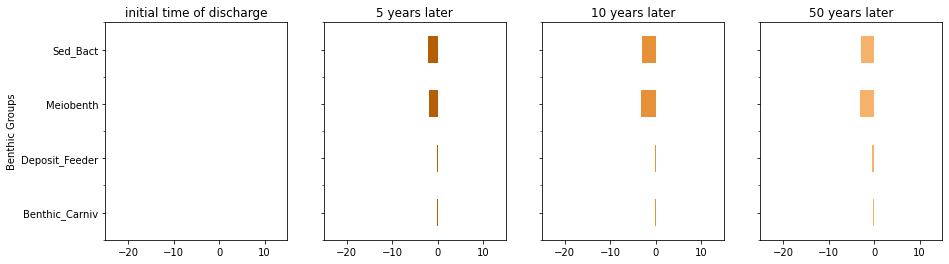

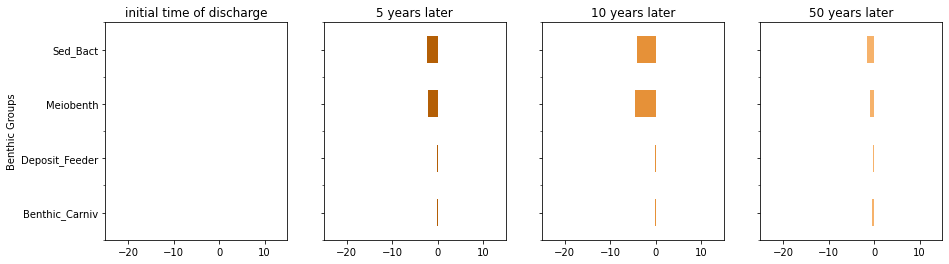

In [187]:
group = groups.sediment_feeders
bio_colours=['#783f04','#b45f06','#e69138','#f6b26b','#f9cb9c']
cum_years = [3,4,5,13]
for scenario in annual_scenarios:
    df = pd.DataFrame(data)
    spp = []
    
    for species in group:
        results = list()
        for year in cum_years:
            p_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][year,:,6], np.nan) # tonnes, take only water column layers
            p_control = np.ma.filled(annual_control.variables[group[species] + '_N'][year,:,6], np.nan)
            p_oiled = p_oiled.sum(axis=0)
            p_control = p_control.sum(axis=0)
            ratio = (p_oiled/p_control-1)*100
            results.append(ratio)
        spp.append(group[species])
        df.loc[len(df.index)] = results
    df['bio_group'] = spp
    df1 = df.set_index('bio_group')

    df1.plot(kind="barh", subplots=True, layout=(1,len(days)), figsize=(15,4), sharey=True, sharex=True, color=bio_colours, legend=False, #ax=ax,
        xlabel='Benthic Groups', ylabel=None, xlim=[-25,15]); 

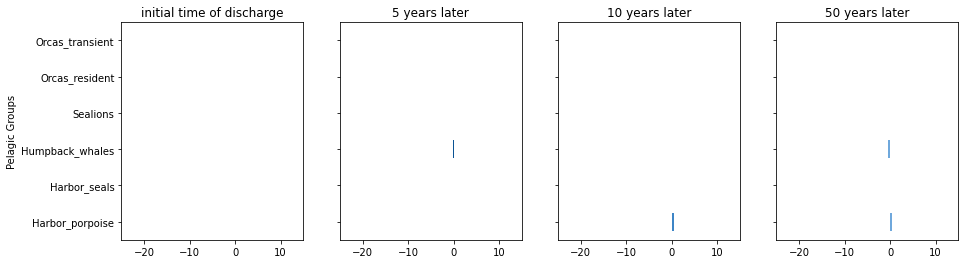

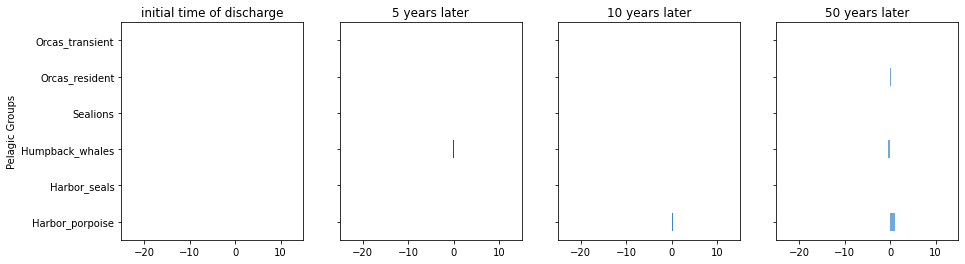

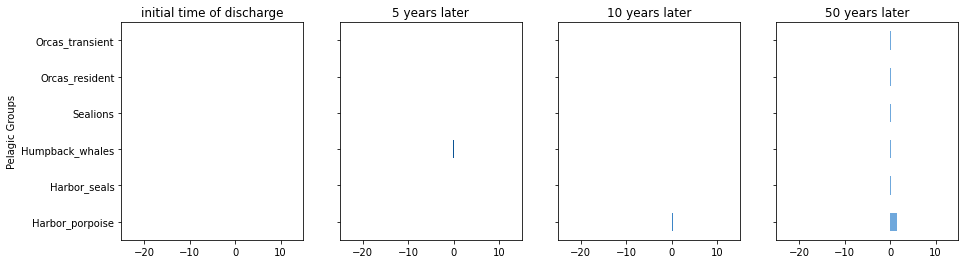

In [179]:
avg_pelagic_boxplot_5(groups.mammals)

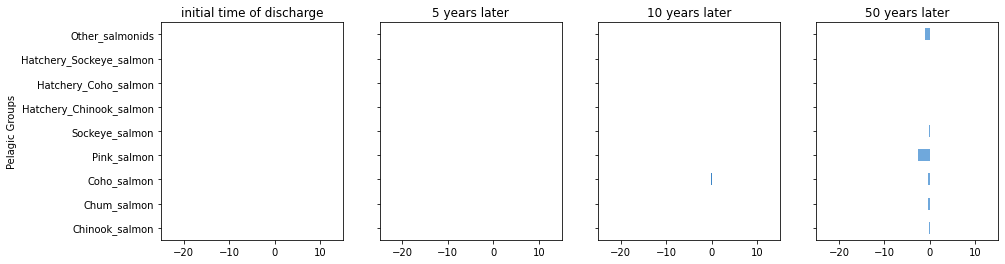

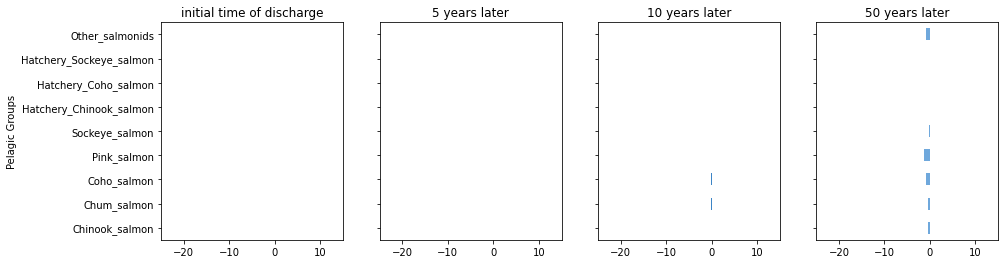

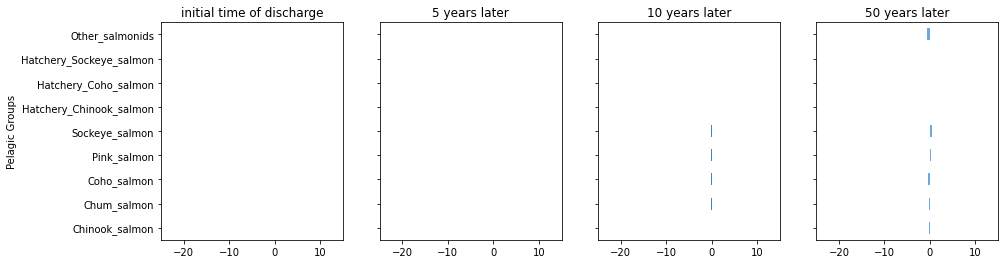

In [180]:
avg_pelagic_boxplot_5(groups.salmon)

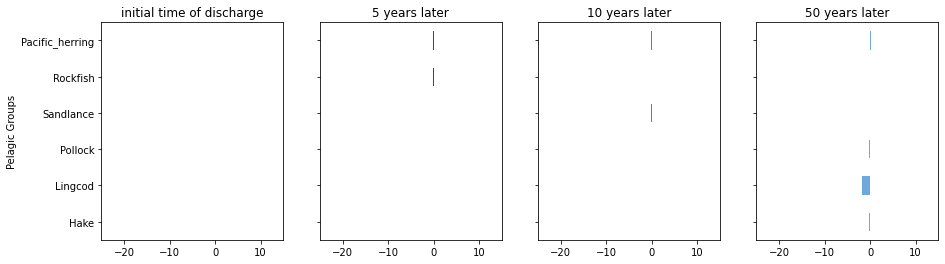

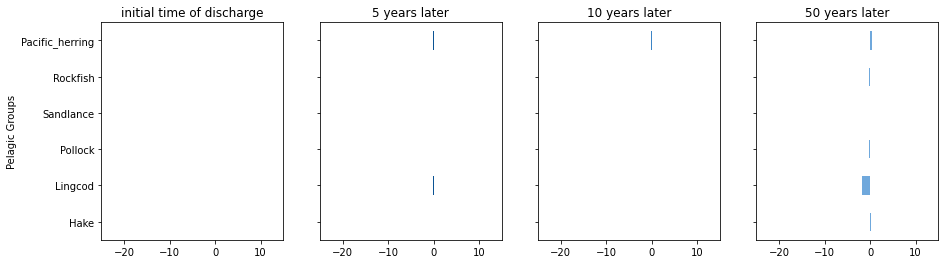

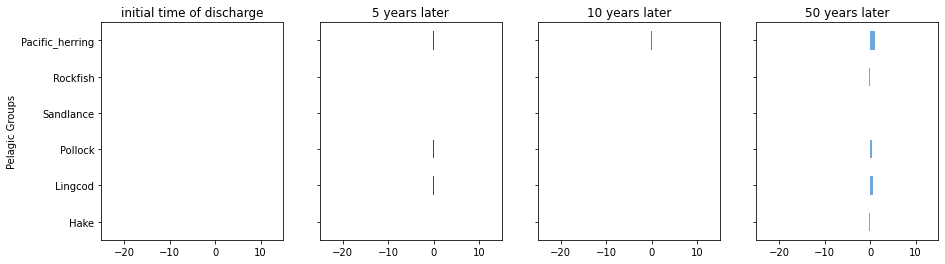

In [181]:
avg_pelagic_boxplot_5(groups.named_fish)

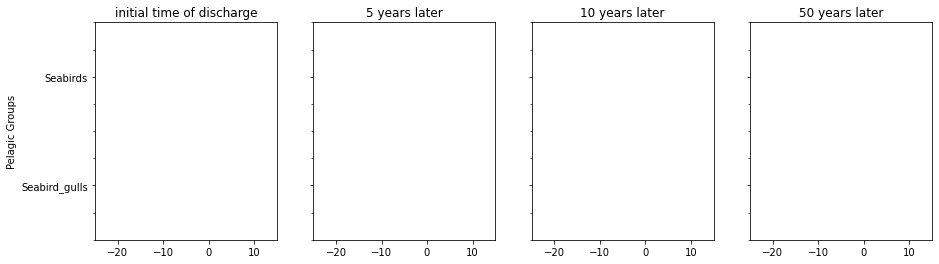

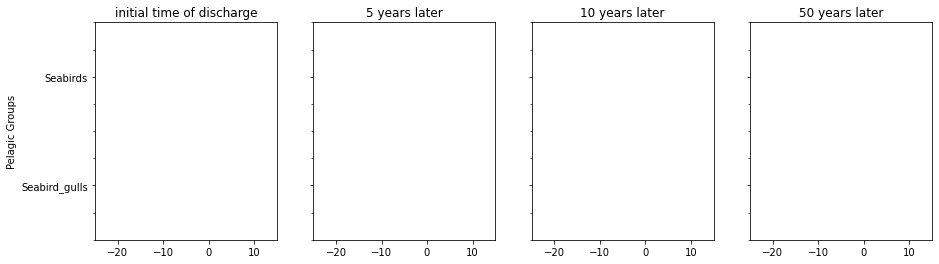

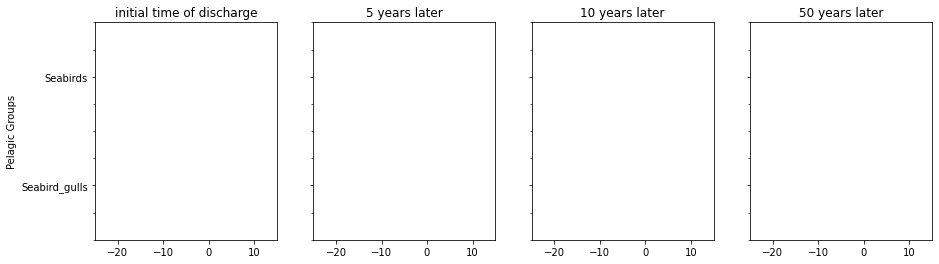

In [182]:
avg_pelagic_boxplot_5(groups.birds)

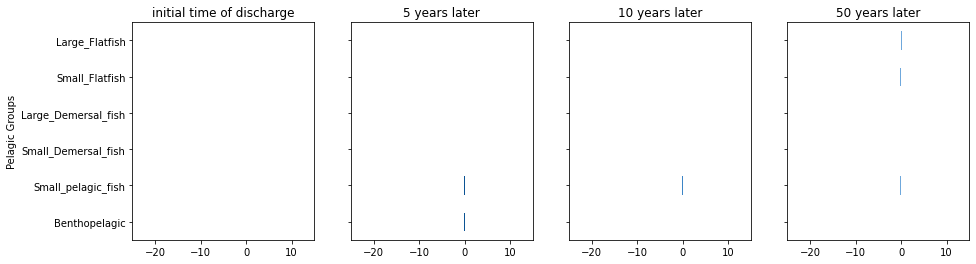

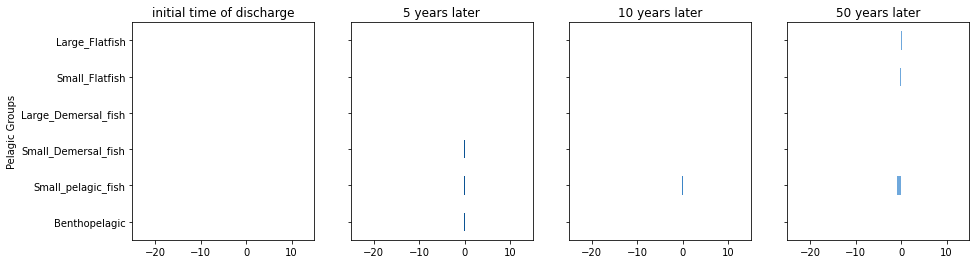

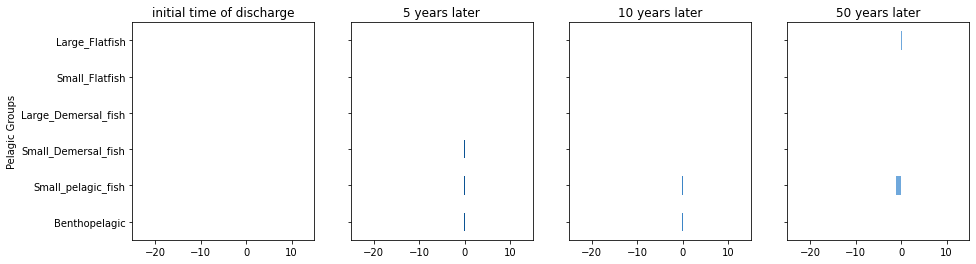

In [183]:
avg_pelagic_boxplot_5(groups.other_fish)

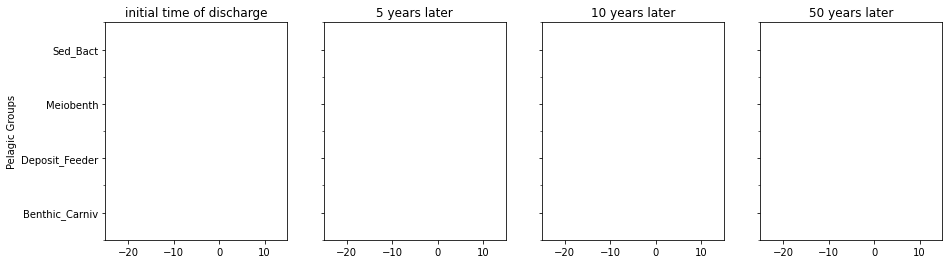

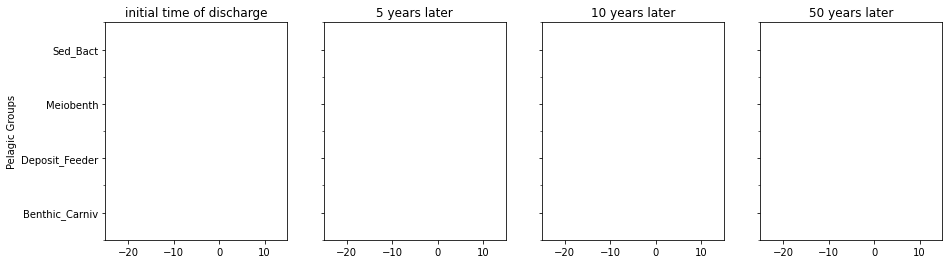

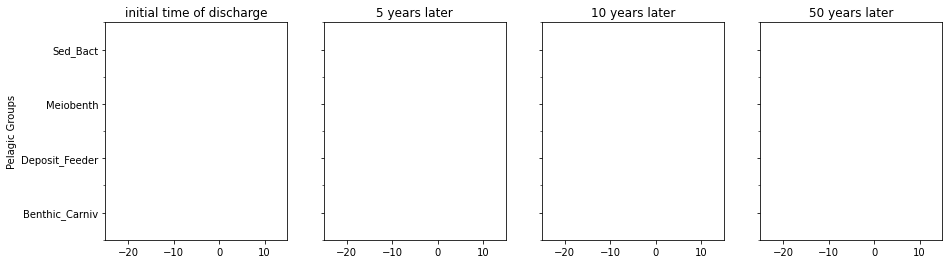

In [186]:
avg_pelagic_boxplot_5(groups.sediment_feeders)

5-year average, 1st year of discharge, exploring the planktonic species, which are the only one to respond within this timeframe

In [194]:
def average_depth_plot(group):
    for year in cum_years[0:2]:
        fig = plt.figure(figsize=(15, 15), facecolor='white', constrained_layout=True)
        gs = plt.GridSpec(3, 4, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1, 1], height_ratios=[1, 1, 1], figure=fig) 

        discharge_time = {0:'1st year of discharge', 1:'5 years later', 2:'10 years later', 3:'50 years later',}
        depth = [400, 250, 100, 50, 25, 0]

        for species in group:

            bio_index = (list(group).index(species))

            if bio_index < 4:
                position = 0, bio_index
            elif bio_index > 7: 
                position = 2, bio_index-8
            else :
                position = 1, bio_index-4

            ax = fig.add_subplot(gs[position])
            
            pelagic_control = np.ma.filled(annual_control.variables[group[species] + '_N'][year,:,0:6], np.nan)
            p_control = pelagic_control.sum(axis=0)
            ax.set_ylim(250, 0)  # decreasing depth
            
            for scenario in annual_scenarios:

                pelagic_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][year,:,0:6], np.nan) # tonnes, take only water column layers
                p_oiled = pelagic_oiled.sum(axis=0)
                ax.plot(p_oiled, depth, linewidth = 2)
            ax.plot(p_control, depth, '-.k', linewidth = 2, alpha=0.8)
            ax.set_title(species);
            ax.set_ylabel('depth (m)')
            ax.set_xlabel('5y average mg N m$^{-3}$')
        fig.legend(['1y discharge','5y discharge','10y discharge','control: no discharge'],bbox_to_anchor=(1.05, 1), loc='lower right');  # place the legend outside)
        fig.suptitle(discharge_time[cum_years.index(year)], fontsize=14)

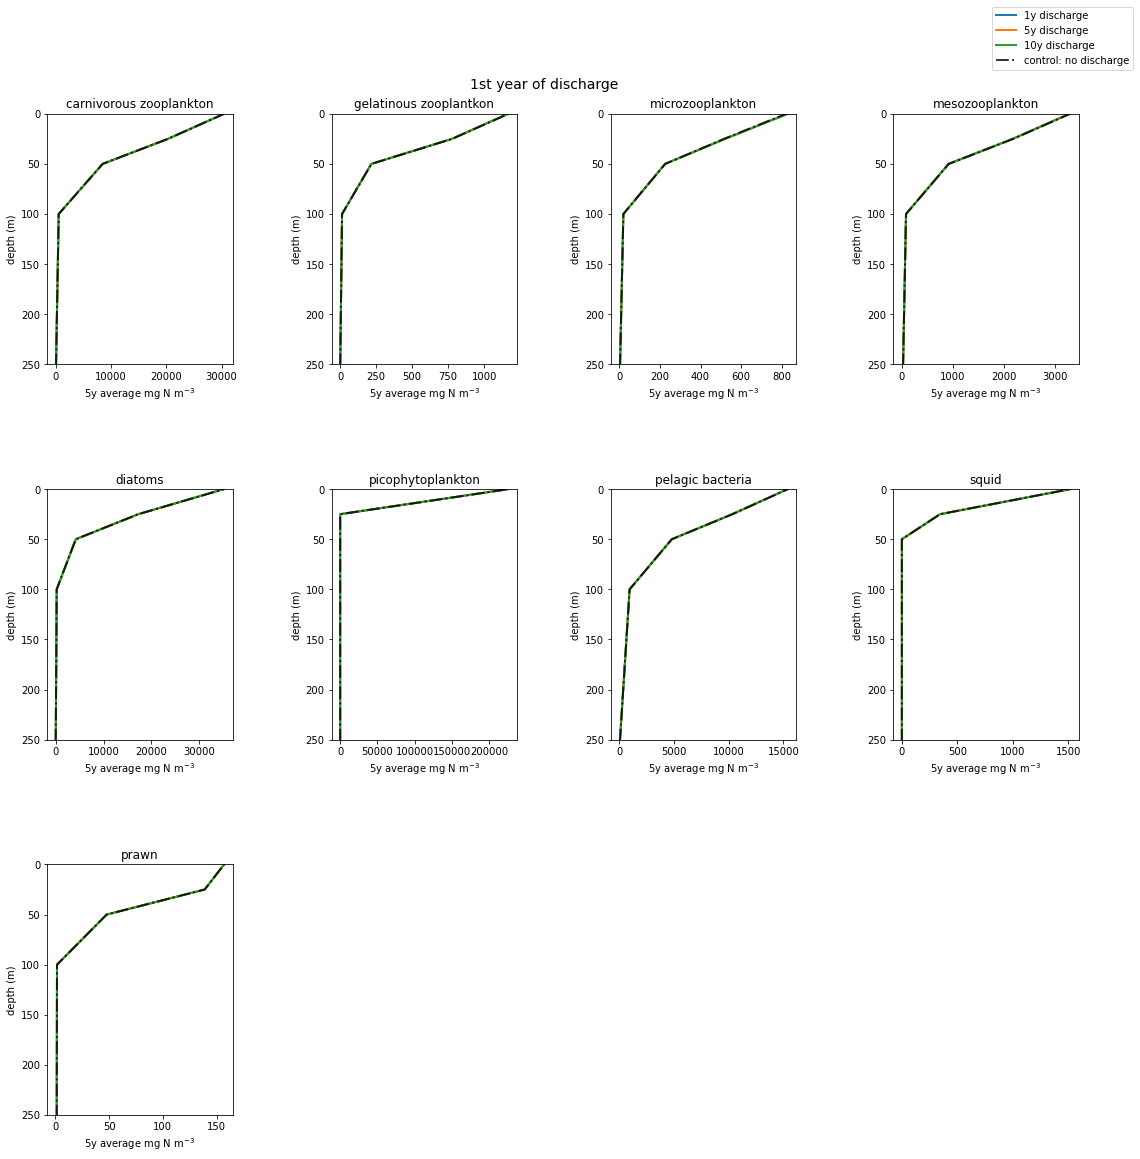

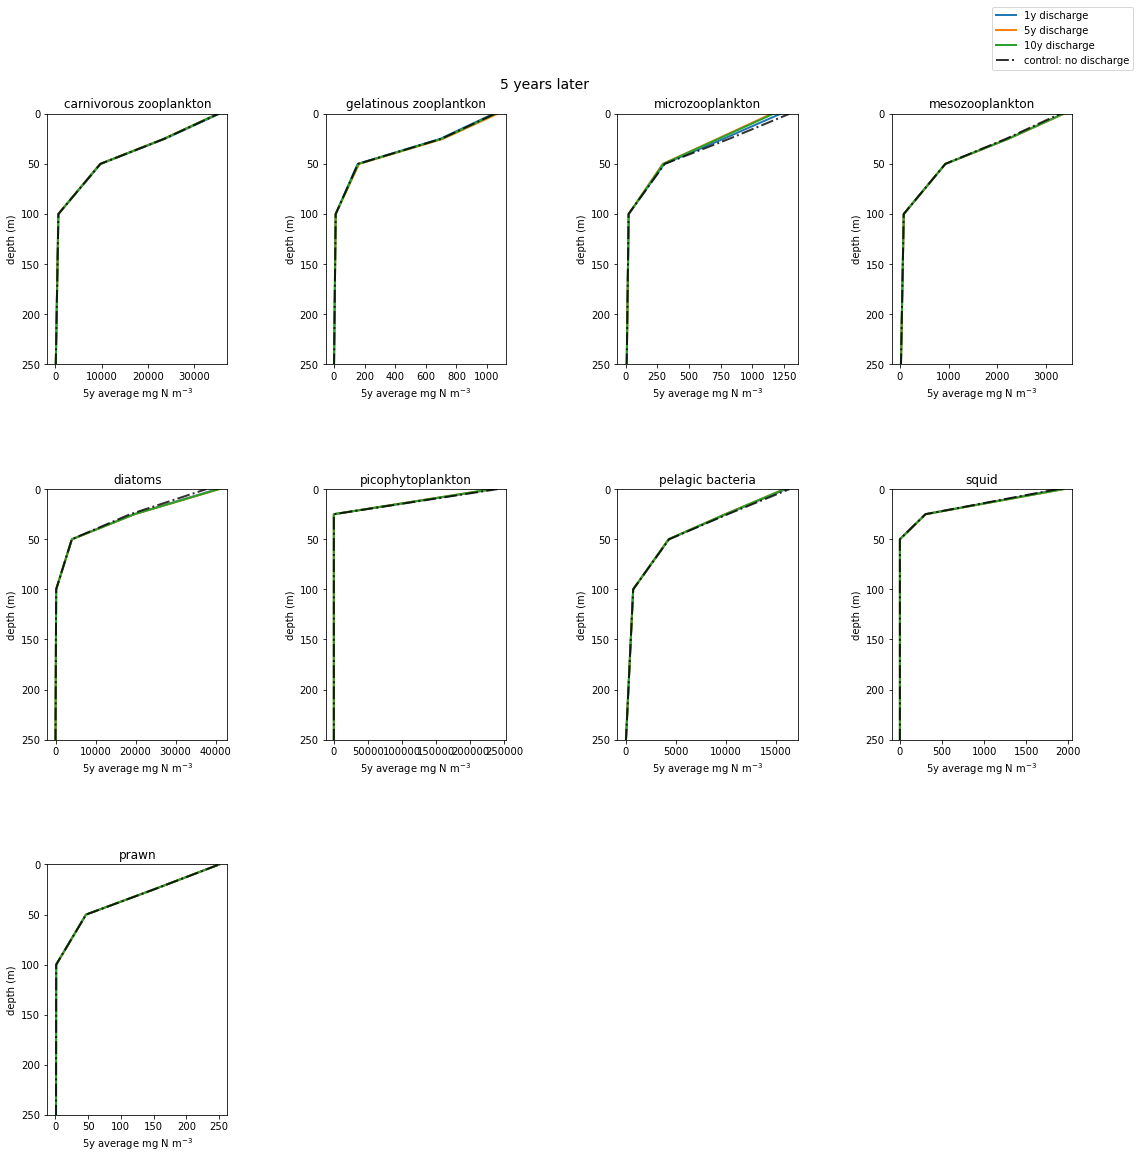

In [195]:
average_depth_plot(groups.planktonic)

### Regional difference?

In [196]:
#regions by Atlantis boxes
JdF_west = [1,2,3,4]
JdF_east = [5,6,7,8,9,10,11]
Haro_Boundary = [60,33,34,35,36]
SoG_south = [54,64,68,79]
SoG_center = [80,81,82,83,84,85]
SoG_north = [88,92.98,101,102]
PS_main = [20,21,23,26]

In [215]:
def avg_pelagic_boxplot_region(group, region, xlim=None):
    bio_colours=['#063764','#0b5394','#3d85c6','#6fa8dc','#9fc5e8']
    cum_years = [3,4,5,13]
    for scenario in annual_scenarios:
        df = pd.DataFrame(data)
        spp = []
        
        for species in group:
            results = list()
            for year in cum_years:
                p_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][year,region,0:6], np.nan) # tonnes, take only water column layers
                p_control = np.ma.filled(annual_control.variables[group[species] + '_N'][year,region,0:6], np.nan)
                p_oiled = p_oiled.sum(axis=0)
                p_oiled = p_oiled.sum(axis=0)
                p_control = p_control.sum(axis=0)
                p_control = p_control.sum(axis=0)
                ratio = (p_oiled/p_control-1)*100
                results.append(ratio)
            spp.append(group[species])
            df.loc[len(df.index)] = results
        df['bio_group'] = spp
        df1 = df.set_index('bio_group')

        df1.plot(kind="barh", subplots=True, layout=(1,len(days)), figsize=(15,4), sharey=True, sharex=True, color=bio_colours, legend=False, #ax=ax,
            xlabel='Pelagic Groups', ylabel=None, xlim=xlim); 

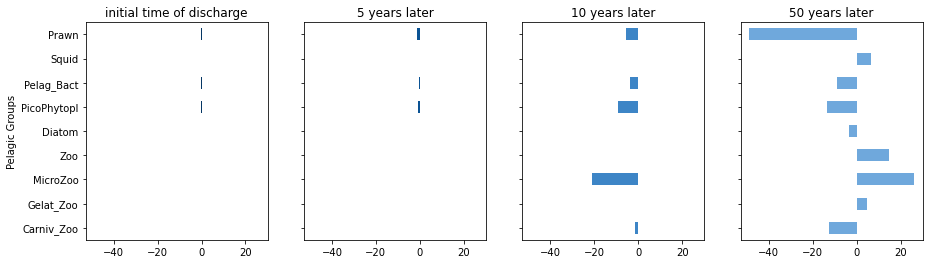

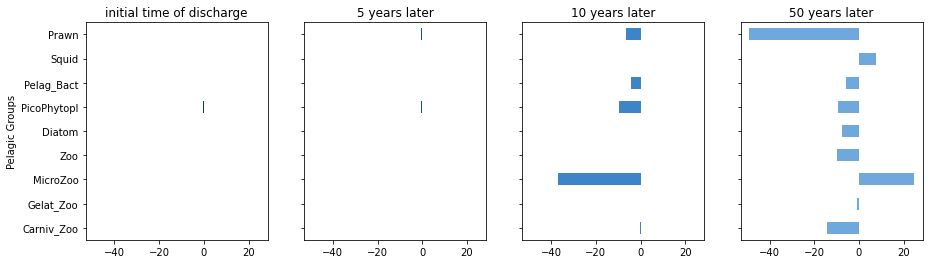

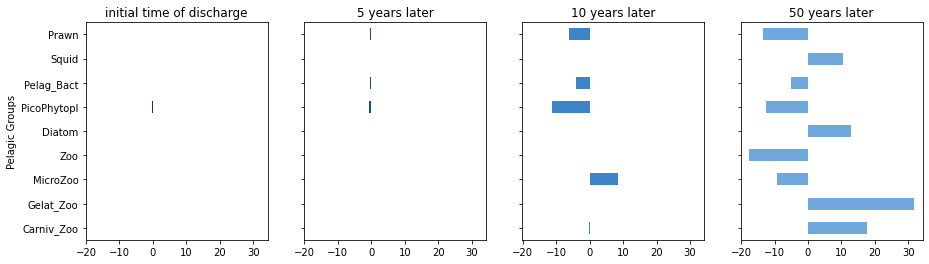

In [217]:
avg_pelagic_boxplot_region(groups.planktonic, SoG_center, xlim=None)

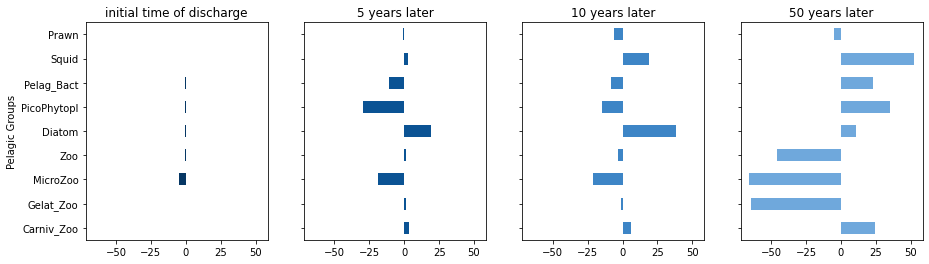

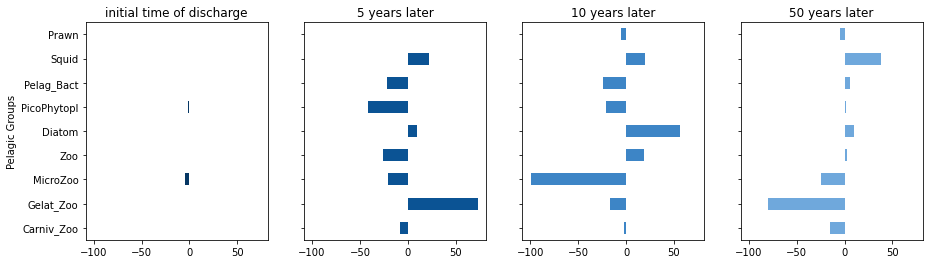

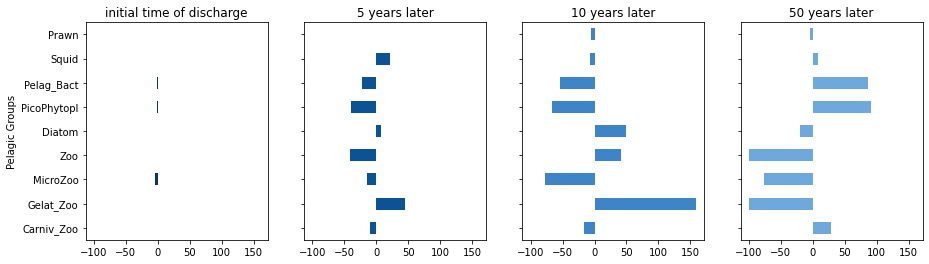

In [218]:
avg_pelagic_boxplot_region(groups.planktonic, SoG_south, xlim=None)

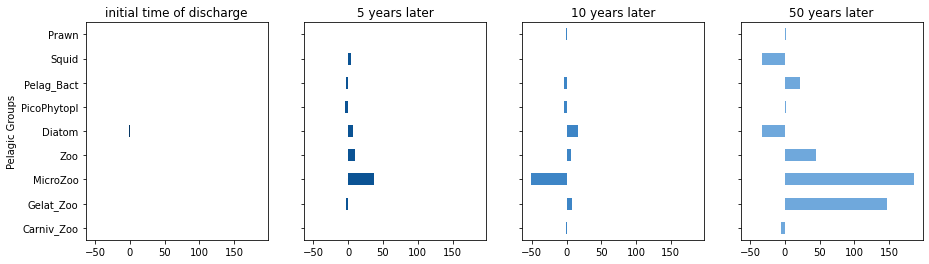

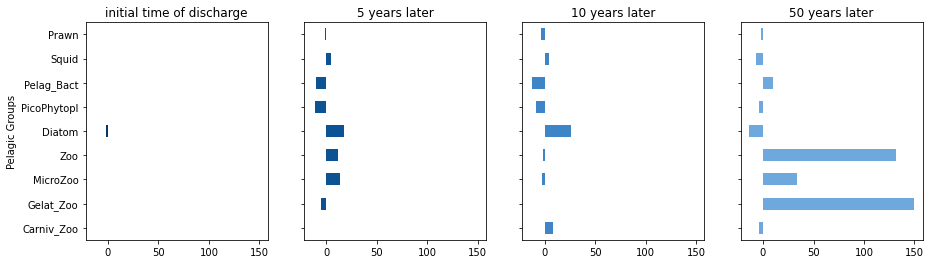

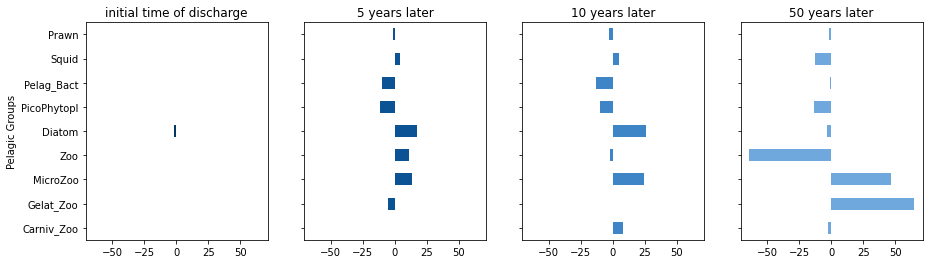

In [219]:
avg_pelagic_boxplot_region(groups.planktonic, Haro_Boundary, xlim=None)

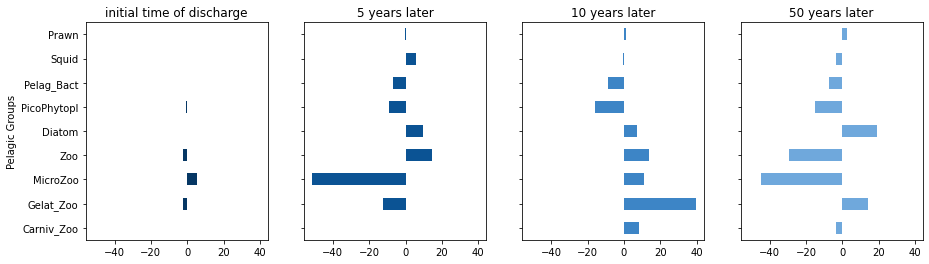

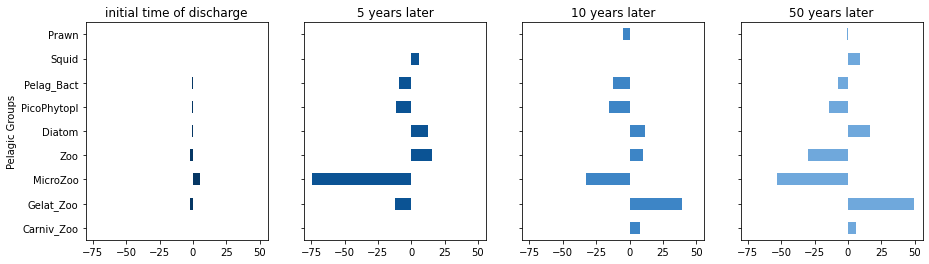

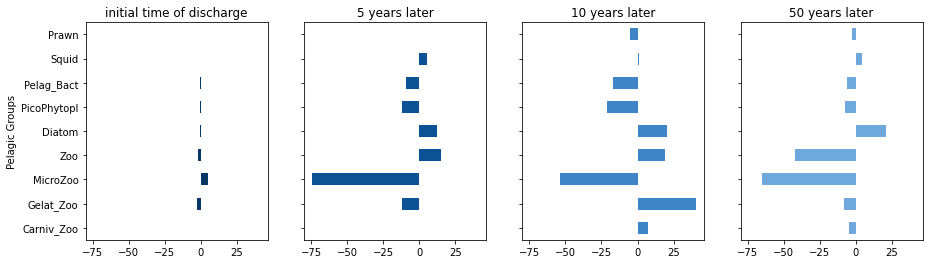

In [220]:
avg_pelagic_boxplot_region(groups.planktonic, JdF_east, xlim=None)

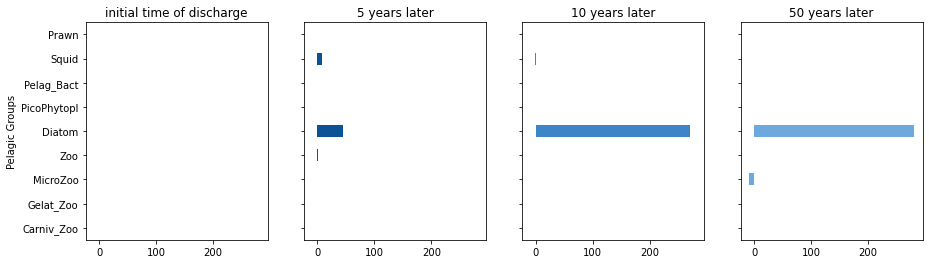

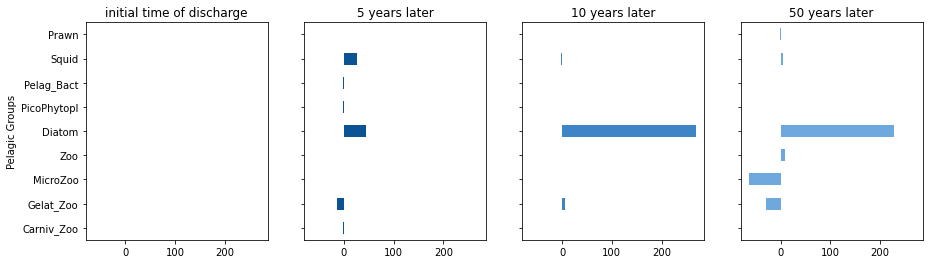

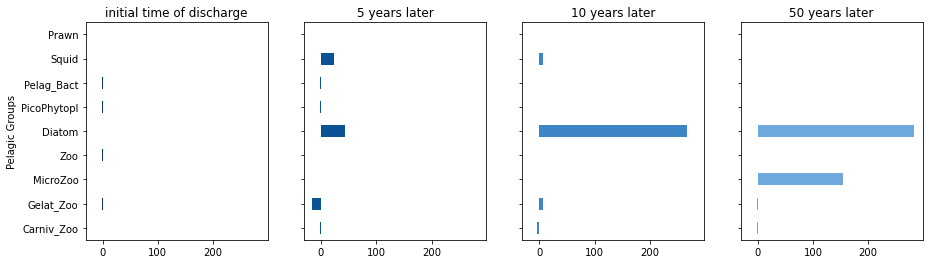

In [221]:
avg_pelagic_boxplot_region(groups.planktonic, JdF_west, xlim=None)

## Snapshot data
comparison to single time snapshot plot

In [205]:
no_microplankton = {
    'carnivorous zooplankton':'Carniv_Zoo', 'gelatinous zooplantkon':'Gelat_Zoo',
    'mesozooplankton':'Zoo', 'diatoms':'Diatom', 'picophytoplankton':'PicoPhytopl', 'pelagic bacteria':'Pelag_Bact',
    'squid':'Squid', 'prawn': 'Prawn', 
}

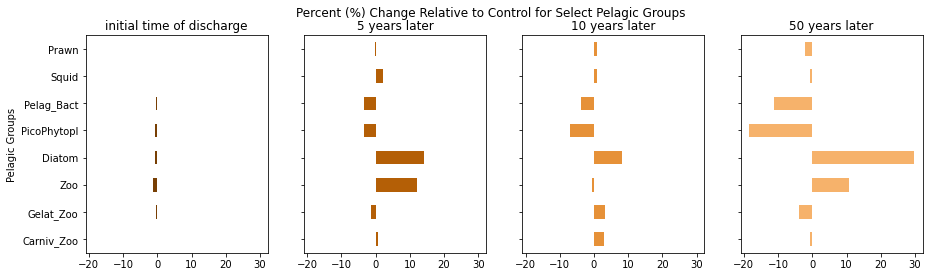

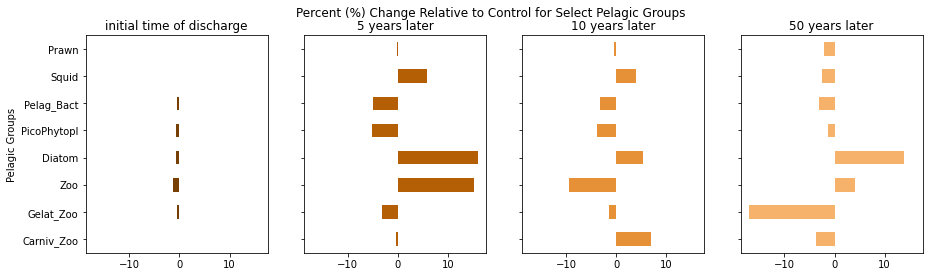

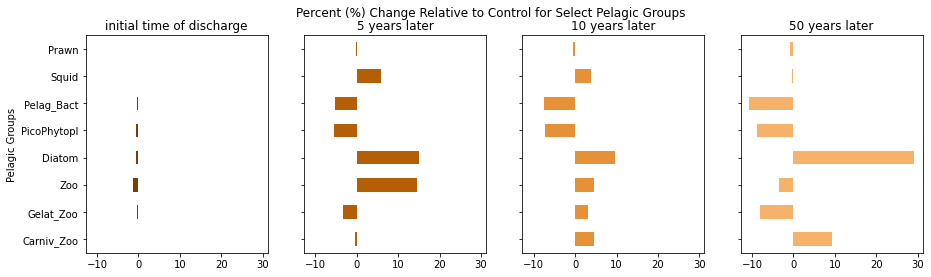

In [206]:
group = no_microplankton 
for scenario in scenarios:
    df = pd.DataFrame(data)
    spp = []
    
    for species in group:
        results = list()
        for day in final_days:
            p_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][day,:,0:6], np.nan) # tonnes, take only water column layers
            p_control = np.ma.filled(control.variables[group[species] + '_N'][day,:,0:6], np.nan)
            p_oiled = p_oiled.sum(axis=0)
            p_oiled = p_oiled.sum(axis=0)
            p_control = p_control.sum(axis=0)
            p_control = p_control.sum(axis=0)
            ratio = (p_oiled/p_control-1)*100
            results.append(ratio)
        spp.append(group[species])
        df.loc[len(df.index)] = results
    df['bio_group'] = spp
    df1 = df.set_index('bio_group')

    df1.plot(kind="barh", subplots=True, layout=(1,len(days)), figsize=(15,4), sharey=True, sharex=True, color=bio_colours, legend=False, #ax=ax,
        xlabel='Pelagic Groups', ylabel=None, title='Percent (%) Change Relative to Control for Select Pelagic Groups', xlim=None); 

Compare to txt outputSalishSeaBiomIndx file of tonnes

In [207]:
control_biomindx = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber/Scrubber_discharge_100y_control/outputSalishSeaBiomIndx.txt"
scenario2019_biomindx = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber/Scrubber_discharge_100y_2019/outputSalishSeaBiomIndx.txt"
scenario2024_biomindx = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber/Scrubber_discharge_100y_2024/outputSalishSeaBiomIndx.txt"
scenario2029_biomindx = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber/Scrubber_discharge_100y_2029/outputSalishSeaBiomIndx.txt"

In [208]:
scenarios_biomindx = [scenario2019_biomindx, scenario2024_biomindx, scenario2029_biomindx]

In [209]:
planktonic_codes = {
    'carnivorous zooplankton':'ZL', 'gelatinous zooplantkon':'ZG', 'microzooplankton':'ZS',
    'mesozooplankton':'ZM', 'diatoms':'PL', 'picophytoplankton':'PS', 'pelagic bacteria':'PB',
    'squid':'CEP', 'prawn': 'PWN', 
}

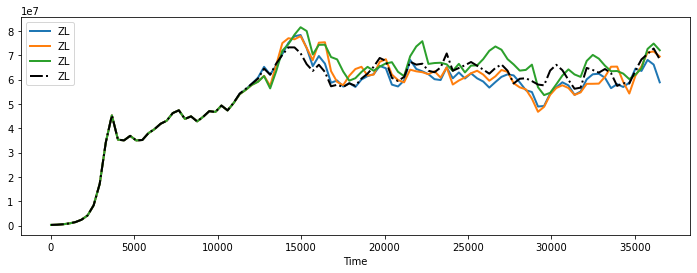

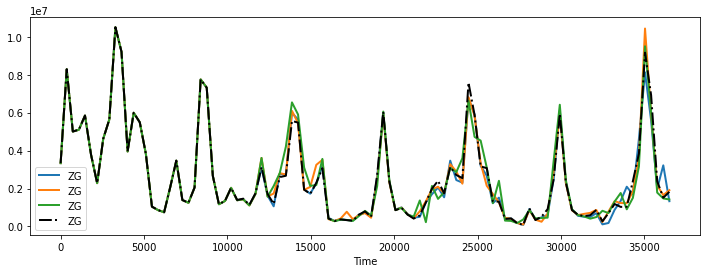

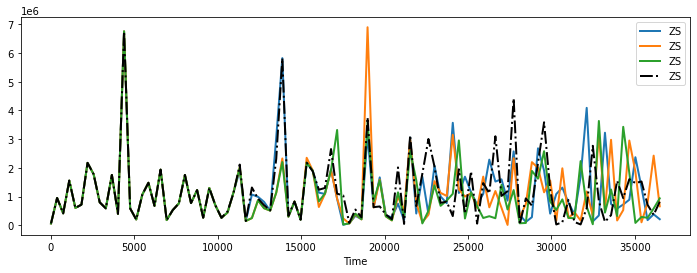

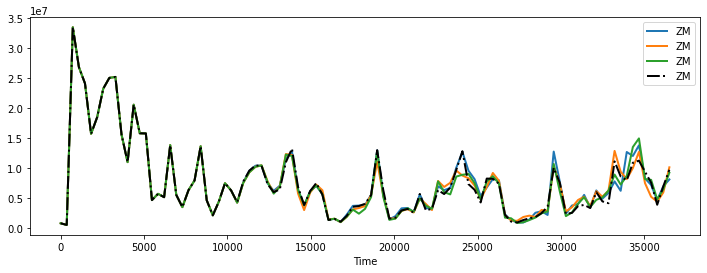

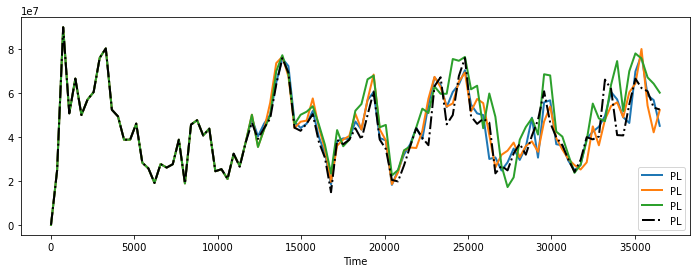

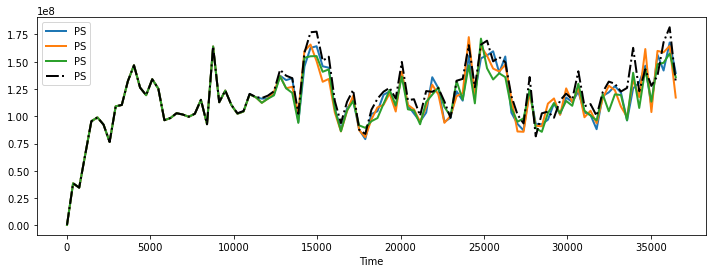

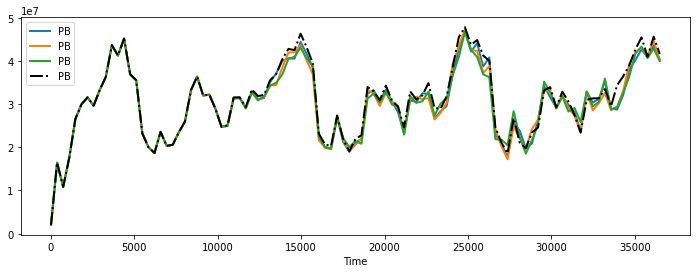

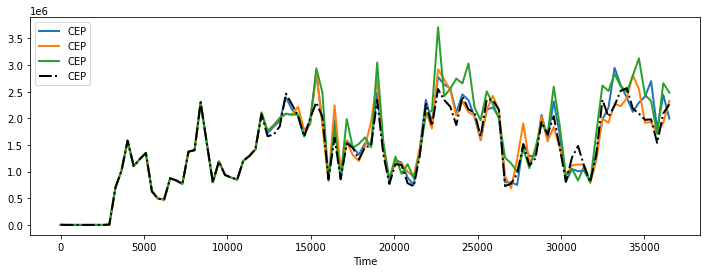

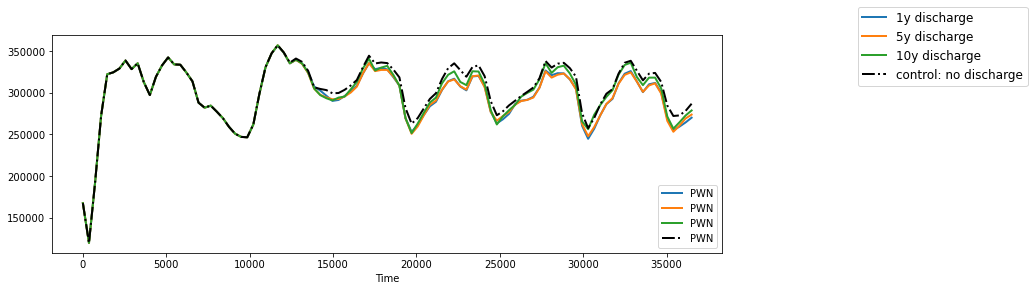

In [210]:
group = planktonic_codes 
for species in group:
    fig, ax = plt.subplots(figsize=(12, 4)) # Microzooplankton

    cbiomass = pd.read_csv(control_biomindx, sep=" ")
    for scenario in scenarios_biomindx:
        sbiomass = pd.read_csv(scenario, sep=" ")
        sbiomass.plot('Time', group[species], linewidth=2, ax=ax)
    cbiomass.plot('Time', group[species], color='black', linestyle='-.', linewidth=2, ax=ax)
fig.legend(['1y discharge','5y discharge','10y discharge','control: no discharge'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12);

# for scenario in scenarios:
#     df = pd.DataFrame(data)
#     spp = []
    
#     for species in group:
#         results = list()
#         for day in final_days:
#             p_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][day,:,0:6], np.nan) # tonnes, take only water column layers
#             p_control = np.ma.filled(control.variables[group[species] + '_N'][day,:,0:6], np.nan)
#             p_oiled = p_oiled.sum(axis=0)
#             p_oiled = p_oiled.sum(axis=0)
#             p_control = p_control.sum(axis=0)
#             p_control = p_control.sum(axis=0)
#             ratio = (p_oiled/p_control-1)*100
#             results.append(ratio)
#         spp.append(group[species])
#         df.loc[len(df.index)] = results
#     df['bio_group'] = spp
#     df1 = df.set_index('bio_group')

#     df1.plot(kind="barh", subplots=True, layout=(1,len(days)), figsize=(15,4), sharey=True, sharex=True, color=bio_colours, legend=False, #ax=ax,
#         xlabel='Pelagic Groups', ylabel=None, title='Percent (%) Change Relative to Control for Select Pelagic Groups', xlim=None); 

In [ ]:
for scenario in scenarios:
    splot.boxplot_pelagic(groups.mammals,scenario,control,start,days,data)

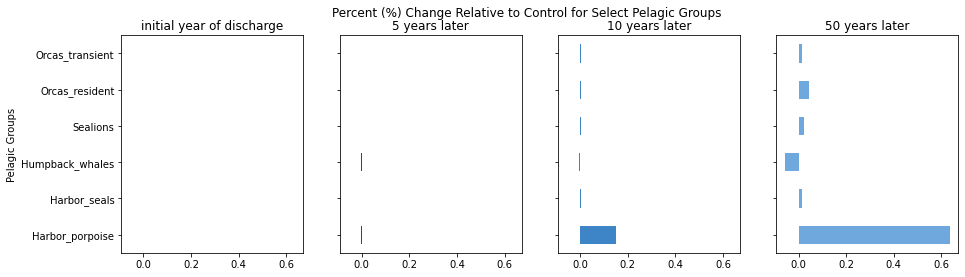

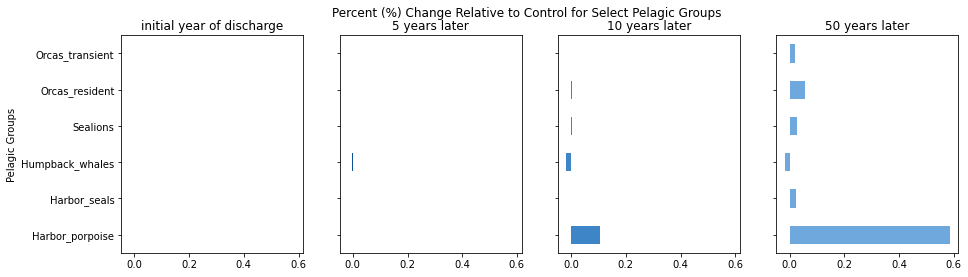

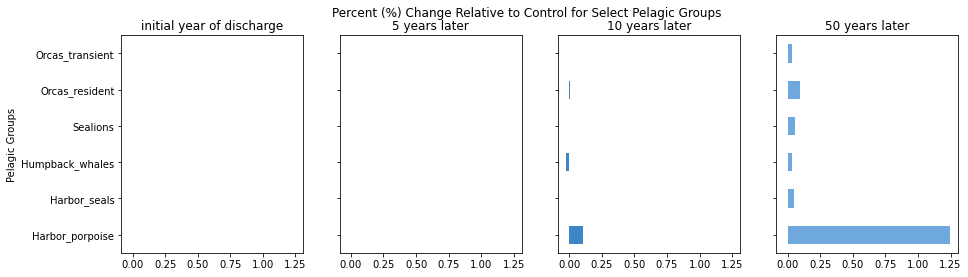

In [ ]:
for scenario in scenarios:
    splot.boxplot_pelagic(groups.mammals,scenario,control,start,days,data)

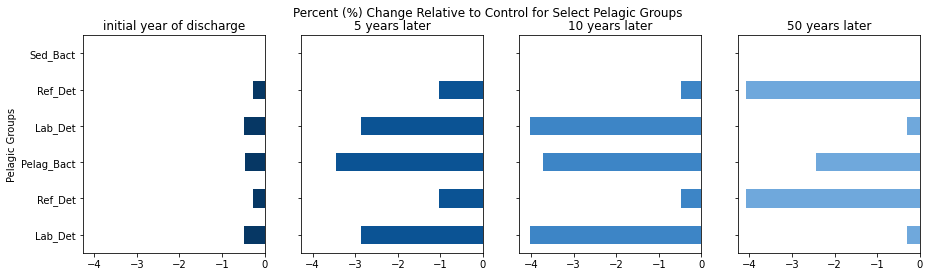

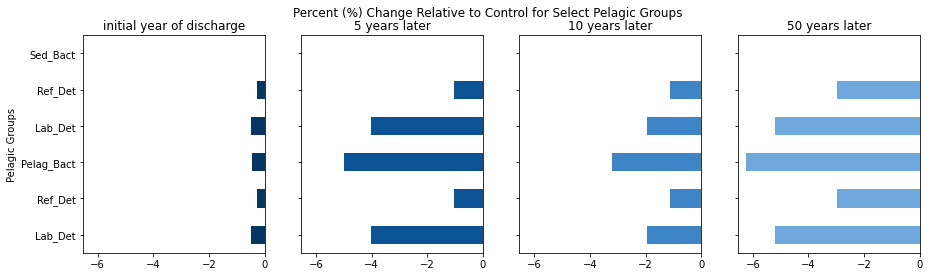

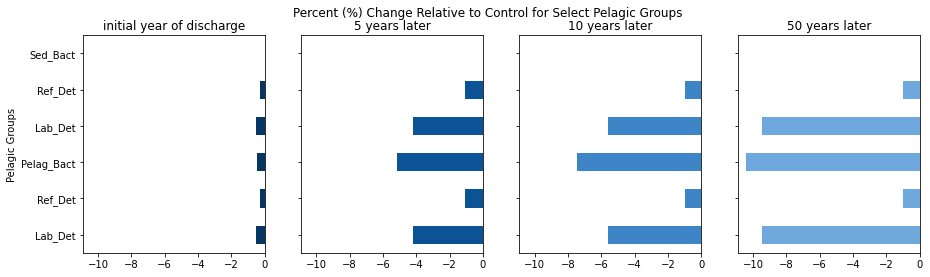

In [ ]:
for scenario in scenarios:
    splot.boxplot_pelagic(groups.bacteria, scenario, control, days, data)

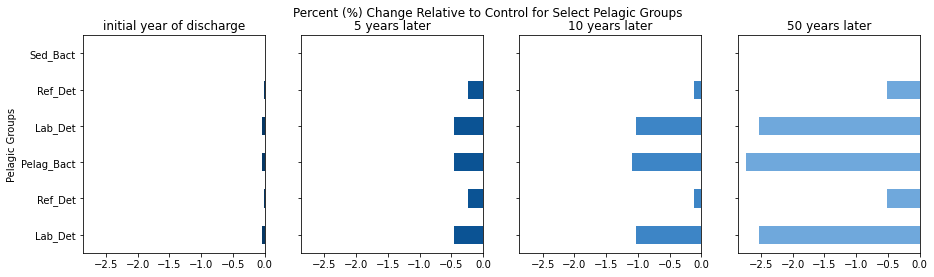

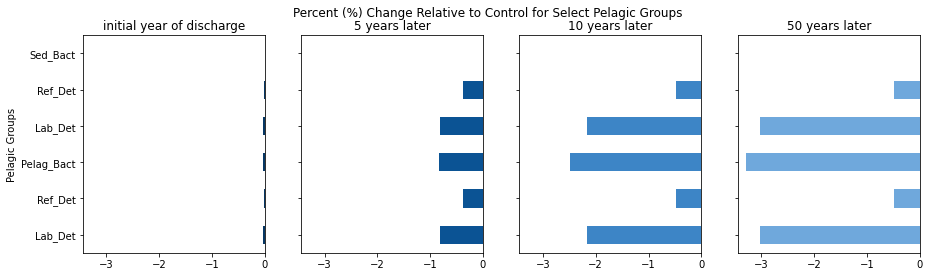

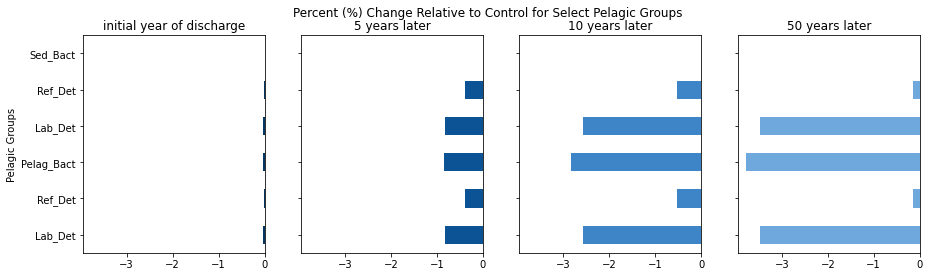

In [ ]:
for scenario in scenarios:
    splot.boxplot_pelagic(groups.bacteria, scenario, control, start, days, data)

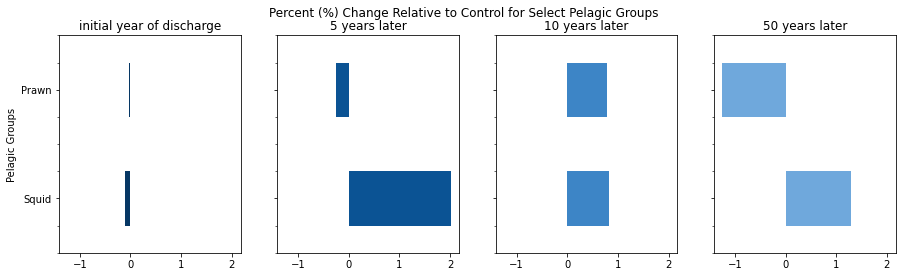

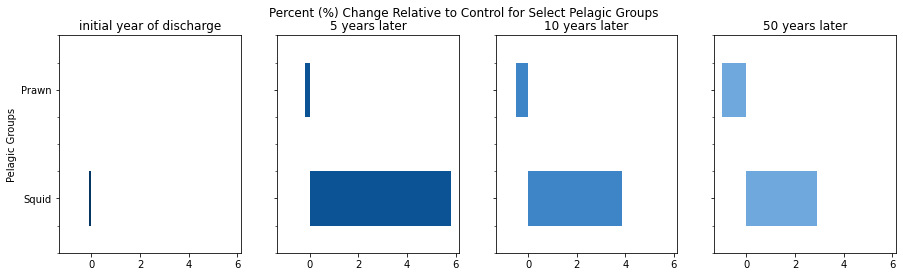

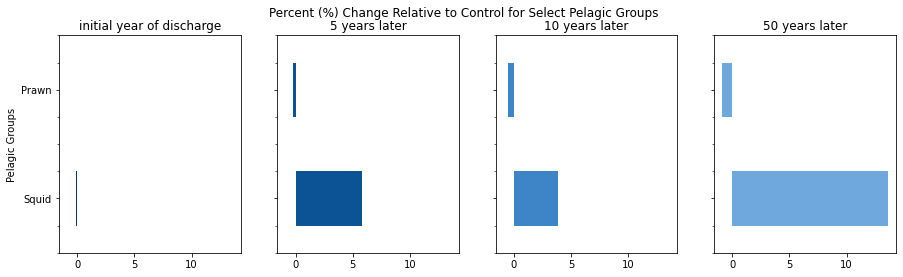

In [ ]:
for scenario in scenarios:
    splot.boxplot_pelagic(groups.pelagic_invertebrates, scenario, control, days, data)

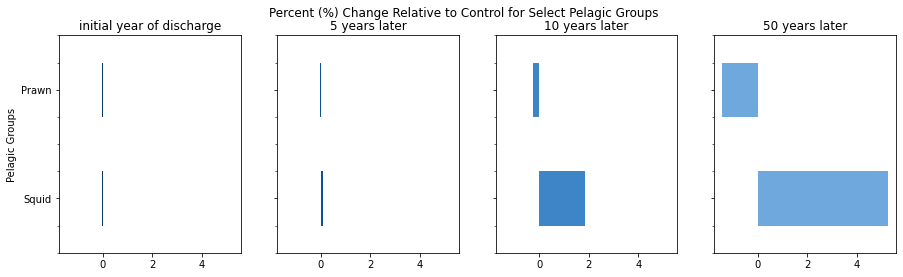

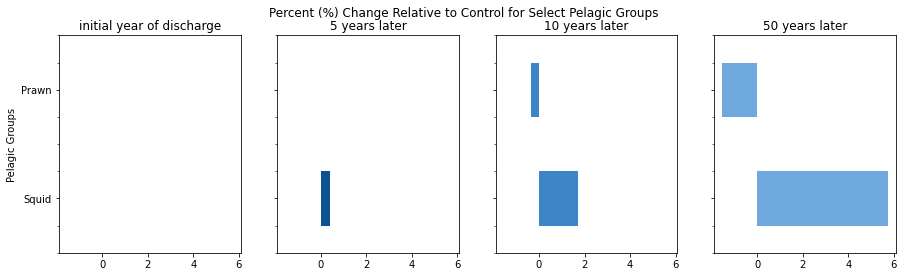

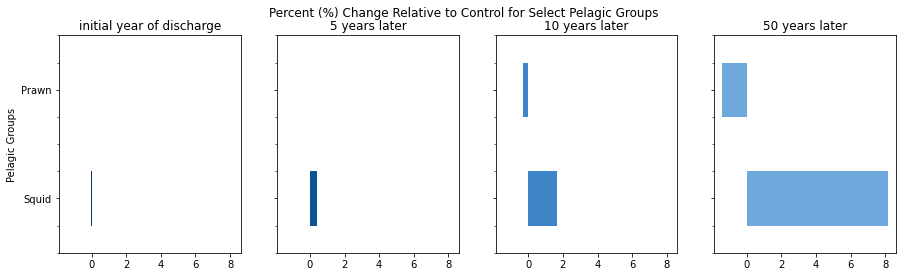

In [ ]:
for scenario in scenarios:
    splot.boxplot_pelagic(groups.pelagic_invertebrates, scenario, control, start, days, data)

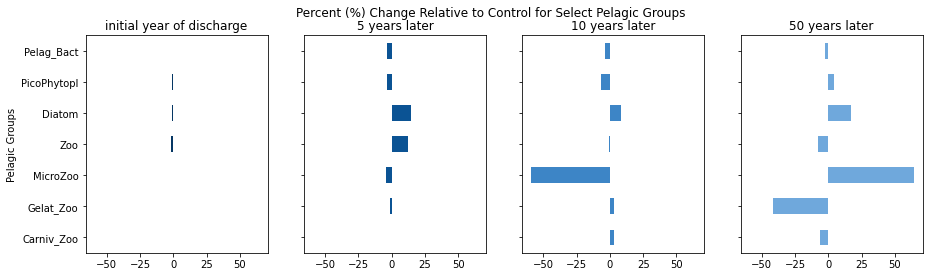

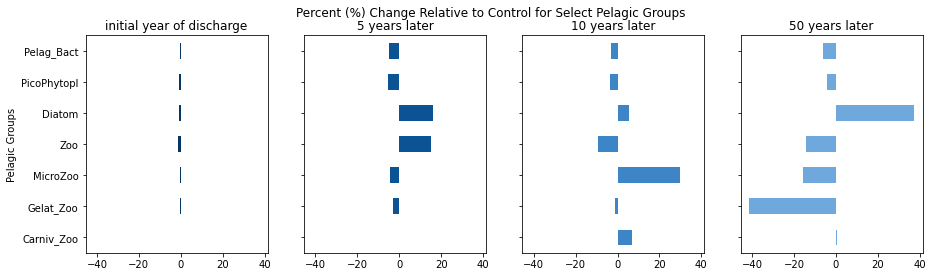

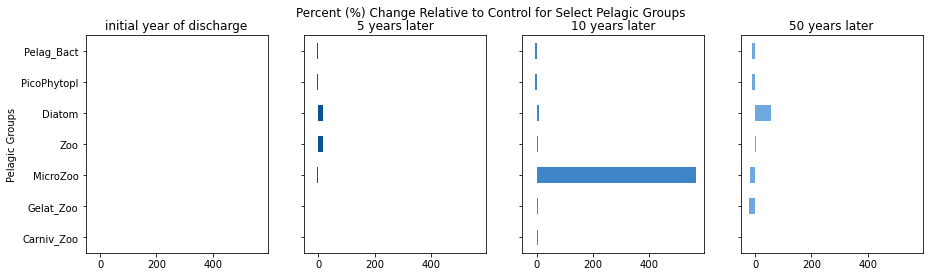

In [ ]:
for scenario in scenarios:
    splot.boxplot_pelagic(groups.plankton, scenario, control, days, data)

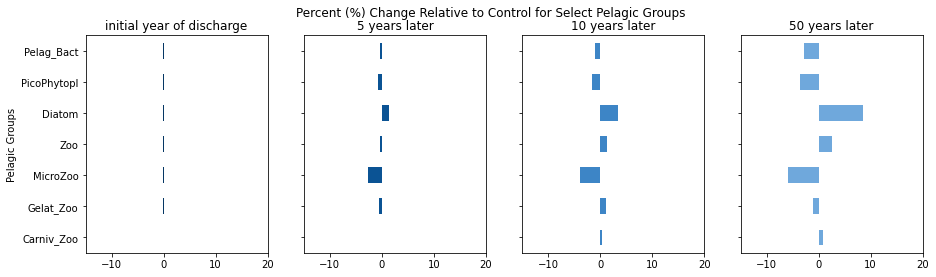

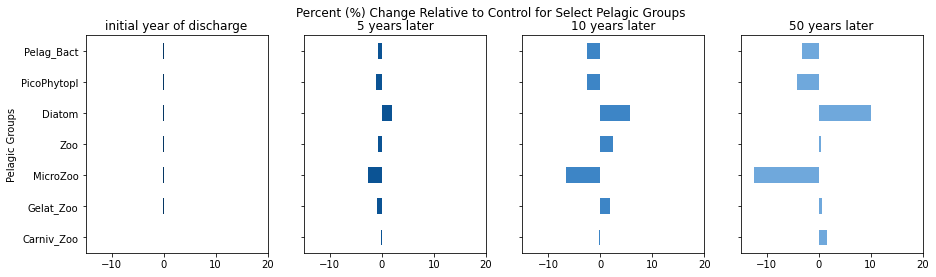

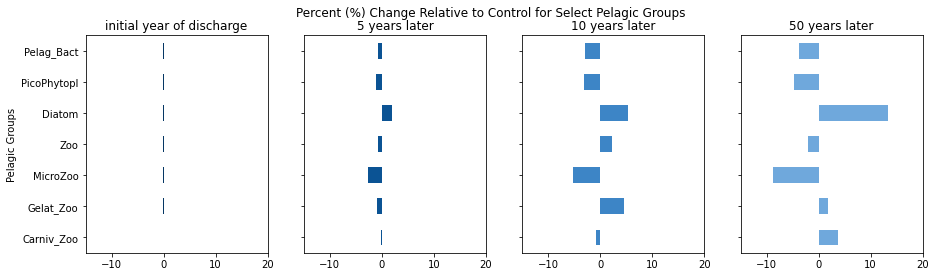

In [ ]:
for scenario in scenarios:
    splot.boxplot_pelagic(groups.plankton, scenario, control, start, days, data, x_lim=[-15,20])

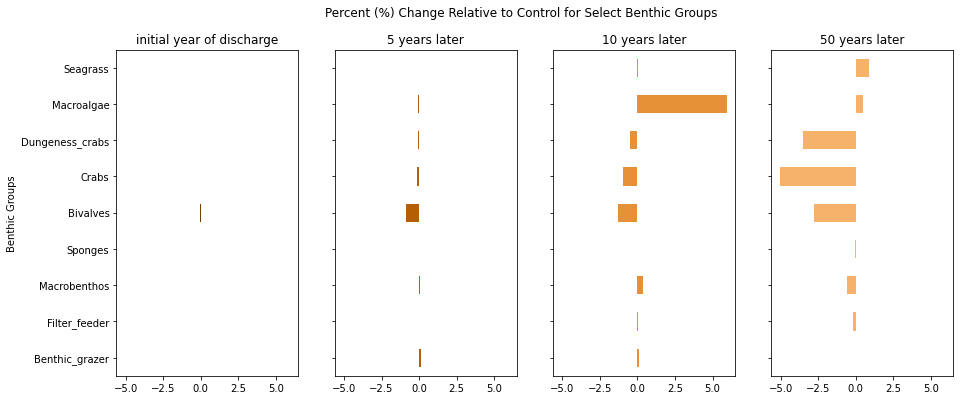

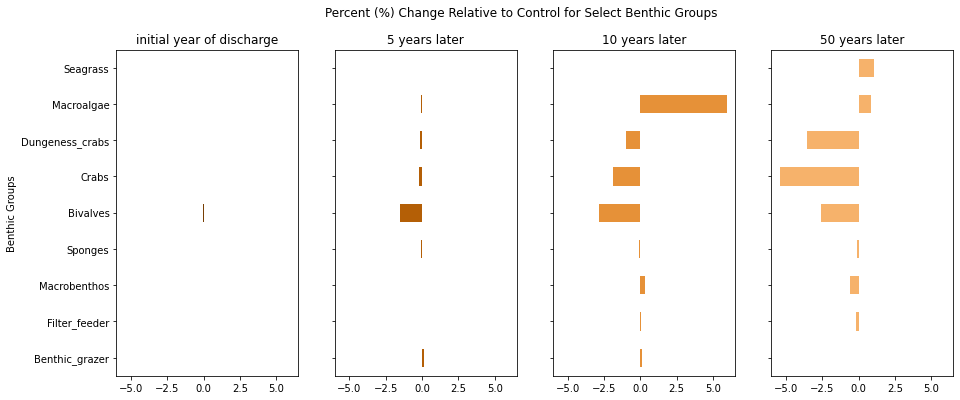

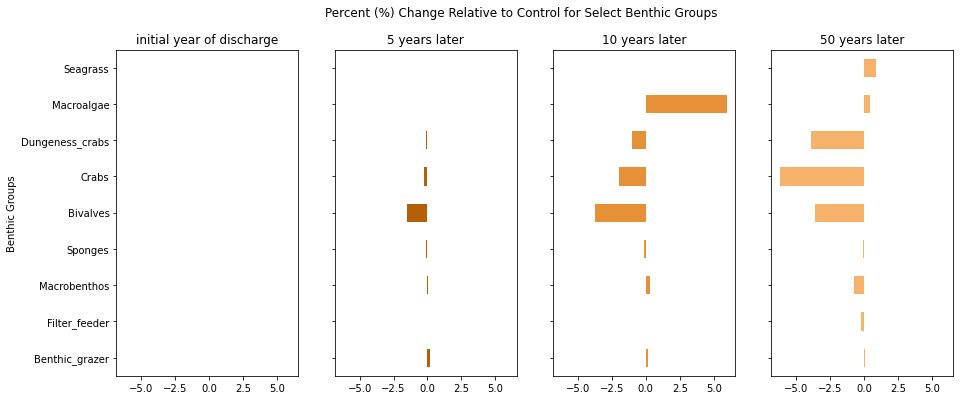

In [ ]:
for scenario in scenarios:
    splot.boxplot_benthic(groups.benthos, scenario, control, days, data)

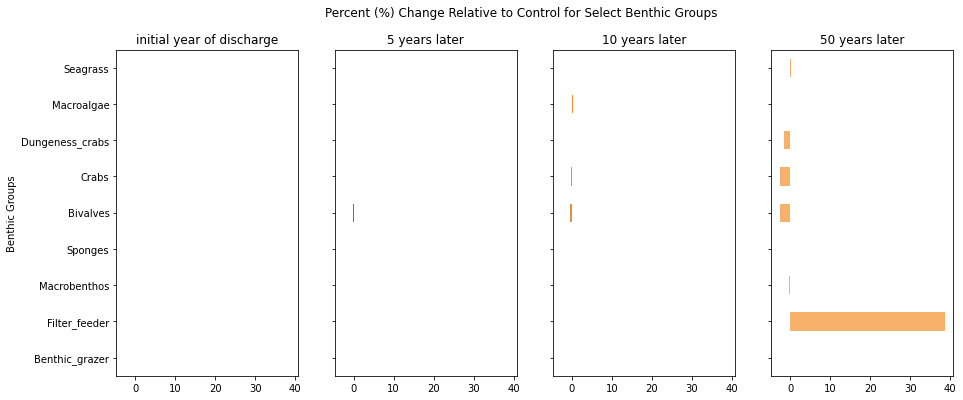

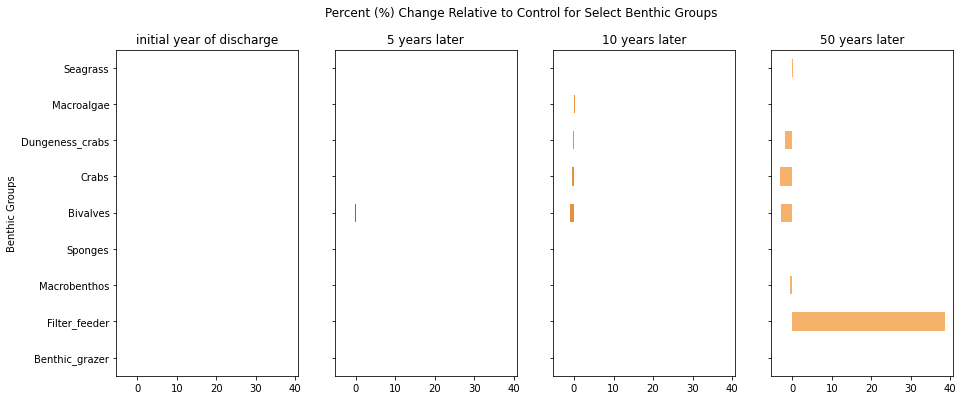

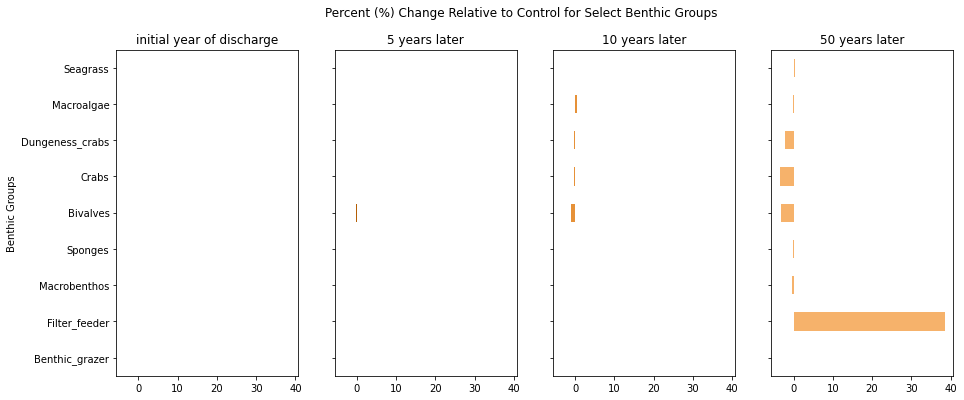

In [ ]:
for scenario in scenarios:
    splot.boxplot_benthic(groups.benthos, scenario, control, start, days, data)

## Whole Salish Sea

Plot depth profiles for 4 time periods with 1-year sums

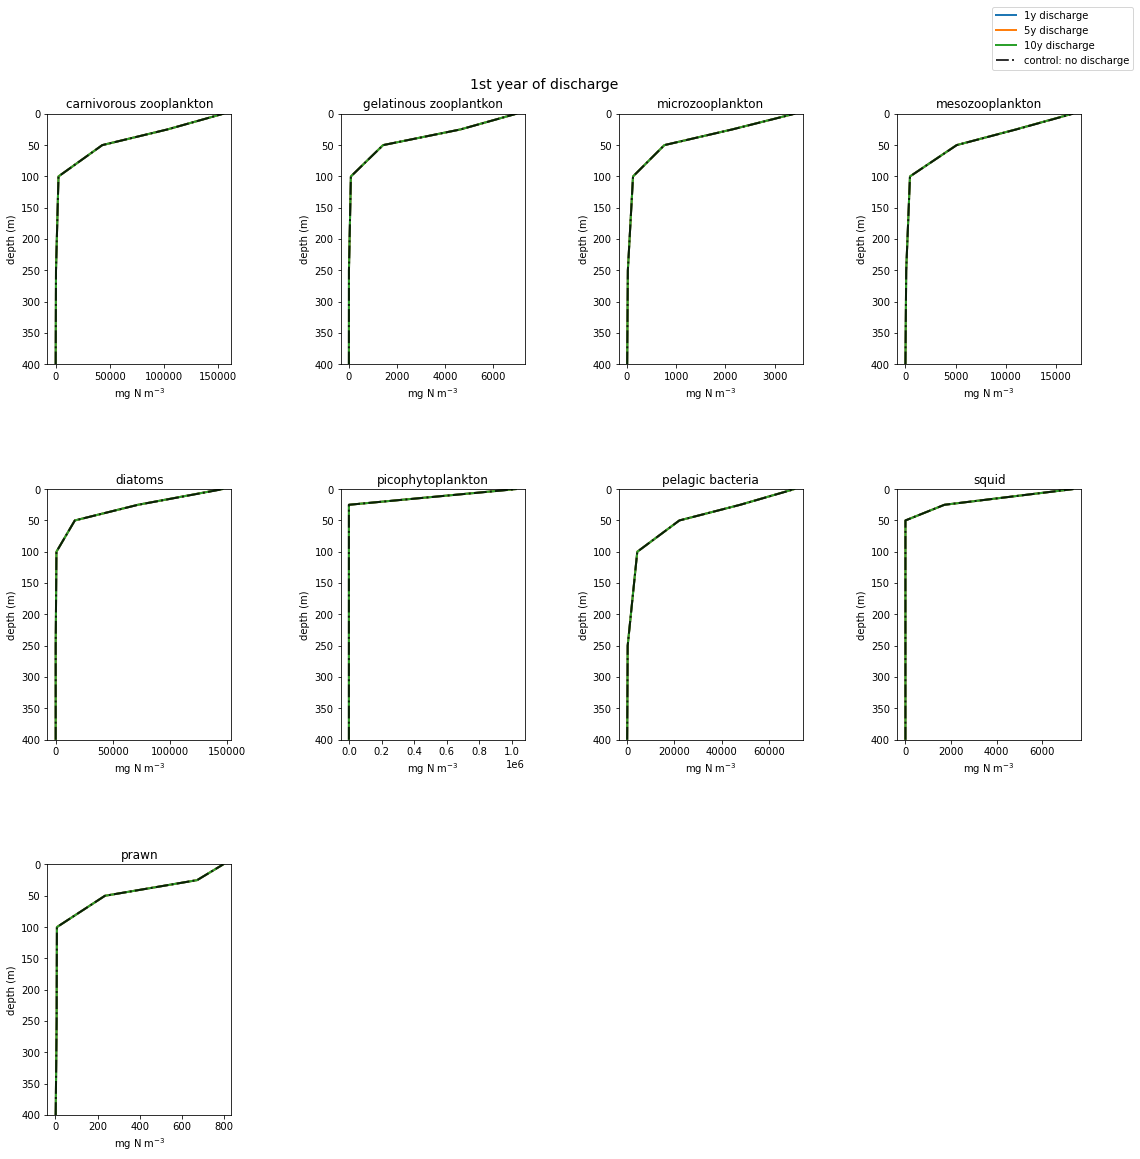

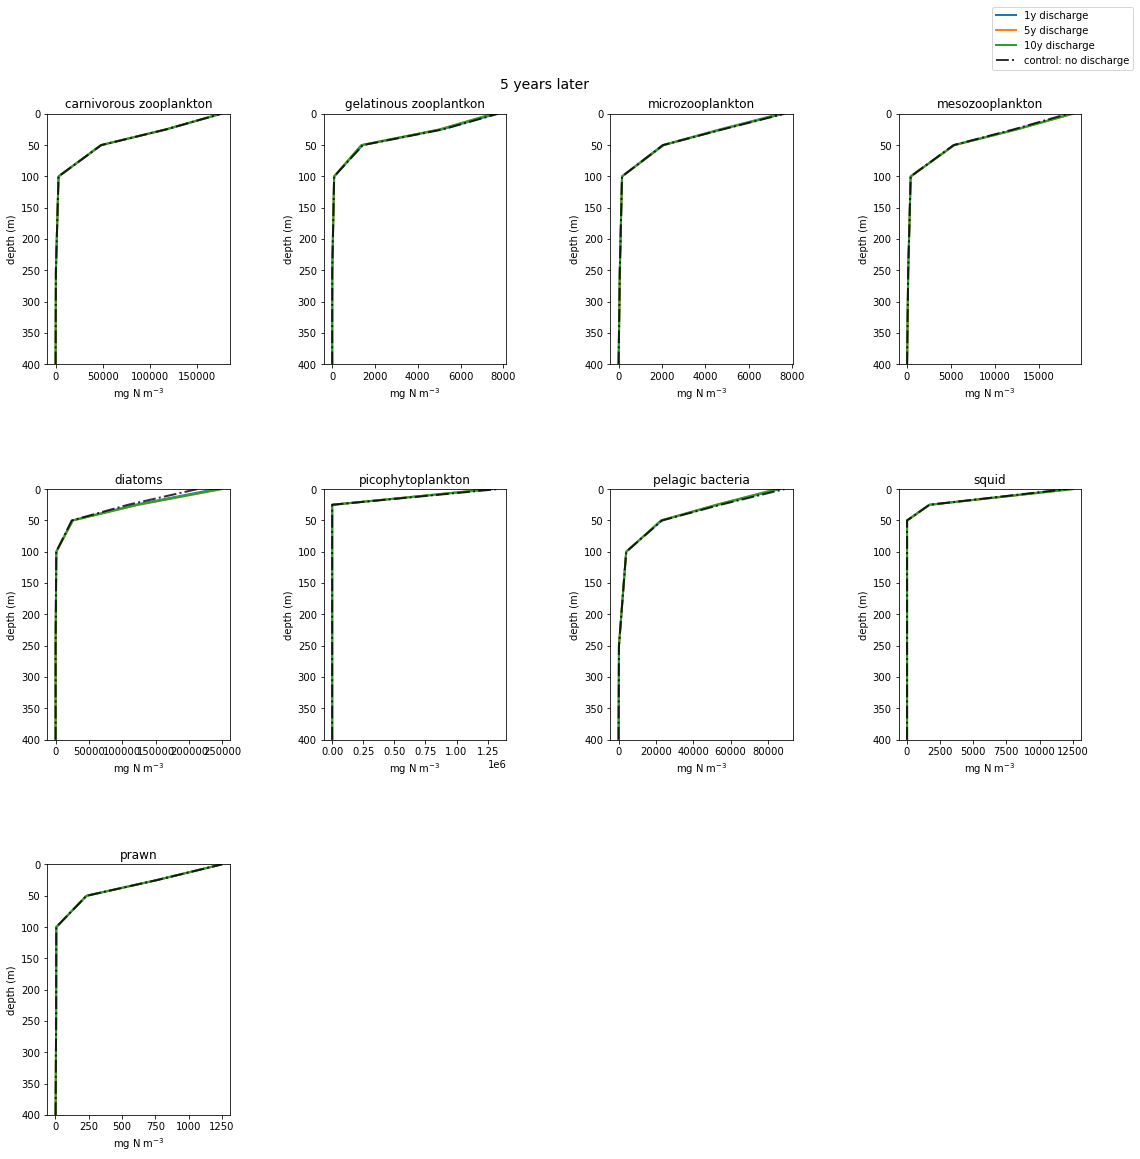

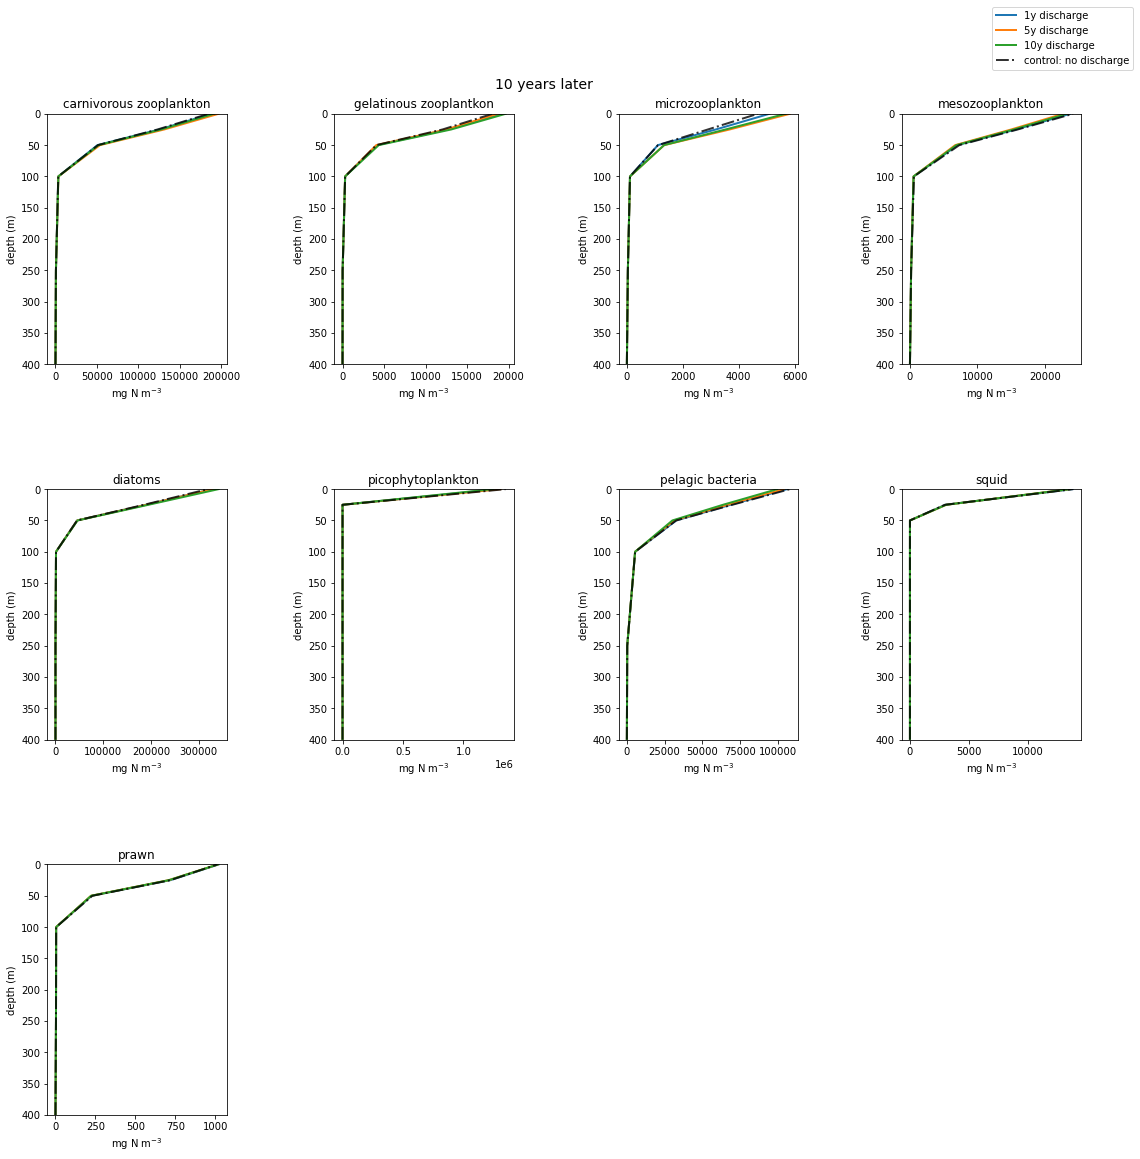

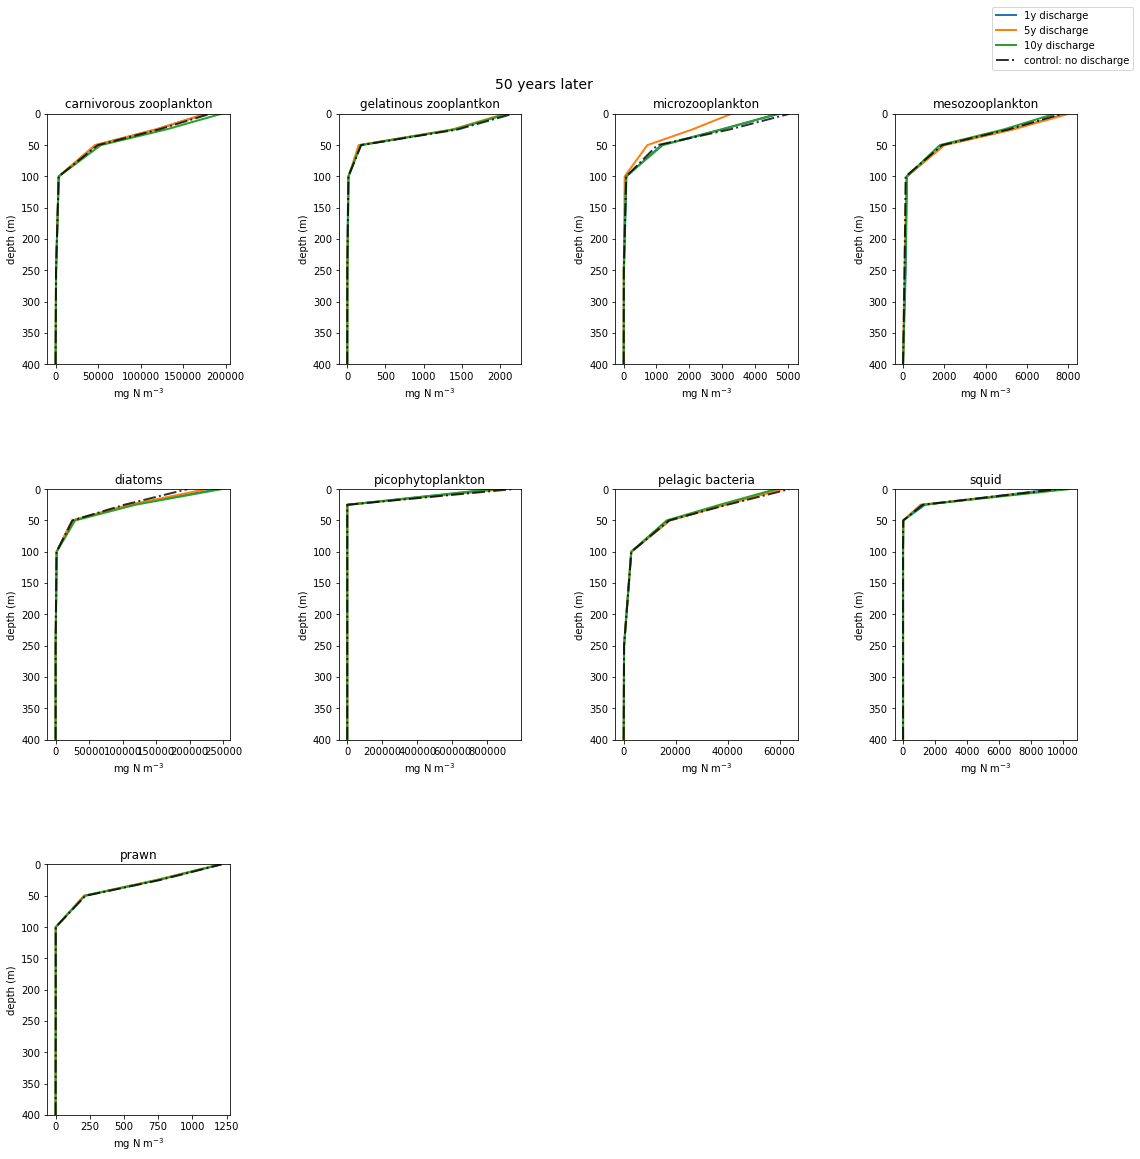

In [ ]:
group = groups.planktonic
for day in days:
    fig = plt.figure(figsize=(15, 15), facecolor='white', constrained_layout=True)
    gs = plt.GridSpec(3, 4, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1, 1], height_ratios=[1, 1, 1], figure=fig) 

    discharge_time = {0:'1st year of discharge', 1:'5 years later', 2:'10 years later', 3:'50 years later',}

    depth = [400, 250, 100, 50, 25, 0]


    for species in group:

        bio_index = (list(group).index(species))

        if bio_index < 4:
            position = 0, bio_index
        elif bio_index > 7: 
            position = 2, bio_index-8
        else :
            position = 1, bio_index-4

        ax = fig.add_subplot(gs[position])
        
        pelagic_control = np.ma.filled(control.variables[group[species] + '_N'][day,:,0:6], np.nan)
        p_control = pelagic_control.sum(axis=0)
        p_control = p_control.sum(axis=0)
        ax.set_ylim(250, 0)  # decreasing depth
        
        for scenario in scenarios:

            pelagic_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][day,:,0:6], np.nan) # tonnes, take only water column layers
            p_oiled = pelagic_oiled.sum(axis=0)
            p_oiled = p_oiled.sum(axis=0)
            ax.plot(p_oiled, depth, linewidth = 2)
        ax.plot(p_control, depth, '-.k', linewidth = 2, alpha=0.8)
        ax.set_title(species);
        ax.set_ylabel('depth (m)')
        ax.set_xlabel('mg N m$^{-3}$')
    fig.legend(['1y discharge','5y discharge','10y discharge','control: no discharge'],bbox_to_anchor=(1.05, 1), loc='lower right');  # place the legend outside)
    fig.suptitle(discharge_time[days.index(day)], fontsize=14)

Plot depth profiles for the whole Salish Sea with cumulative sums up to year end

In [ ]:
final_days = [55,75,95,256]

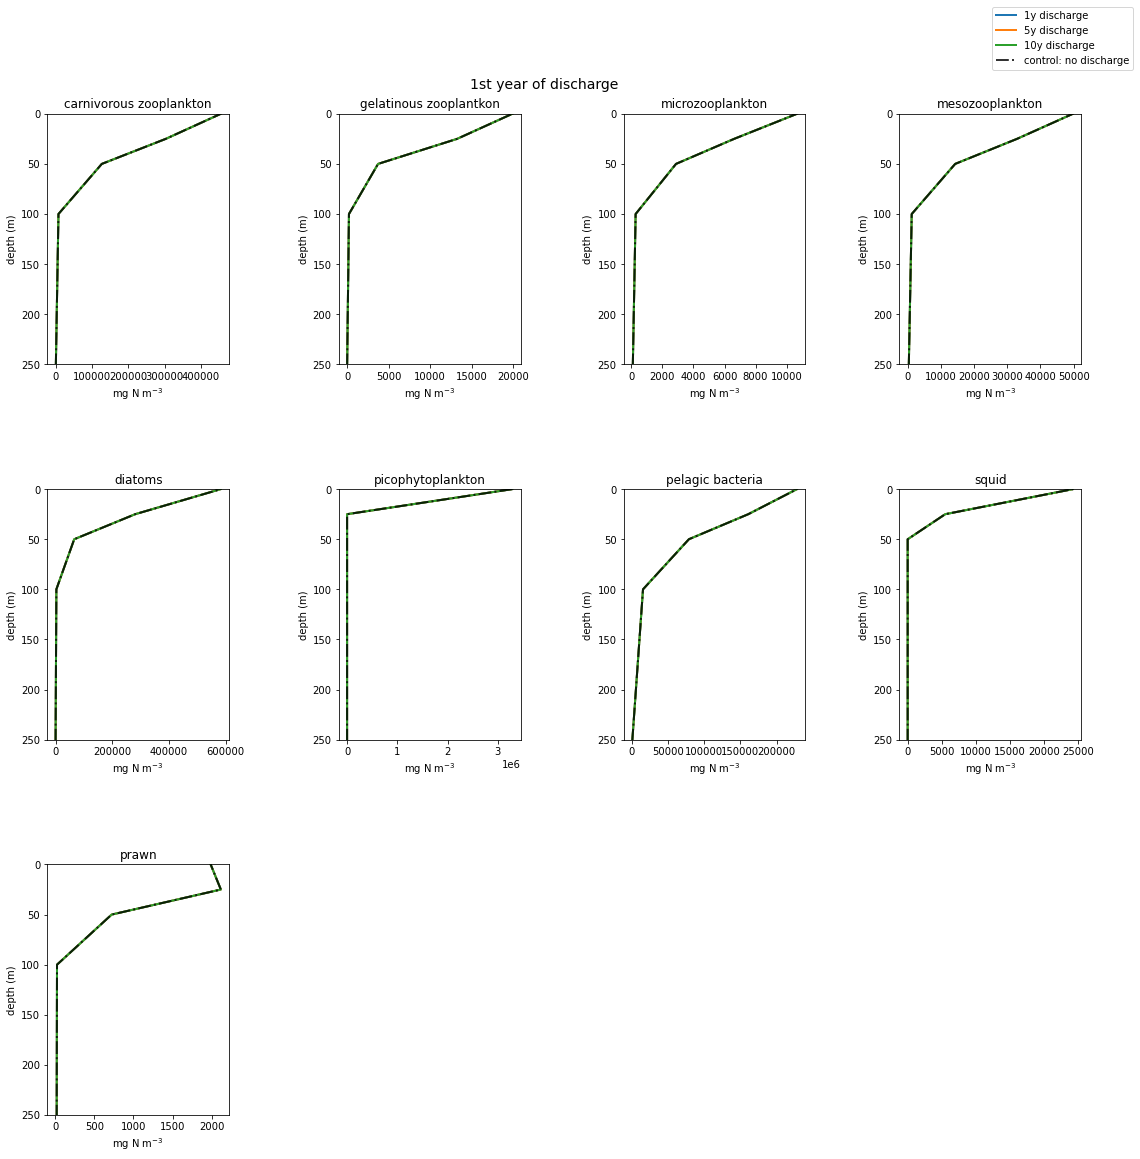

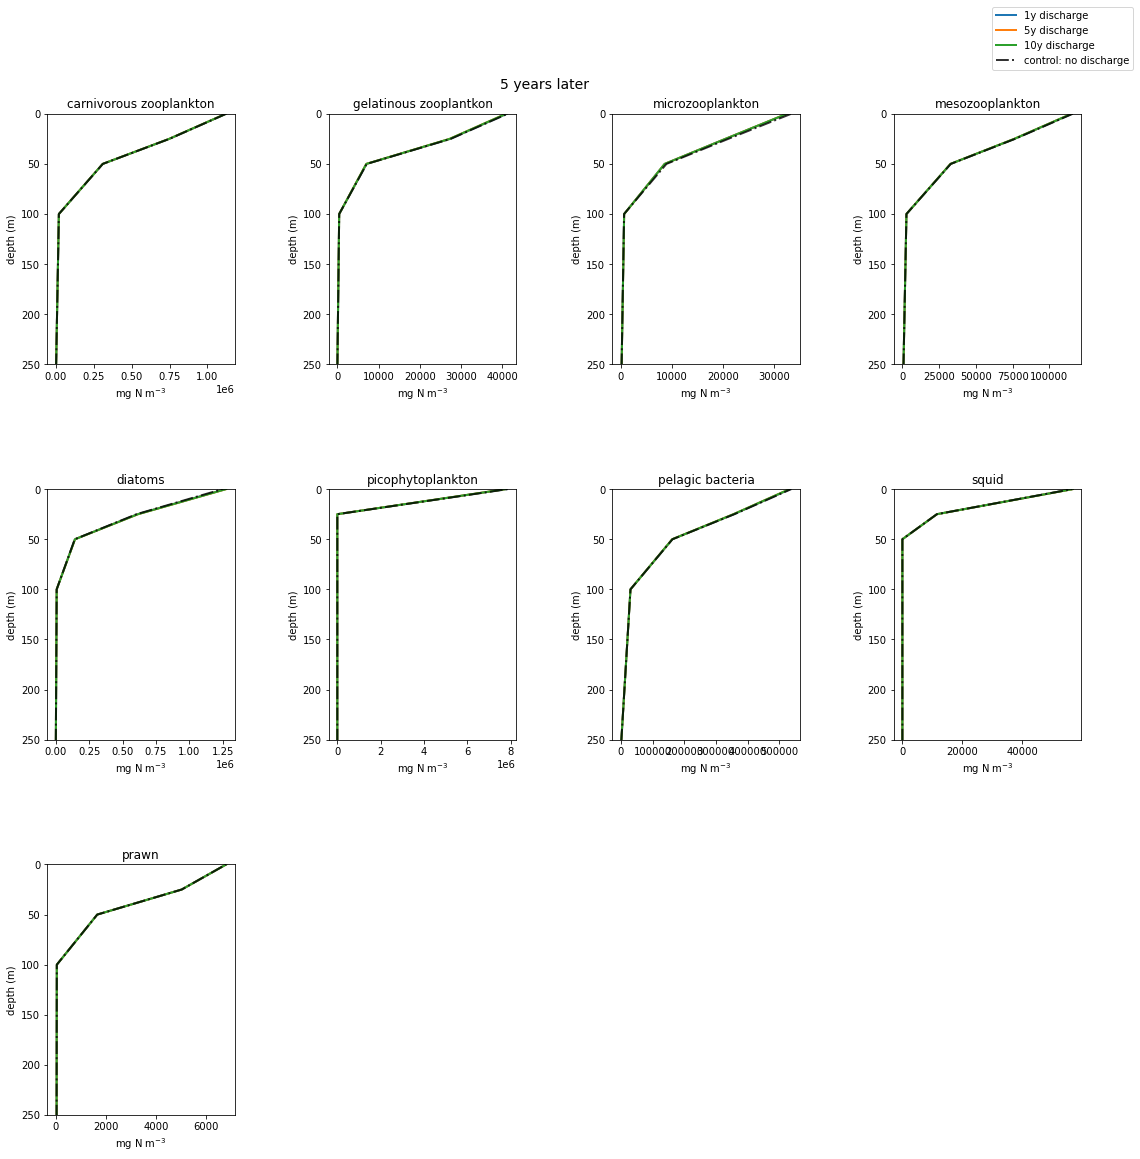

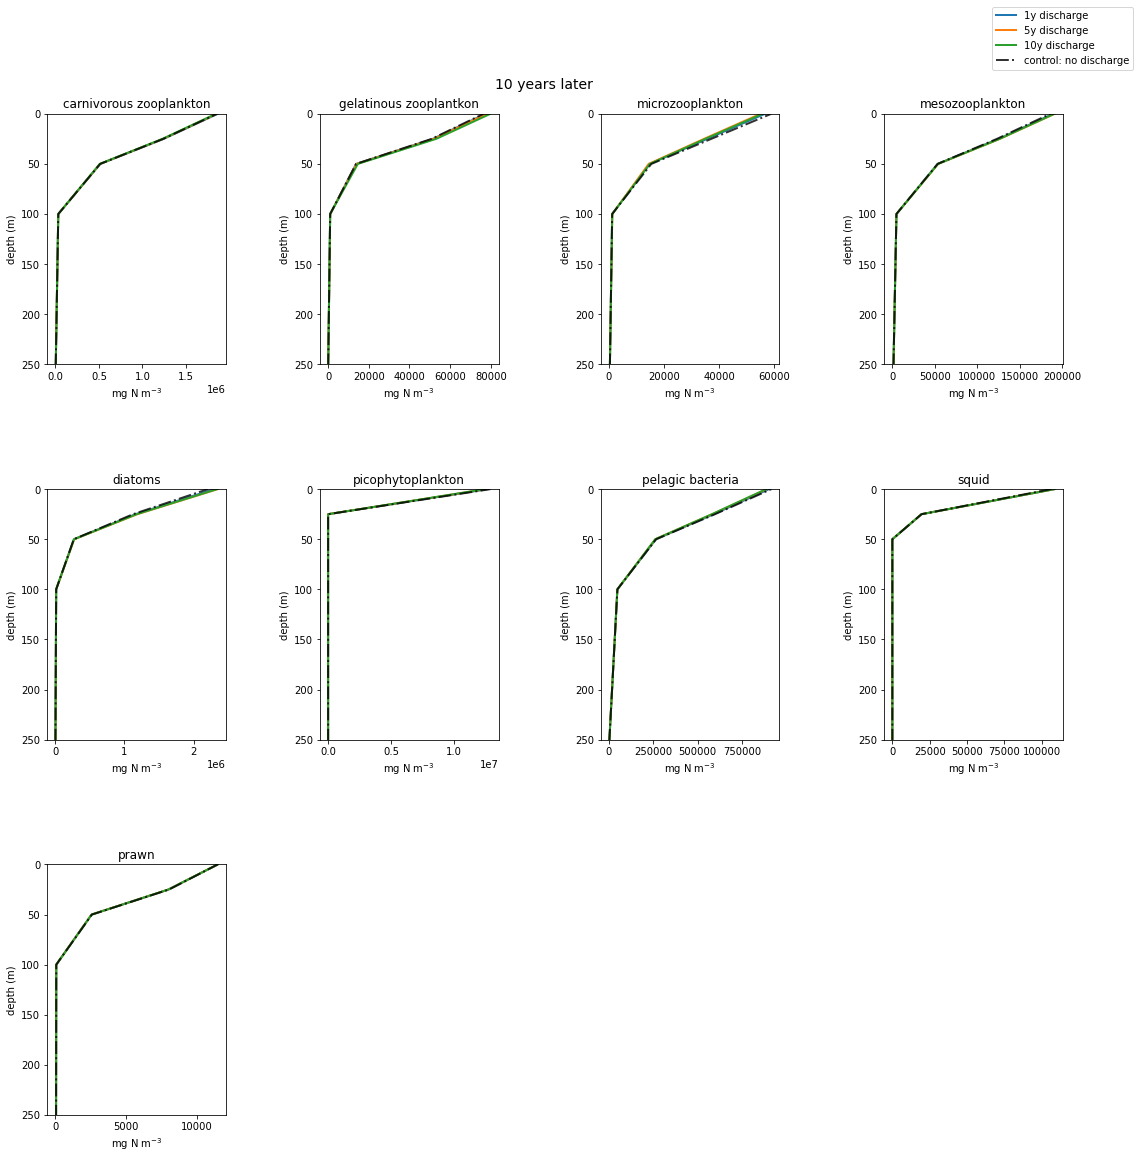

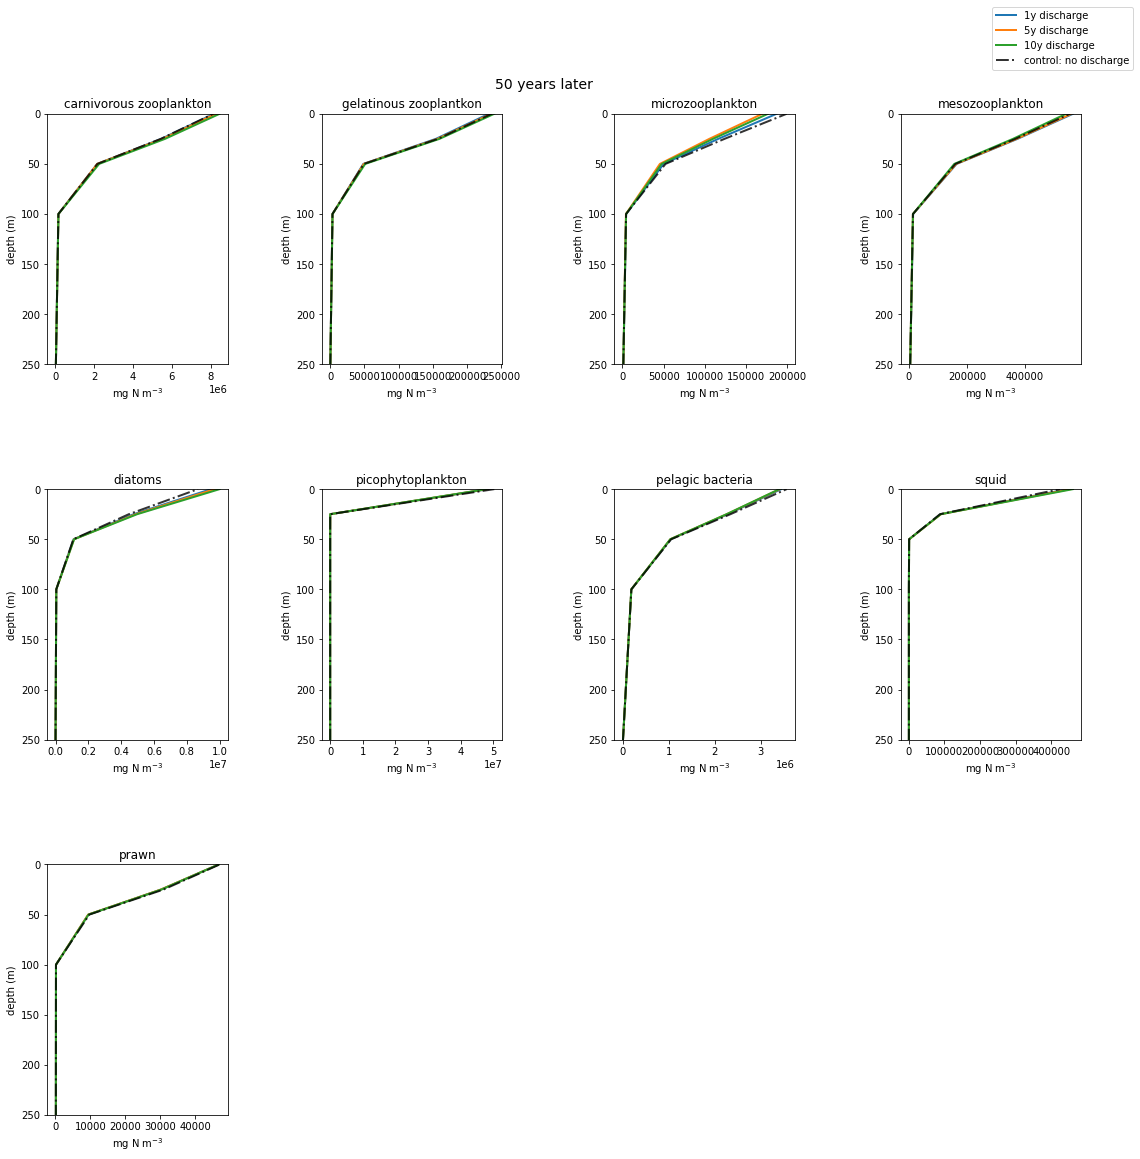

In [ ]:
group = groups.planktonic
for day in final_days:
    fig = plt.figure(figsize=(15, 15), facecolor='white', constrained_layout=True)
    gs = plt.GridSpec(3, 4, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1, 1], height_ratios=[1, 1, 1], figure=fig) 

    discharge_time = {0:'1st year of discharge', 1:'5 years later', 2:'10 years later', 3:'50 years later',}
    depth = [400, 250, 100, 50, 25, 0]


    for species in group:

        bio_index = (list(group).index(species))

        if bio_index < 4:
            position = 0, bio_index
        elif bio_index > 7: 
            position = 2, bio_index-8
        else :
            position = 1, bio_index-4

        ax = fig.add_subplot(gs[position])
        
        pelagic_control = np.ma.filled(control.variables[group[species] + '_N'][start:day,:,0:6], np.nan)
        p_control = pelagic_control.sum(axis=0)
        p_control = p_control.sum(axis=0)
        ax.set_ylim(250, 0)  # decreasing depth
        
        for scenario in scenarios:

            pelagic_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][start:day,:,0:6], np.nan) # tonnes, take only water column layers
            p_oiled = pelagic_oiled.sum(axis=0)
            p_oiled = p_oiled.sum(axis=0)
            ax.plot(p_oiled, depth, linewidth = 2)
        ax.plot(p_control, depth, '-.k', linewidth = 2, alpha=0.8)
        ax.set_title(species);
        ax.set_ylabel('depth (m)')
        ax.set_xlabel('mg N m$^{-3}$')
    fig.legend(['1y discharge','5y discharge','10y discharge','control: no discharge'],bbox_to_anchor=(1.05, 1), loc='lower right');  # place the legend outside)
    fig.suptitle(discharge_time[final_days.index(day)], fontsize=14)

## Regions

In [ ]:
#regions by Atlantis boxes
JdF_west = [1,2,3,4]
JdF_east = [5,6,7,8,9,10,11]
Haro_Boundary = [60,33,34,35,36]
SoG_south = [54,64,68,79]
SoG_center = [80,81,82,83,84,85]
SoG_north = [88,92,94,98,101,102]
PS_main = [20,21,23,26]

### net over the whole model run (75 years)

In [ ]:
run_end = time.size-1

In [ ]:
print(time[start])
print(time[run_end])

2016-12-14T14:00:00.000000000
2091-12-06T14:00:00.000000000


### Plankton

In [ ]:
planktonic = {
    'carnivorous zooplankton':'Carniv_Zoo', 'gelatinous zooplantkon':'Gelat_Zoo', 'microzooplankton':'MicroZoo',
    'mesozooplankton':'Zoo', 'diatoms':'Diatom', 'picophytoplankton':'PicoPhytopl', 'pelagic bacteria':'Pelag_Bact',
    'squid':'Squid', 'prawn': 'Prawn', 
}

In [ ]:
def plot_depth_profile(group, scenarios, control, start, end, region):

    fig = plt.figure(figsize=(15, 15), facecolor='white')
    gs = plt.GridSpec(3, 4, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1, 1], height_ratios=[1, 1, 1]) 

    depth = [400, 250, 100, 50, 25, 0]

    for species in group:

        bio_index = (list(group).index(species))

        if bio_index < 4:
            position = 0, bio_index
        elif bio_index > 7: 
            position = 2, bio_index-8
        else :
            position = 1, bio_index-4

        ax = fig.add_subplot(gs[position])
    
        pelagic_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,region,0:6], np.nan)
        p_control = pelagic_control.sum(axis=1)
        p_control = p_control.sum(axis=0)
        ax.set_ylim(400, 0)  # decreasing depth
        
        for scenario in scenarios:

            pelagic_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][start:end,region,0:6], np.nan) # tonnes, take only water column layers
            p_oiled = pelagic_oiled.sum(axis=1)
            p_oiled = p_oiled.sum(axis=0)
            ax.plot(p_oiled, depth, linewidth = 2)
        ax.plot(p_control, depth, '-.k', linewidth = 2, alpha=0.8)
        ax.set_title(species);
    ax.legend(['1y discharge','5y discharge','10y discharge','control: no discharge'],bbox_to_anchor=(1.05, 1)); #, loc='lower right');  # place the legend outside)

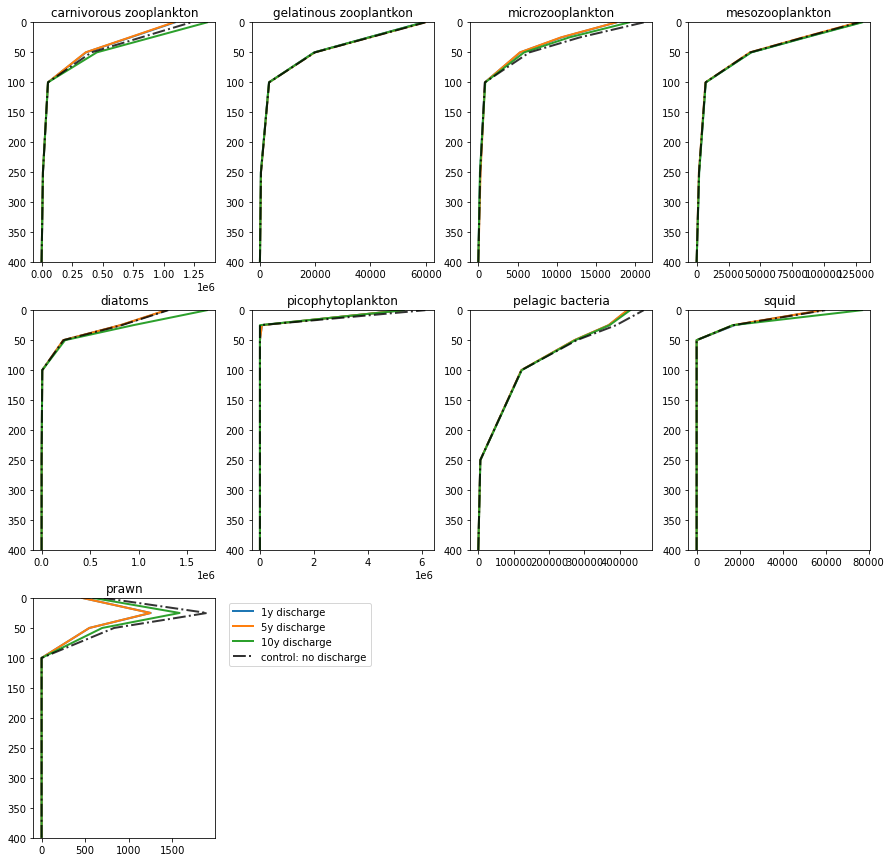

In [ ]:
plot_depth_profile(planktonic, scenarios, control, start, run_end, SoG_center)

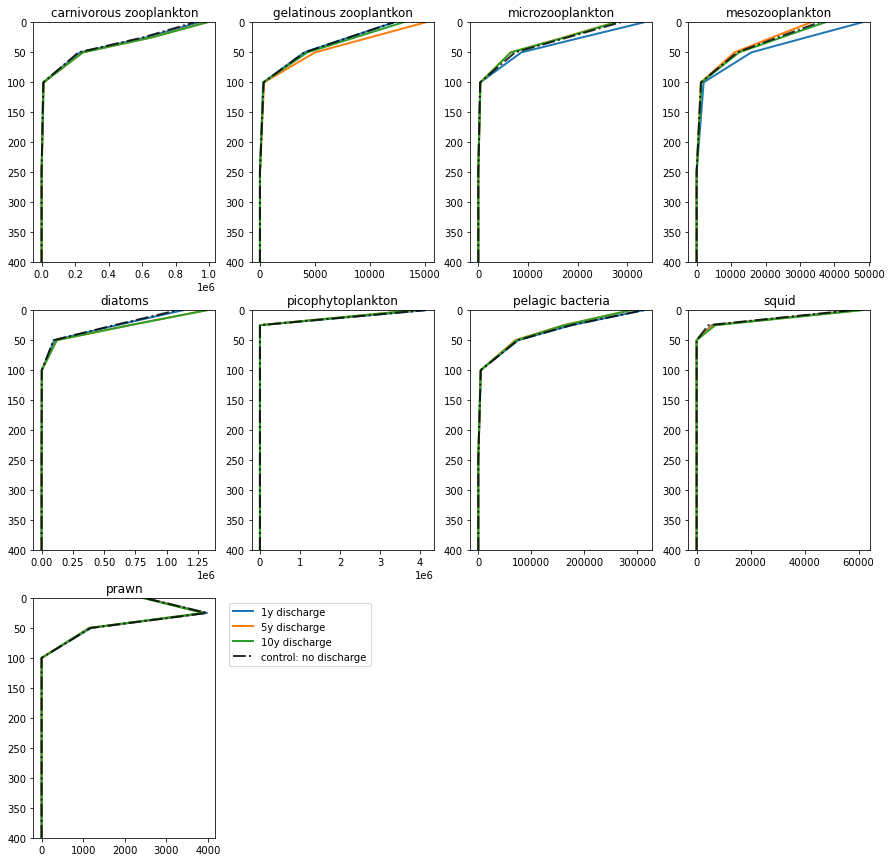

In [ ]:
plot_depth_profile(planktonic, scenarios, control, start, run_end, Haro_Boundary)

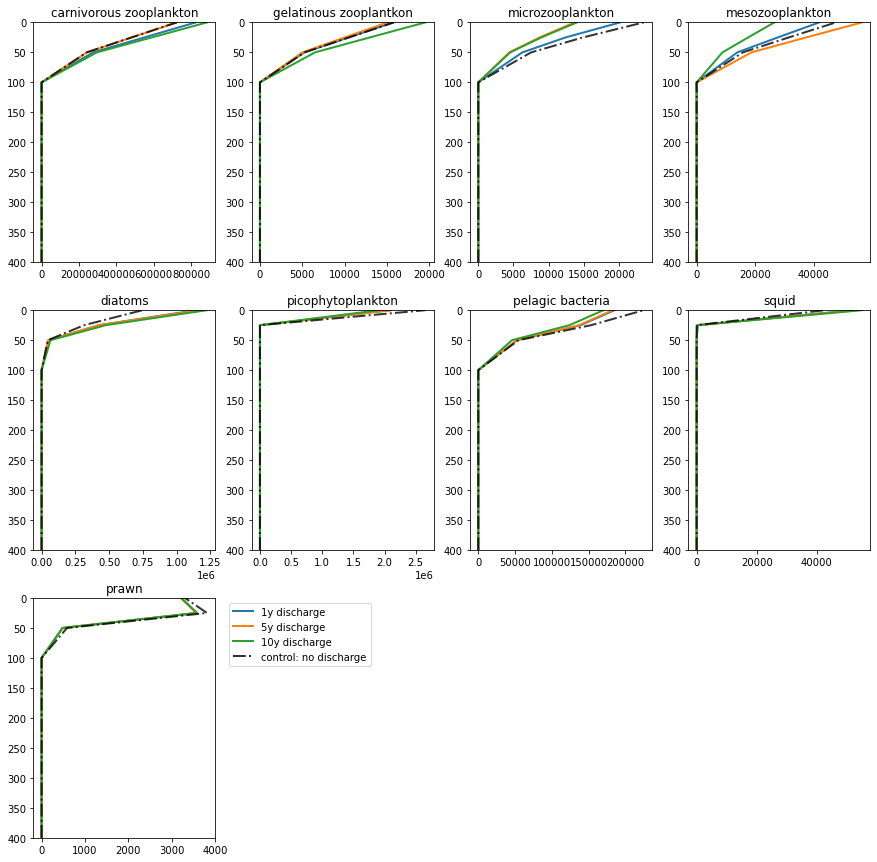

In [ ]:
plot_depth_profile(planktonic, scenarios, control, start, run_end, SoG_south)

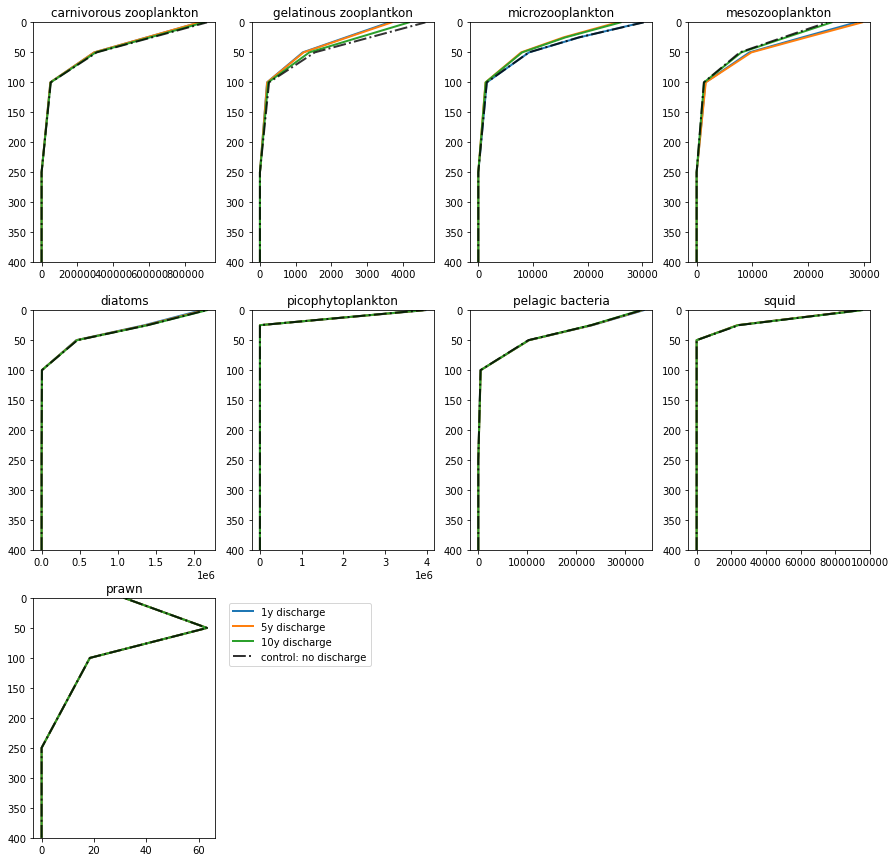

In [ ]:
plot_depth_profile(planktonic, scenarios, control, start, run_end, SoG_north)

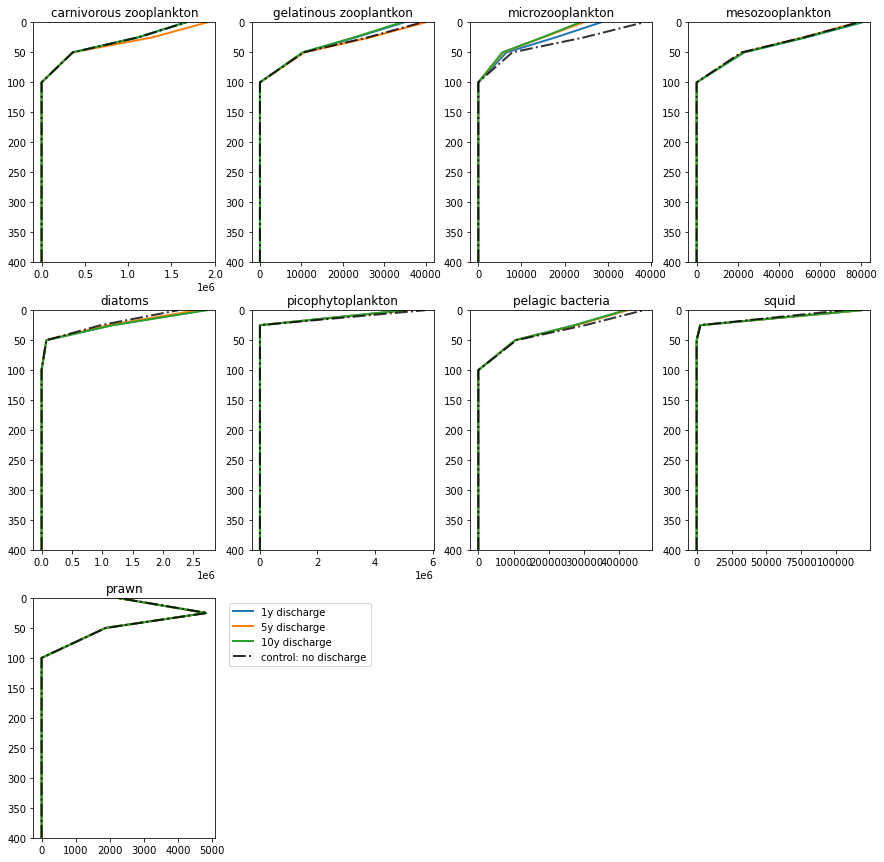

In [ ]:
plot_depth_profile(planktonic, scenarios, control, start, run_end, JdF_east)

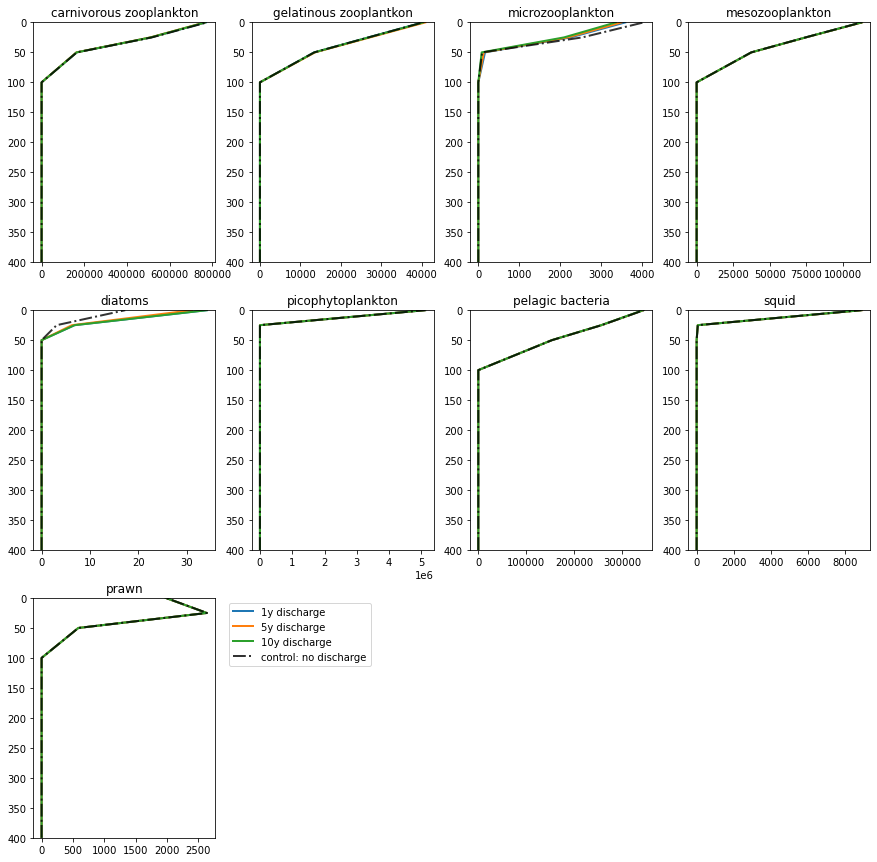

In [ ]:
plot_depth_profile(planktonic, scenarios, control, start, run_end, JdF_west)

Exploring the txt files of annual output per box

In [ ]:
control_txt_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber/Scrubber_discharge_100y_control/outputSalishSeaBoxBiomass.txt"
scenario2019_txt_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber/Scrubber_discharge_100y_2019/outputSalishSeaBoxBiomass.txt"
scenario2024_txt_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber/Scrubber_discharge_100y_2024/outputSalishSeaBoxBiomass.txt"
scenario2029_txt_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber/Scrubber_discharge_100y_2029/outputSalishSeaBoxBiomass.txt"

In [ ]:
scenarios_txt = [scenario2019_txt_file, scenario2024_txt_file, scenario2029_txt_file]

In [ ]:
location = Haro_Boundary

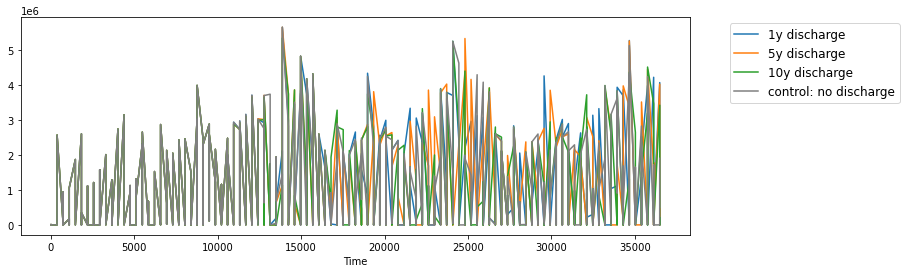

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))

control_biomass = pd.read_csv(control_txt_file, sep=" ")
cbiomass = control_biomass.loc[control_biomass['Box'].isin(location)]
for scenario in scenarios_txt:
    biomass = pd.read_csv(scenario, sep=" ")
    sbiomass = biomass.loc[biomass['Box'].isin(location)]
    sbiomass.plot('Time', 'PS', ax=ax)
cbiomass.plot('Time', 'PS', color='grey', ax=ax)
ax.legend(['1y discharge','5y discharge','10y discharge','control: no discharge'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12);

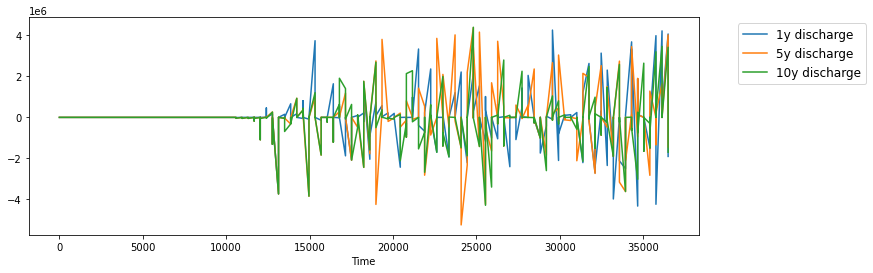

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))

control_biomass = pd.read_csv(control_txt_file, sep=" ")
cbiomass = control_biomass.loc[control_biomass['Box'].isin(location)]
time_df = cbiomass.Time

for scenario in scenarios_txt:
    biomass = pd.read_csv(scenario, sep=" ")
    sbiomass = biomass.loc[biomass['Box'].isin(location)]
    diff = sbiomass.PS - cbiomass.PS
    diff_df = pd.concat([time_df, diff], axis=1)
    diff_df.plot('Time', 'PS', ax=ax)
ax.legend(['1y discharge','5y discharge','10y discharge','control: no discharge'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12);

### Benthos

Whole Salish Sea

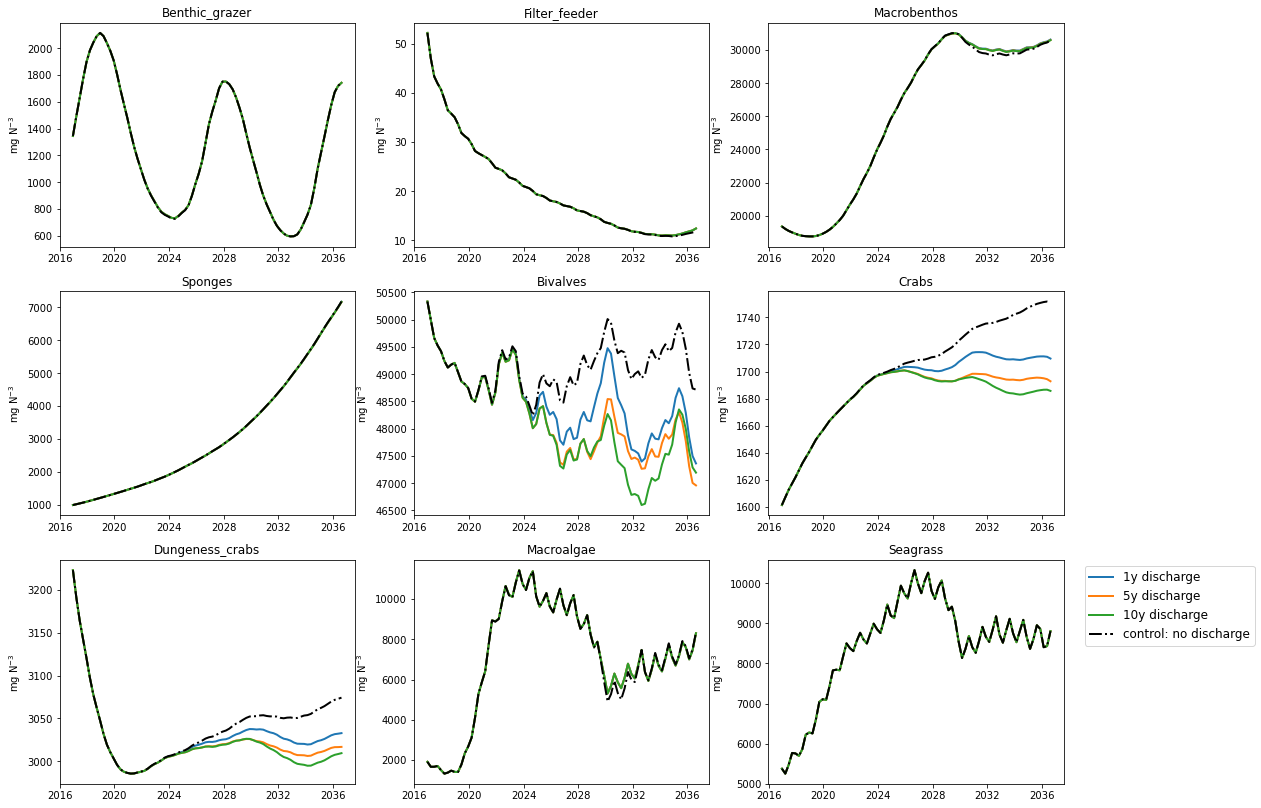

In [ ]:
group = groups.benthos
fig = plt.figure(figsize=(18, 14), facecolor='white')
gs = plt.GridSpec(3, 3, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1], height_ratios=[1, 1, 1])  

for species in group:

    benthic_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,:], np.nan)
    b_control = benthic_control.sum(axis=1)

    bio_index = (list(group).index(species))

    if bio_index < 3:
        position = 0, bio_index
    elif bio_index > 5: 
        position = 2, bio_index-6
    else :
        position = 1, bio_index-3

    ax = fig.add_subplot(gs[position])

    for scenario in scenarios:

        benthic_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][start:end,:], np.nan) # tonnes
        b_oiled = benthic_oiled.sum(axis=1)
        ax.plot(time[start:end], b_oiled, linewidth = 2) #alpha=0.5)

    ax.tick_params(labelsize=10)
    ax.set_ylabel('mg N$^{-3}$')
    ax.set_title(str(group[species]), fontsize = 12)
    ax.plot(time[start:end], b_control, '-.k', linewidth = 2) #,alpha=0.5)
ax.legend(['1y discharge','5y discharge','10y discharge','control: no discharge'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12);

Regions

In [ ]:
def plot_benthic_biomass(group, scenarios, control, time, start, end, region, y_min=None, y_max=None): 

    fig = plt.figure(figsize=(18, 14), facecolor='white')
    gs = plt.GridSpec(3, 3, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1], height_ratios=[1, 1, 1])  

    for species in group:

        pelagic_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,region], np.nan)
        p_control = pelagic_control.sum(axis=1)

        bio_index = (list(group).index(species))

        if bio_index < 3:
            position = 0, bio_index
        elif bio_index > 5: 
            position = 2, bio_index-6
        else :
            position = 1, bio_index-3

        ax = fig.add_subplot(gs[position])

        for scenario in scenarios:

            pelagic_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][start:end,region], np.nan) # tonnes
            p_oiled = pelagic_oiled.sum(axis=1)
            ax.plot(time[start:end], p_oiled, linewidth = 2) #alpha=0.5)

        ax.tick_params(labelsize=10)
        ax.set_ylabel('mg N$^{-3}$')
        ax.set_title(str(group[species]), fontsize = 12)
        ax.plot(time[start:end], p_control, '-.k', linewidth = 2) #,alpha=0.5)
    ax.legend(['1y discharge','5y discharge','10y discharge','control: no discharge'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12);

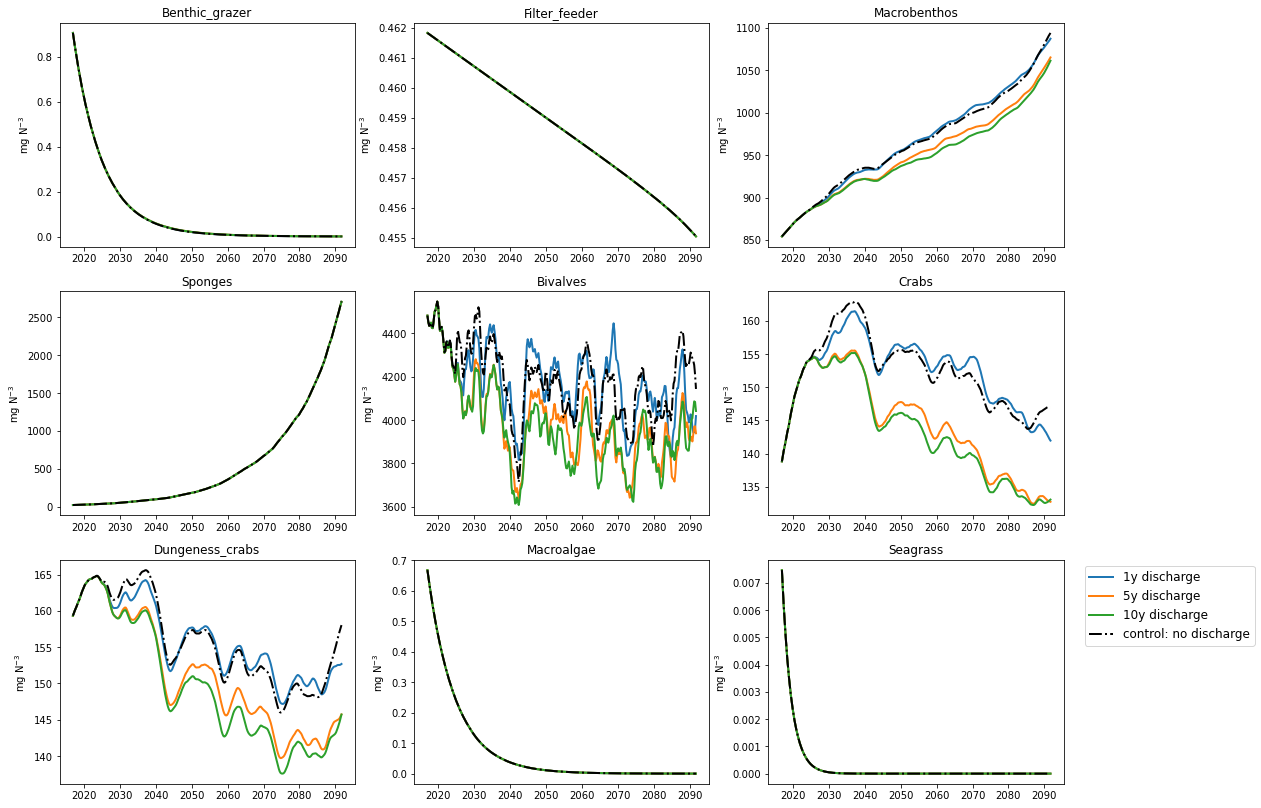

In [ ]:
region = Haro_Boundary
plot_benthic_biomass(groups.benthos, scenarios, control, time, start, run_end, region)

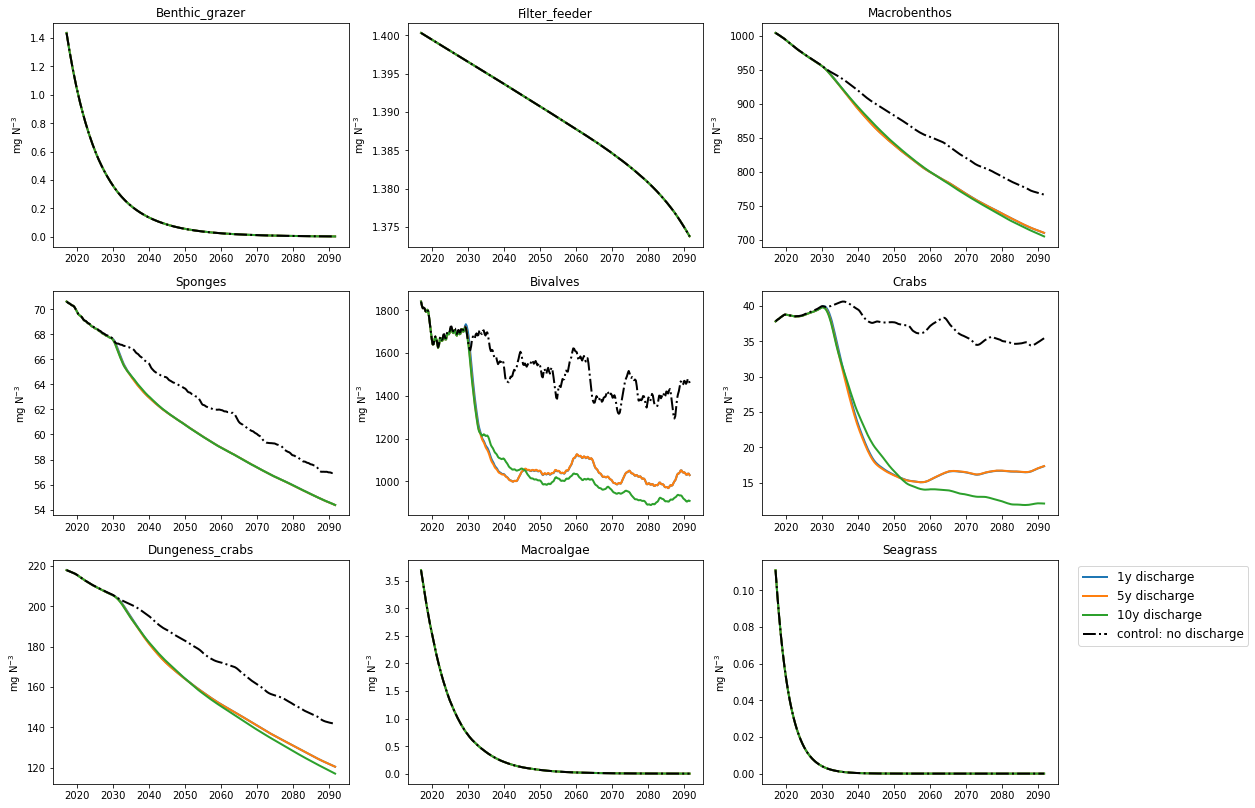

In [ ]:
region = SoG_center
plot_benthic_biomass(groups.benthos, scenarios, control, time, start, run_end, region)

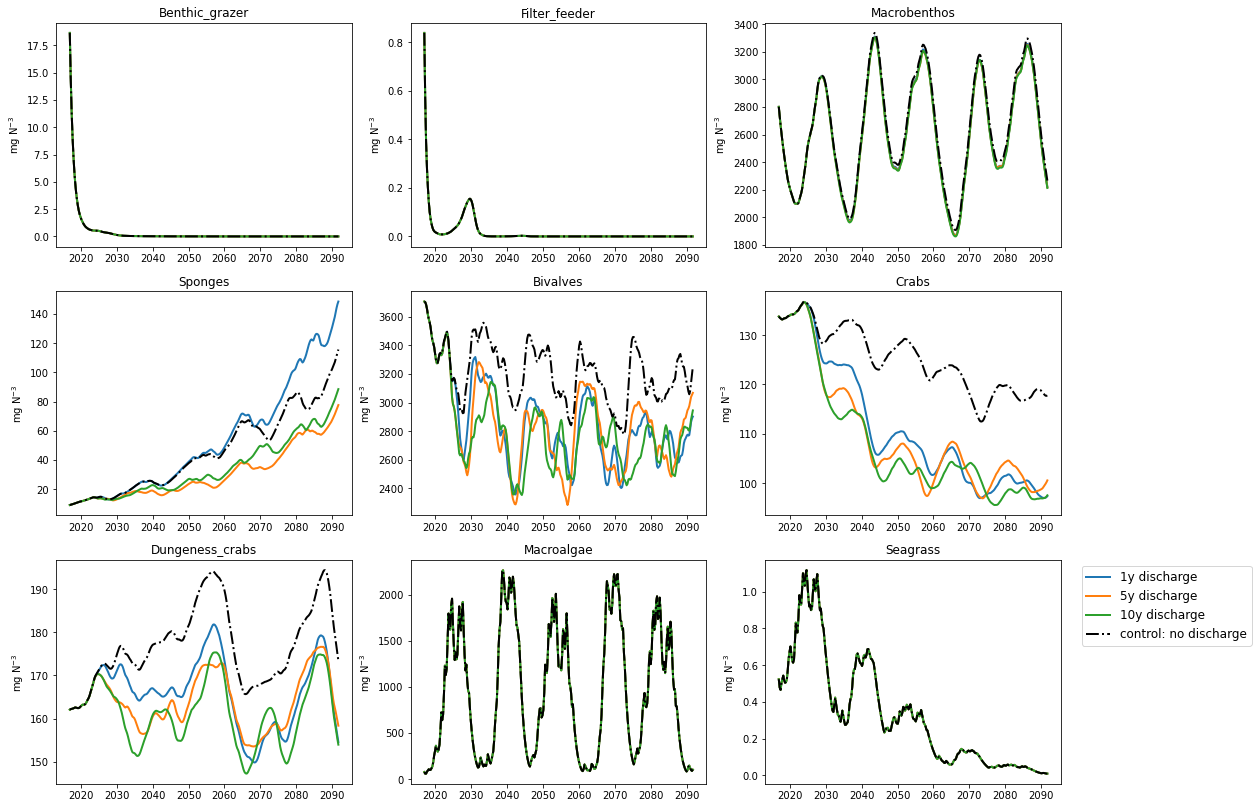

In [ ]:
region = SoG_south
plot_benthic_biomass(groups.benthos, scenarios, control, time, start, run_end, region)

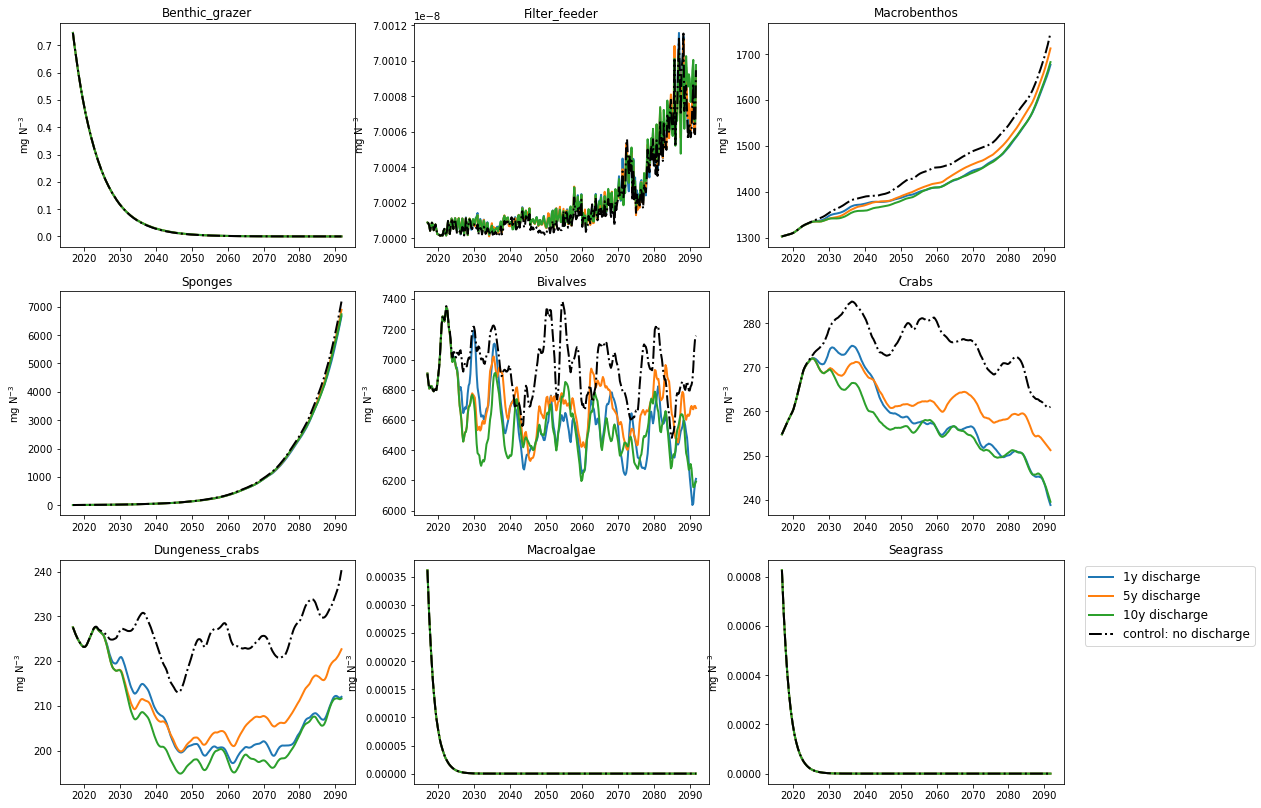

In [ ]:
region = JdF_east
plot_benthic_biomass(groups.benthos, scenarios, control, time, start, run_end, region)

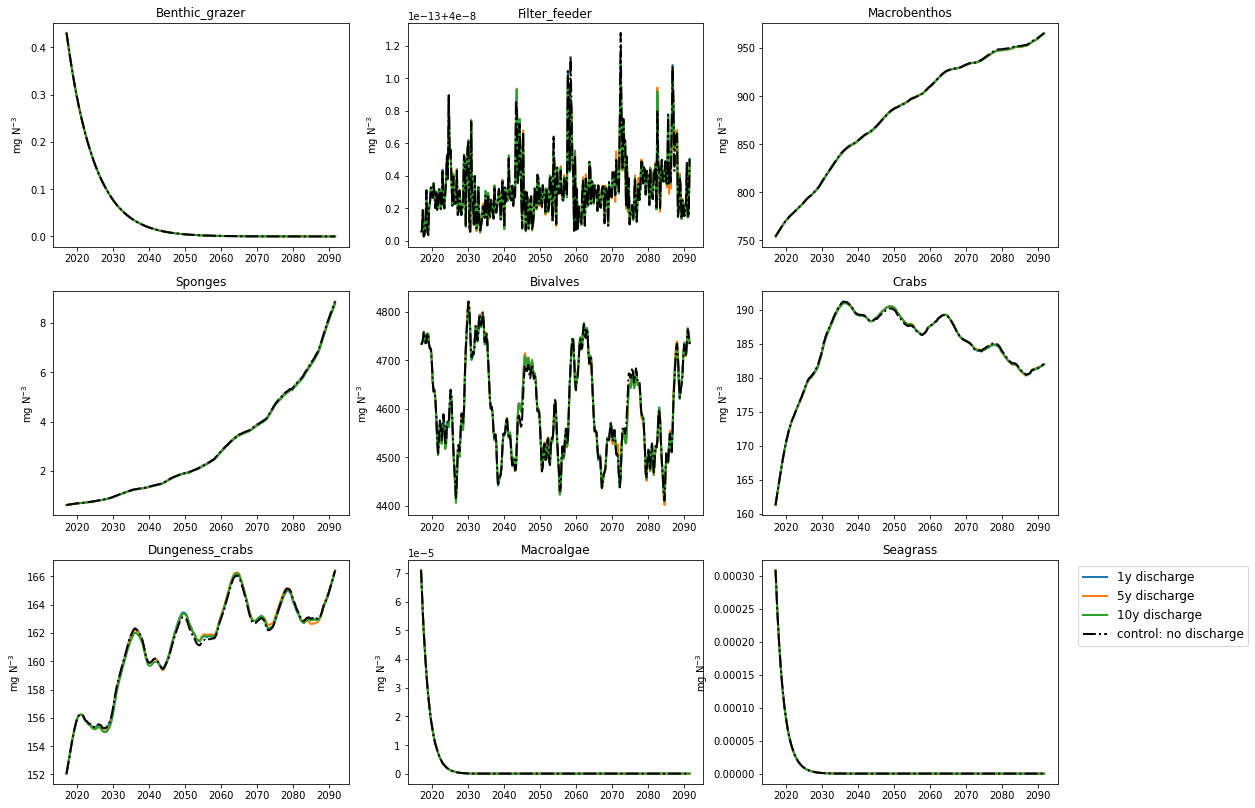

In [ ]:
region = JdF_west
plot_benthic_biomass(groups.benthos, scenarios, control, time, start, run_end, region)

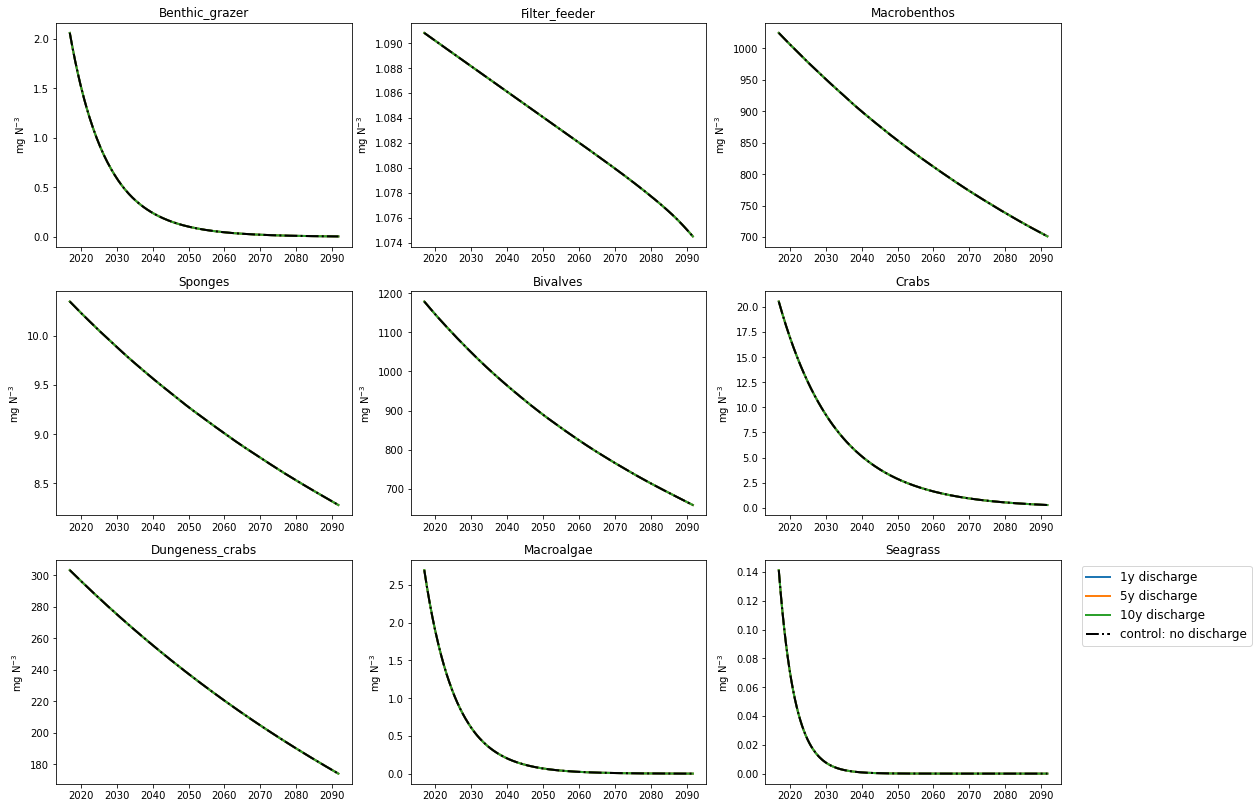

In [ ]:
region = SoG_north
plot_benthic_biomass(groups.benthos, scenarios, control, time, start, run_end, region)